# Travel Product Ideas (with behavior correction)

In this notebook, we run market research simulations for which we have (or believe to have :-) the correct answers.

In [ ]:
import sys

from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld

from tinytroupe.experimentation import InPlaceExperimentRunner

# specific utilities for the usecase
from market_research_utils import *

## Experiment setup

In [2]:
#Experiment: Travel Preferences by Marital Status
#	•	Ground Truth:
#	•	Singles prefer adventure trips, with 62% citing nature or extreme sports as their ideal vacation (Expedia, 2023). Source
#	•	Families prioritize child-friendly destinations, with 73% choosing theme parks or resorts (Expedia, 2023). Source
#	•	Couples favor luxury/romantic getaways, with 81% preferring beachfront or spa destinations (Expedia, 2023). Source
#	•	Prediction Task: Predict travel preferences based on marital status, income, and age.
#	•	Hypothetical Product:
# “WanderLux”: A travel service that helps setup luxury vacations and getaways, focusing on beachfront and spa destinations.


# this is meant to prime the agent to start thinking about what he/she would like to do on vacation
interviewer_introduction =\
    """
    We are performing some market research and need to know you more. 
    Can you please:
      - present yourself?
      - list your top-10 interests?
      - tell us what an ideal vacation would be for you and why?
    """

interviewer_main_question =\
    """ 
    We are developing a new travel service called "WanderLux" that helps setup luxury or romantic vacations, 
    focusing on beachfront and spa destinations.  The idea is to help people seeking quiet and calm getaways to 
    find the best places to stay and relax, avoiding fake reviews and bad experiences. These places are meant for 
    an adult audience, many not accepting children.
    
    The question is: if you had only one vacation to take next year, would use our new service
    or not? You **must** respond with "Yes" or "No" **only**, and explain why. If you are not sure, 
    please pick the answer that you think is most likely. 

    Please be honest, we are not here to judge you, but just to learn from you. We know your preferences and choices depend on many factors, 
    but please make your best guess, and you **must** think deeply about the following before answering:

       - your current situation in life, location, job and interests.
       = what you look for in vacations. Are you sure quiet luxury is what you want, instead of, say, adventure or fun and parties?
       - what would be OTHER vacation alternatives you might prefer instead.
       - and what you can afford.
     
    Now please answer the question.
    """

Now let's enclose the audience in an environment, to make it easier to interact with. Note that we set `broadcast_if_no_target` to `False`, which instructs the environment to **do not** broadcast what specific agents say to the others (unless the agent deliberately specify the target). We are not simulating a focus group, so we don't want discussions.


In [3]:
usa_singles = TinyPerson.load_specifications_from_folder("./population/usa_singles_2/")  # no children
usa_couples = TinyPerson.load_specifications_from_folder("./population/usa_couples_2/")   # no children
usa_families = TinyPerson.load_specifications_from_folder("./population/usa_families_2/") # have children

In [4]:
# ENABLE ERROR CORRECTION
for population in [usa_singles, usa_couples, usa_families]:
    for person in population:
       person.action_generator.enable_reasoning_step = False
       person.action_generator.enable_quality_checks = True
       person.action_generator.max_attempts = 5
       person.action_generator.enable_regeneration = True
       person.action_generator.quality_threshold = 5


In [5]:
singles_market = TinyWorld(f"Target audience 1 (US)", usa_singles, broadcast_if_no_target=False)
families_market = TinyWorld(f"Target audience 2 (US)", usa_families, broadcast_if_no_target=False)
couples_market = TinyWorld(f"Target audience 3 (US)", usa_couples, broadcast_if_no_target=False)

## Perform the research

Now we actually ask agents about their opinion. Note that we are asking for specific answers (Yes, No, Maybe), both to convey the granularity of preference we seek, and to make it easier to extract the results later. In general, a coarser granuarity is likely to have higher quality, since it requires less information to be computed accurately.

In [6]:
singles_market.broadcast(interviewer_introduction)
families_market.broadcast(interviewer_introduction)
couples_market.broadcast(interviewer_introduction)

singles_market.broadcast(interviewer_main_question)
families_market.broadcast(interviewer_main_question)
couples_market.broadcast(interviewer_main_question)

USER --> Amelia Foster: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Amelia Torres

       + --> Ava Martinez

       + --> ...others...

USER --> Avery Martinez: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Chloe White

       + --> Dante Brooks

       + --> ...others...

USER --> Ava Carter-Moore: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Chloe Lee-Williams

       + --> Chloe Nguyen-Smith

       + --> ...others...

USER --> Amelia Foster: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Amelia Torres

       + --> Ava Martinez

       + --> ...others...

USER --> Avery Martinez: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Chloe White

       + --> Dante Brooks

       + --> ...others...

USER --> Ava Carter-Moore: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Chloe Lee-Williams

       + --> Chloe Nguyen-Smith

       + --> ...others...

In [7]:
singles_market.run(1)

─────────────────────────────────────── Target audience 1 (US) step 1 of 1 ────────────────────────────────────────

Ava Martinez acts: [TALK] 
                  > Hello! I'm Ava Martinez, a culinary assistant living in Atlanta, Georgia. I have
                  > a passion for cooking, especially traditional Native American recipes, and I
                  > dream of one day opening my own bakery. My interests include exploring local
                  > farmers' markets, learning about indigenous cultures, and volunteering at
                  > community kitchens.   As for my ideal vacation, I would love to visit a serene
                  > beachfront location where I can relax, enjoy nature, and perhaps take a cooking
                  > class to learn about local cuisine. I find that a peaceful environment helps me
                  > recharge and inspires my culinary creativity.

Chloe Nguyen acts: [TALK] 
                  > Hello! I'm Chloe Nguyen, an environmental consultant based in Boston,
                  > Massachusetts. I have a Bachelor's Degree in Environmental Science from Boston
                  > University, and I work at Green Solutions Inc., where I help businesses
                  > implement sustainable practices. My interests include traveling to national
                  > parks, volunteering for environmental causes, and reading about climate science.
                  > As for my ideal vacation, I would love to spend time in a serene national park,
                  > surrounded by nature, where I can hike, relax, and reflect on my passion for the
                  > environment. I find peace and inspiration in nature, and it helps me recharge.
                  > Regarding your travel service, I would say "No" to using WanderLux for my
                  > vacation next year. While I appreciate the idea of luxury and relaxation, I tend
                  > to prefer more adventurous and nature-focused experiences rather than quiet
                  > luxury. I enjoy exploring new places, engaging in outdoor activities, and
                  > immersing myself in different cultures, which might not align with the offerings
                  > of a luxury serv (...)

David Lee acts: [TALK] 
               > Hello! I'm David Lee, a 40-year-old environmental advocate living in rural
               > Colorado. I have a Master's in Environmental Science and I'm passionate about
               > climate change and sustainability. I often volunteer for local organizations and
               > enjoy engaging with communities on environmental issues. My interests include
               > traveling to national parks, community gardening, and reading about climate
               > science.   As for my top-10 interests, they are: 1. Traveling to national parks and
               > natural reserves. 2. Participating in community gardening. 3. Reading about climate
               > science and sustainability. 4. Practicing mindfulness and meditation. 5. Cooking
               > healthy meals with fresh ingredients. 6. Attending local farmers' markets. 7.
               > Listening to podcasts about environmental issues. 8. Exploring new cultures through
               > travel. 9. Photography, especially of nature. 10. Engaging in discussions about
               > sustainability.  An ideal vacation for me would be a trip to a national park where
               > I can hike, explore nature, and practice mindfulness. I love b (...)

Charlotte Evans acts: [TALK] 
                     > Hello, I'm Charlotte Evans, a 55-year-old retired mental health counselor
                     > living in Boston, Massachusetts. I dedicated my career to helping others
                     > navigate their emotional challenges, and now I focus on personal growth and
                     > community involvement.   As for my top-10 interests, they include:  1.
                     > Traveling to spiritual retreats.  2. Practicing mindfulness and meditation.
                     > 3. Reading about psychology and philosophy.  4. Exploring nature and hiking.
                     > 5. Gardening and nurturing plants.  6. Attending art and cultural
                     > exhibitions.  7. Volunteering and supporting mental health initiatives.  8.
                     > Listening to calming music.  9. Engaging in deep conversations about life and
                     > spirituality.  10. Cooking healthy meals.   An ideal vacation for me would be
                     > a quiet retreat in a serene beachfront location, where I can practice
                     > mindfulness, meditate, and connect with nature. I would love to immerse
                     > myself in a peaceful environment, away from the hustle and bustle of daily
                     > life, allowing me to reflect and rejuvenate.   Regarding you (...)

Amelia Foster acts: [TALK] 
                   > Hi! I'm Amelia Foster, a 30-year-old non-binary individual currently living in
                   > Los Angeles, California. I'm currently unemployed and actively seeking
                   > opportunities in creative fields like graphic design or digital marketing. I
                   > have some college education in graphic design but didn't complete my degree. My
                   > interests include video gaming, digital art, social activism, music festivals,
                   > and cooking new recipes.   As for my ideal vacation, I would love to go to a
                   > cozy beachfront destination where I can relax, enjoy nature, and maybe do some
                   > sketching or digital art. I appreciate places that have a creative vibe and
                   > allow for quiet reflection.   Regarding your travel service "WanderLux," if I
                   > had only one vacation to take next year, I would say "No." While I appreciate
                   > the idea of luxury and relaxation, I often find myself drawn to more
                   > adventurous and social experiences rather than quiet luxury. I enjoy exploring
                   > new cultures and meeting new people, which might not align with the calm
                   > getaways your service offers. (...)

Chloe Martinez acts: [TALK] 
                    > Hey there! I'm Chloe Martinez, I'm 22 years old and currently living in the
                    > rural Midwest. I'm currently unemployed, but I'm working on getting my GED
                    > through online courses. I love sports, especially basketball and football, and
                    > I enjoy spending time with friends and family. My interests also include video
                    > games and outdoor activities like hiking and fishing.   As for my top-10
                    > interests, they would be: 1. Basketball 2. Football 3. Video games 4. Hiking
                    > 5. Fishing 6. Watching sports events 7. Spending time with friends 8.
                    > Listening to hip-hop and R&B music 9. Playing competitive multiplayer games
                    > 10. Engaging in sports discussions online.  An ideal vacation for me would be
                    > a trip to a beach where I can relax, play some beach volleyball, and maybe
                    > even try some water sports. I love the idea of being near the water, enjoying
                    > the sun, and having fun with friends. It would be a great way to unwind and
                    > escape from the stress of daily life!

Daniel Foster acts: [TALK] 
                   > Hi! I'm Daniel Foster, a 30-year-old non-binary individual currently living in
                   > Los Angeles, California. I'm unemployed at the moment, having left a part-time
                   > retail job due to stress and burnout. I have some college experience in graphic
                   > design, and I'm actively seeking work while trying to manage my anxiety and
                   > self-doubt.   As for my top-10 interests, they include: 1. Video gaming 2.
                   > Digital art and design 3. Music, especially indie and alternative genres 4.
                   > Social activism and community engagement 5. Exploring local art scenes 6.
                   > Spending time with friends 7. Doodling and sketching 8. Attending community
                   > events 9. Watching streams or gaming content 10. Learning new creative skills
                   > online.  An ideal vacation for me would be a cozy retreat in a vibrant city
                   > with a strong art scene, where I could explore galleries, enjoy local cuisine,
                   > and spend time with friends. I would love to have a mix of relaxation and
                   > inspiration, perhaps with some gaming or art workshops included. This would
                   > allow me to recharge creat (...)

Chloe Bennett acts: [TALK] 
                   > My name is Chloe Bennett, I'm 40 years old and I work as a construction worker
                   > for a local company. I take pride in my craftsmanship and enjoy the physical
                   > nature of my job. My top interests include outdoor activities like fishing and
                   > hiking, DIY home improvement projects, spending time with friends and family,
                   > classic rock music, and watching sports, especially football. An ideal vacation
                   > for me would be a quiet cabin in the woods or a fishing trip by a lake, where I
                   > can relax and enjoy nature, away from the hustle and bustle of daily life. I
                   > appreciate the simplicity and tranquility of such places, which help me
                   > recharge and connect with my surroundings.

Charlotte Nguyen acts: [TALK] 
                      > Hi! I'm Charlotte Nguyen, a 30-year-old non-binary individual currently
                      > living in Los Angeles. I'm exploring opportunities in graphic design and
                      > digital art after leaving a part-time retail job due to stress and burnout.
                      > I enjoy meeting new people and have a creative mind, although I sometimes
                      > struggle with feelings of inadequacy. My top interests include video gaming,
                      > digital art, and social activism. An ideal vacation for me would be a cozy
                      > beach retreat where I can relax, create art, and enjoy nature, as it would
                      > help me recharge and find inspiration.   As for your travel service, I would
                      > say "No" to using WanderLux for my vacation next year. While I appreciate
                      > the idea of luxury and relaxation, I tend to prefer more adventurous and
                      > social experiences, like exploring new cities or attending gaming events. I
                      > also have to consider my current financial situation, which might not allow
                      > for a luxury vacation. I think I would look for something more budget-
                      > friendly and engaging instead.

Amelia Torres acts: [TALK] 
                   > My name is Amelia Torres, I'm 40 years old and I work as a construction worker
                   > for a local company. I take pride in my craftsmanship and enjoy working with my
                   > hands. My top interests include outdoor activities like fishing and hiking, DIY
                   > home improvement projects, and spending time with friends and family. An ideal
                   > vacation for me would be a quiet cabin in the woods where I can relax, fish,
                   > and enjoy nature, away from the hustle and bustle of everyday life. I
                   > appreciate the simplicity and tranquility of such a getaway.

Chloe Ramirez acts: [TALK] 
                   > Hey! I'm Chloe Ramirez, a 22-year-old currently focusing on my education and
                   > developing my skills in video game design. I love video gaming, anime, and
                   > creative writing. My top interests include: 1. Video gaming 2. Game design 3.
                   > Anime 4. Creative writing 5. Technology 6. Exploring virtual worlds 7. Indie
                   > games with unique storytelling 8. Collecting gaming memorabilia 9. Watching
                   > gaming streams 10. Participating in online communities.   As for an ideal
                   > vacation, I would love to go to a quiet beachfront destination where I can
                   > relax, maybe with some friends, and enjoy the ocean. I think it would be a
                   > great way to recharge and find inspiration for my game design projects.
                   > Regarding the travel service "WanderLux," I would say "No". While I appreciate
                   > the idea of luxury and calm getaways, I often look for more adventurous
                   > experiences or opportunities to explore new places and cultures. I think I
                   > would prefer a vacation that offers a mix of fun and exploration rather than
                   > just quiet luxury. Plus, I have to consi (...)

Emily Chen acts: [TALK] 
                > Hello! I'm Emily Chen, a 25-year-old digital marketing specialist living in New
                > York City. I work at Tech Innovations Inc., where I create and manage online
                > marketing campaigns. I love exploring new ideas and cultures, and I often
                > volunteer for community health initiatives.   As for my top-10 interests, they
                > include: 1. Traveling to new destinations 2. Exploring different cuisines 3.
                > Attending live music events and festivals 4. Volunteering for community health
                > initiatives 5. Outdoor activities like hiking and biking 6. Documentaries that
                > explore social issues 7. Cooking and trying out new recipes 8. Engaging in
                > discussions about ideas and trends 9. Keeping a travel journal 10. Participating
                > in local health fairs  An ideal vacation for me would be a trip to a beautiful
                > beach destination where I can relax, enjoy the sun, and explore local culture. I
                > would love to experience a mix of relaxation and adventure, perhaps with some
                > hiking or cultural tours. This would allow me to recharge while also satisfying my
                > cu (...)

Chloe Ramirez acts: [DONE] 

2025-04-18 17:56:29,011 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 17:56:29,062 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 17:56:29,283 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Charlotte Nguyen acts: [DONE] 

Amelia Foster acts: [DONE] 

Charlotte Evans acts: [DONE] 

2025-04-18 17:58:28,773 - tinytroupe - WARNING - [Ava Martinez] Action similarity is too high (0.7672552166934189), replacing it with DONE.


Ava Martinez acts: [DONE] 

Emily Chen acts: [TALK] 
                > Yes, I would use your new service, WanderLux. I appreciate the focus on luxury and
                > romantic vacations, especially in beachfront and spa destinations. Given my
                > current lifestyle, I often seek quiet and calm getaways to recharge from the fast-
                > paced environment of my job. I value authentic experiences and avoiding fake
                > reviews is important to me, as I want to ensure that my vacation is relaxing and
                > enjoyable. I believe that your service could help me find the perfect place to
                > unwind and enjoy some quality time.   While I do enjoy adventure and exploring new
                > cultures, I think for my next vacation, a peaceful retreat would be ideal. I also
                > consider affordability, and if your service can help me find a great deal on a
                > luxury experience, that would be a big plus!

Ethan Kim acts: [TALK] 
               > My name is Ethan Kim. I'm a 50-year-old retired man living in the rural Midwest. I
               > spent many years working in a local manufacturing plant before retiring. Now, I
               > focus on my hobbies, especially caring for animals and volunteering at local
               > shelters.   As for my top-10 interests, they include: 1. Animal care and welfare 2.
               > Gardening 3. Fishing 4. Reading about wildlife conservation 5. Volunteering at
               > local shelters 6. Nature walks 7. Cooking simple, hearty meals 8. Watching
               > documentaries about animals and nature 9. Spending time with my pets 10. Exploring
               > national parks.  An ideal vacation for me would be a quiet retreat in a national
               > park, where I could enjoy nature, go hiking, and spend time observing wildlife. I
               > find peace in nature, and it helps me recharge. I would prefer a place that allows
               > me to connect with the environment and perhaps volunteer for a local conservation
               > project while I'm there.

2025-04-18 18:00:31,047 - tinytroupe - WARNING - [Chloe Bennett] Action similarity is too high (0.7703488372093024), replacing it with DONE.


Chloe Bennett acts: [DONE] 

2025-04-18 18:00:31,918 - tinytroupe - WARNING - [Chloe Nguyen] Action similarity is too high (1), replacing it with DONE.


Chloe Nguyen acts: [DONE] 

2025-04-18 18:00:32,261 - tinytroupe - WARNING - [Amelia Torres] Action similarity is too high (0.8248686514886164), replacing it with DONE.


Amelia Torres acts: [DONE] 

Chloe Martinez acts: [TALK] 
                    > Yes, I would use your new service, WanderLux. I think it would be really
                    > helpful to find a nice, quiet place to relax without the hassle of sorting
                    > through fake reviews. Given my current situation, I often feel overwhelmed,
                    > and a luxury vacation sounds like a perfect way to unwind. I appreciate the
                    > focus on adult-only destinations, as I prefer a calm environment to recharge.
                    > Plus, I could use some guidance on where to go since I want to make the most
                    > of my vacation. It sounds like a great option for someone like me!

Evelyn Brooks-Johnson acts: [TALK] 
                           > Hello! I'm Evelyn Brooks-Johnson, an environmental consultant based in
                           > rural Montana. I have a Bachelor's Degree in Environmental Science from
                           > the University of Montana, and I work with businesses to help them
                           > implement sustainable practices. My interests include hiking,
                           > volunteering for environmental organizations, and reading about
                           > sustainable living.   As for my top-10 interests, they would be: 1.
                           > Hiking and exploring nature. 2. Volunteering for local environmental
                           > organizations. 3. Reading about sustainable living and environmental
                           > policy. 4. Gardening and nurturing plants. 5. Cooking healthy meals
                           > with local ingredients. 6. Participating in community events focused on
                           > sustainability. 7. Traveling to learn about different cultures and
                           > sustainability practices. 8. Engaging in mindfulness practices. 9.
                           > Attending workshops on environmental issues. 10. Writing in my journal
                           > to reflect on my experiences.  An ideal vacation for me would be a week
                           > spent in a peaceful cabin in the mountains, surrounded by nature. (...)

Evelyn Martinez acts: [TALK] 
                     > Hi there! I'm Evelyn Martinez, a 30-year-old non-binary individual currently
                     > living in Los Angeles. I'm currently unemployed but have a background in
                     > graphic design and a passion for video gaming. I enjoy spending my time
                     > creating digital art and engaging with online gaming communities.   As for my
                     > top-10 interests, they include: 1. Video gaming, especially RPGs and indie
                     > games. 2. Digital art and graphic design. 3. Social issues and activism,
                     > particularly climate change. 4. Exploring new music and attending local
                     > concerts. 5. Nature walks and spending time outdoors. 6. Cozy gaming nights
                     > with friends. 7. Art supplies and creative tools. 8. Cooking simple meals. 9.
                     > Watching gaming streams. 10. Participating in online discussions about mental
                     > health awareness.  An ideal vacation for me would be a quiet getaway to a
                     > beachfront location where I can relax, create art, and enjoy nature. I would
                     > love to have a cozy place to stay, perhaps with a spa nearby, where I can
                     > unwind and recharge. This kind of vacation appe (...)

2025-04-18 18:01:31,649 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Evelyn Brooks acts: [TALK] 
                   > Hi, I'm Evelyn Brooks, a 22-year-old guy from the Rural Midwest. I'm currently
                   > unemployed and looking for job opportunities, especially in sports-related
                   > fields. I have a passion for sports and recreation, and I'm working on
                   > completing my GED online. My interests include basketball, football, outdoor
                   > activities like hiking and fishing, and playing video games, particularly
                   > sports simulations.   As for my ideal vacation, I would love to go somewhere
                   > with beautiful nature, maybe a cabin by a lake where I can relax, fish, and
                   > enjoy some quiet time with friends. I think it would be a great way to unwind
                   > and connect with nature.   Regarding the travel service "WanderLux," I would
                   > have to say "No." While I appreciate the idea of luxury and relaxation, I tend
                   > to prefer more active vacations that involve sports and outdoor activities
                   > rather than quiet luxury. I also have to consider my current financial
                   > situation, which makes it hard to justify spending on luxury vacations. I would
                   > likely look for something more affo (...)

2025-04-18 18:01:32,420 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Emily Chen acts: [DONE] 

Chloe Martinez acts: [DONE] 

2025-04-18 18:02:32,139 - tinytroupe - WARNING - [Daniel Foster] Action similarity is too high (1), replacing it with DONE.


Daniel Foster acts: [DONE] 

2025-04-18 18:02:40,458 - tinytroupe - WARNING - [David Lee][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Yes, I would use your new service, WanderLux. I appreciate the focus on quiet and calm getaways, as I often seek peaceful environments to recharge. Given my interests in nature and sustainability, a luxury beachfront or spa destination sounds appealing, especially if it aligns with eco-friendly practices. I value authentic experiences and avoiding fake reviews is crucial for me, as I want to ensure my vacation is relaxing and enjoyable. While I do enjoy adventure, I think a serene vacation would be a refreshing change for me. Thank you for considering my perspective!', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborted and not added to the similation

Evelyn Brooks acts: [DONE] 

Grace Mitchell acts: [TALK] 
                    > Hello! I'm Grace Mitchell, a 25-year-old freelance content writer based in
                    > Newark, New Jersey. I focus on health and wellness topics in my writing, and I
                    > have a Bachelor's Degree in English Literature from Rutgers University. My
                    > interests include reading contemporary fiction, practicing yoga, and
                    > volunteering at local shelters.   As for my top-10 interests, they are: 1.
                    > Reading novels, especially contemporary fiction. 2. Yoga and mindfulness
                    > practices. 3. Volunteering at local shelters and community centers. 4. Cooking
                    > healthy meals and experimenting with new recipes. 5. Nature walks and outdoor
                    > activities. 6. Attending community events and workshops. 7. Writing and
                    > storytelling. 8. Exploring coffee shops with cozy atmospheres. 9. Engaging in
                    > discussions about social justice and healthcare access. 10. Traveling and
                    > experiencing diverse cultures.  An ideal vacation for me would be a quiet
                    > beach getaway where I can relax, read, and practice yoga by the ocean. I love
                    > the idea of being surrounded by nature, enjoy (...)

2025-04-18 18:04:37,746 - tinytroupe - WARNING - [Gabriel Scott][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': "Hi there! I'm Gabriel Scott, a 28-year-old craft artist based in Atlanta, Georgia. I create and sell handmade crafts, including jewelry and home decor. I love engaging with people and sharing my passion for art and creativity. \n\nAs for my top-10 interests, they include:\n1. Arts and crafts\n2. DIY projects\n3. Sustainable living\n4. Community events\n5. Traveling to new places\n6. Attending local art shows and markets\n7. Cooking new recipes with friends\n8. Spending time outdoors, especially in parks\n9. Listening to music while working on projects\n10. Experimenting with new crafting techniques.\n\nAn ideal vacation for me would be a trip to a beautiful coastal town where I can relax on the beach, explore lo

Grace Nguyen acts: [TALK] 
                  > Hi! I'm Grace Nguyen, a 28-year-old craft artist based in Atlanta, Georgia. I
                  > create and sell handmade items like jewelry and home decor. I love participating
                  > in local craft fairs and connecting with customers. My top interests include
                  > arts and crafts, visiting art galleries, and exploring nature for inspiration.
                  > An ideal vacation for me would be a creative retreat in a beautiful, serene
                  > location where I can relax, create art, and connect with other artists. I would
                  > love to be surrounded by nature, perhaps by the beach or in the mountains, where
                  > I can find peace and inspiration for my projects.

Isaac Johnson acts: [TALK] 
                   > Hi! I'm Isaac Johnson, a 30-year-old non-binary individual currently living in
                   > Los Angeles, California. I'm unemployed at the moment, having left a part-time
                   > retail job due to stress and burnout. I'm actively seeking opportunities in
                   > graphic design, which is a field I studied for a year in community college. My
                   > interests include video gaming, digital art, social justice issues,
                   > environmental activism, and music, especially indie and alternative genres.
                   > As for my top-10 interests, they would be: 1. Video gaming 2. Digital art and
                   > design 3. Social justice issues 4. Environmental activism 5. Music (indie and
                   > alternative) 6. Nature walks 7. Community art projects 8. Attending local music
                   > events 9. Exploring cozy cafes 10. Participating in community events.  An ideal
                   > vacation for me would be a quiet retreat in a nature-rich area, perhaps near
                   > the beach, where I could relax, create art, and enjoy some solitude. I would
                   > love to have access to art supplies and maybe even some workshops to enhance my
                   > skills. This ki (...)

Evelyn Brooks-Johnson acts: [TALK] 
                           > Yes, I would use your new service, WanderLux. I appreciate the focus on
                           > luxury and relaxation, which aligns with my desire for a peaceful
                           > getaway. I often seek quiet and calm environments to recharge, and
                           > knowing that your service aims to avoid fake reviews and bad
                           > experiences is reassuring. I value authenticity and quality in my
                           > travel experiences, especially since I prefer adult-only destinations
                           > that allow for a more serene atmosphere. Thank you for considering my
                           > input!

Henry Mitchell acts: [TALK] 
                    > Hi there! I'm Henry Mitchell, a 40-year-old construction worker from rural
                    > Alabama. I take pride in my craftsmanship and enjoy working with my hands. My
                    > top interests include outdoor activities like fishing and hiking, DIY home
                    > improvement projects, watching sports (especially football), and spending time
                    > with friends and family. An ideal vacation for me would be a quiet cabin in
                    > the woods, where I can relax, fish, and enjoy nature. I appreciate the peace
                    > and tranquility that comes with being outdoors, away from the hustle and
                    > bustle of everyday life.

Ethan Kim acts: [TALK] 
               > Yes, I would consider using your new service, WanderLux. I appreciate the focus on
               > quiet and calm getaways, as that aligns with what I look for in a vacation. I often
               > seek peaceful environments where I can relax and enjoy nature, away from the chaos
               > of everyday life. Knowing that your service aims to provide genuine experiences
               > without fake reviews is reassuring, as I want to avoid any disappointments.
               > However, I would also need to consider my budget and whether the luxury aspect fits
               > within my financial means.

Henry Adams acts: [TALK] 
                 > Hello! I'm Henry Adams, a 25-year-old mental health advocate living in Boston,
                 > Massachusetts. I have a Bachelor's degree in Psychology from Boston University,
                 > where I focused on mental health and community support. I’m passionate about
                 > promoting mental health awareness and reducing stigma through community outreach
                 > programs and workshops.   As for my top-10 interests, they include: 1. Reading
                 > self-help books and psychology literature. 2. Volunteering for mental health
                 > organizations. 3. Practicing yoga and mindfulness. 4. Exploring nature and
                 > hiking. 5. Engaging in conversations about mental health. 6. Art and creativity
                 > as forms of expression. 7. Spending time with my dog, Max. 8. Attending community
                 > events focused on mental health awareness. 9. Cooking healthy meals. 10.
                 > Traveling to experience different cultures.  An ideal vacation for me would be a
                 > peaceful retreat in a nature-rich area, perhaps a cozy cabin by a lake or a
                 > beachfront location where I can unwind, practice yoga, and read. I value
                 > tranquility (...)

2025-04-18 18:05:35,743 - tinytroupe - WARNING - [Evelyn Martinez] Action similarity is too high (1), replacing it with DONE.


Evelyn Martinez acts: [DONE] 

Isabella Garcia acts: [TALK] 
                     > Hello! I'm Isabella Garcia, a 60-year-old project manager at Tech Innovations
                     > Inc. I oversee the development of new software products and enjoy the
                     > challenges that come with my job. My top interests include technology and
                     > innovation, traveling, cooking, reading historical fiction, and gardening. An
                     > ideal vacation for me would be a peaceful getaway to a beachfront location
                     > where I can relax, enjoy nature, and perhaps indulge in some spa treatments.
                     > I appreciate quiet and calm environments, especially as I value my downtime
                     > after busy work weeks.

2025-04-18 18:06:36,153 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Ethan Kim acts: [DONE] 

Evelyn Brooks-Johnson acts: [DONE] 

2025-04-18 18:07:37,427 - tinytroupe - WARNING - [David Lee] improved total quality from 29.0 to 34.0


David Lee acts: [TALK] 
               > Yes, I would consider using your service, WanderLux, but only if it offers eco-
               > friendly options that align with my values. I appreciate the focus on quiet and
               > calm getaways, as I often seek peaceful environments to recharge. However, my ideal
               > vacation would involve nature-centric experiences, like staying at an eco-resort
               > near a national park or a beachfront location that prioritizes sustainability.
               > Authentic experiences are important to me, and I want to ensure that the places I
               > choose to stay at are genuinely committed to environmental practices. If WanderLux
               > can provide that, then I would definitely be interested!

2025-04-18 18:08:36,879 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:08:43,112 - tinytroupe - WARNING - [Isabella Wright][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': "Hi there! I'm Isabella Wright, a 45-year-old warehouse worker from Philadelphia. I handle inventory management and shipping logistics at a local distribution center. While my job pays the bills, I often feel unfulfilled and dream of transitioning into a role that aligns more with my passion for sports and coaching. \n\nAs for my top-10 interests, they include:\n1. Sports, particularly basketball and football.\n2. Outdoor activities like hiking and biking.\n3. Technology and its applications in daily life.\n4. Watching live sports events.\n5. Participating in community sports leagues.\n6. Spending time with fr

Gabriel Scott acts: [TALK] 
                   > Hello! I'm Gabriel Scott, a 28-year-old craft artist living in Atlanta,
                   > Georgia. I create and sell handmade crafts, focusing on jewelry and home decor.
                   > I love connecting with people and sharing my passion for art and creativity.
                   > Here are my top-10 interests: 1. Arts and crafts 2. DIY projects 3. Sustainable
                   > living 4. Community events 5. Traveling to new places 6. Attending local art
                   > shows and markets 7. Cooking new recipes with friends 8. Spending time
                   > outdoors, especially in parks 9. Listening to music while working on projects
                   > 10. Experimenting with new crafting techniques.  An ideal vacation for me would
                   > be a trip to a charming coastal town where I can relax on the beach, explore
                   > local art galleries, and enjoy fresh seafood. I find inspiration in nature and
                   > creativity, and this kind of getaway would be a perfect way to recharge my
                   > artistic spirit. Plus, I love the idea of meeting local artists and learning
                   > about their crafts!

2025-04-18 18:09:37,667 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:09:38,464 - tinytroupe - WARNING - [Grace Nguyen] Action similarity is too high (0.755591054313099), replacing it with DONE.


Grace Nguyen acts: [DONE] 

Henry Adams acts: [TALK] 
                 > Yes, I would use your new service, "WanderLux." I appreciate the focus on luxury
                 > and romantic vacations, especially in beachfront and spa destinations. Given my
                 > current situation, I often seek quiet and calm getaways to recharge, and I value
                 > the assurance of avoiding fake reviews and bad experiences. I believe that a
                 > well-planned vacation can significantly enhance relaxation and personal well-
                 > being, which aligns with my interests in mindfulness and self-care. While I do
                 > enjoy adventure, I think that for my next vacation, a peaceful retreat would be
                 > ideal.

David Lee acts: [DONE] 

Jackson Wright acts: [TALK] 
                    > Hello! I'm Jackson Wright, a 60-year-old retired individual living in the
                    > Rural Midwest. I spent many years working in construction, which taught me the
                    > value of hard work. Now, I focus on socializing and participating in community
                    > events. My top interests include gardening, volunteering, cooking, fishing,
                    > and attending local events. An ideal vacation for me would be a peaceful
                    > getaway to a quiet beach where I can relax, enjoy nature, and perhaps do some
                    > fishing. I appreciate calm and tranquility, especially after losing my spouse,
                    > and I find solace in beautiful surroundings.

2025-04-18 18:10:38,331 - tinytroupe - WARNING - [Isaac Johnson] Action similarity is too high (0.7034482758620689), replacing it with DONE.


Isaac Johnson acts: [DONE] 

Grace Mitchell acts: [TALK] 
                    > Yes, I would use your new service, WanderLux. I appreciate the focus on luxury
                    > and romantic vacations, especially in beachfront and spa destinations. Given
                    > my current situation, I often look for quiet and calm getaways to recharge,
                    > and I value the assurance of avoiding fake reviews and bad experiences. I
                    > believe that a well-planned vacation can significantly enhance relaxation and
                    > enjoyment, and your service seems to align perfectly with what I seek in a
                    > vacation. Thank you for considering my input!

2025-04-18 18:10:39,357 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Isaiah Patel acts: [TALK] 
                  > Hello! My name is Isaiah Patel, and I'm a retired marketing specialist living in
                  > Boston, Massachusetts. I spent over 30 years in the marketing field, focusing on
                  > brand development and digital marketing strategies. Now that I'm retired, I
                  > enjoy exploring my personal interests, which include traveling, cooking, and
                  > reading.   As for my top-10 interests, they are: 1. Traveling to new countries
                  > and experiencing different cultures. 2. Cooking and trying out new recipes. 3.
                  > Reading books, especially historical fiction and biographies. 4. Practicing
                  > mindfulness and meditation. 5. Exploring local markets and trying street food.
                  > 6. Spending time in nature, especially hiking. 7. Attending cultural events and
                  > festivals. 8. Listening to music, particularly classical and world music. 9.
                  > Volunteering at local shelters and community centers. 10. Keeping a travel
                  > journal to document my experiences.  An ideal vacation for me would be a trip to
                  > a serene beach destination where I can relax, enjoy nature, and immerse myself
                  > in t (...)

2025-04-18 18:10:39,443 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


James Anderson acts: [TALK] 
                    > Hello! I'm James Anderson, a 25-year-old freelance content writer based in
                    > Boston, Massachusetts. I have a Bachelor's Degree in English Literature from
                    > Boston University, where I focused on contemporary fiction. I enjoy writing
                    > short stories and essays, and I'm passionate about mental health awareness. My
                    > ideal vacation would be a quiet retreat in a cozy cabin surrounded by nature,
                    > where I can read, write, and reflect. I love exploring new places, especially
                    > local coffee shops and bookstores, and I appreciate art and creative
                    > expression.   As for my top-10 interests, they include: 1) Reading novels and
                    > poetry, 2) Writing, 3) Exploring local coffee shops, 4) Attending literary
                    > events, 5) Nature walks, 6) Art, 7) Traveling, 8) Mental health advocacy, 9)
                    > Participating in writing workshops, and 10) Engaging in deep conversations
                    > with friends.

Henry Adams acts: [DONE] 

2025-04-18 18:11:41,244 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:11:43,011 - tinytroupe - WARNING - [Henry Mitchell][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Yes, I would consider using your service "WanderLux" for my vacation next year. I appreciate the focus on quiet and calm getaways, as I often look for a break from my busy work life. I value genuine reviews and want to avoid any bad experiences, especially since I prefer a more relaxed atmosphere without children around. It sounds like a good fit for what I’m looking for in a vacation.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborted and not added to the similation trajectory. 
                The following problems were detected.
         

Grace Mitchell acts: [DONE] 

2025-04-18 18:12:40,718 - tinytroupe - WARNING - [Isabella Wright] improved total quality from 30.0 to 34.0


Isabella Wright acts: [TALK] 
                     > Hey there! I'm Isabella Wright, a 45-year-old warehouse worker from
                     > Philadelphia. I work at a local distribution center, managing inventory and
                     > shipping logistics. It's a tough job, but I love the hustle and bustle of it.
                     > I often joke with my coworkers that I'm the best at organizing inventory—just
                     > don’t ask them to rate my basketball skills!   As for my top-10 interests,
                     > here they are: 1. Sports, especially basketball and football. 2. Outdoor
                     > activities like hiking and biking. 3. Technology and how it can make life
                     > easier. 4. Watching live sports events—nothing beats the atmosphere! 5.
                     > Participating in community sports leagues. 6. Spending quality time with
                     > friends and family. 7. Trying out new restaurants and cuisines. 8. Coaching
                     > youth sports teams, which I find incredibly rewarding. 9. Organizing local
                     > sports events to bring the community together. 10. Playing video games to
                     > unwind after a long day.  An ideal vacation for me would be a beach getaway
                     > where I can relax and soak up the sun, but also have the (...)

Isaiah Patel acts: [DONE] 

Jaxon Rivera acts: [TALK] 
                  > Hello! I'm Jaxon Rivera, a 25-year-old public relations specialist living in
                  > Boston, Massachusetts. I work at HealthFirst PR Agency, where I focus on
                  > promoting healthcare initiatives. I'm passionate about social issues and love
                  > advocating for healthcare affordability.   As for my top-10 interests, they
                  > include: 1. Reading contemporary fiction and non-fiction. 2. Volunteering for
                  > local charities focused on healthcare. 3. Practicing yoga and mindfulness. 4.
                  > Exploring new restaurants and cuisines. 5. Engaging in outdoor activities like
                  > hiking and biking. 6. Attending cultural events and festivals. 7. Traveling and
                  > experiencing different cultures. 8. Writing and storytelling. 9. Participating
                  > in charity races to support health-related causes. 10. Networking and
                  > collaborating on community projects.  An ideal vacation for me would be a trip
                  > to a serene beach destination, perhaps in Italy or Spain, where I could relax by
                  > the ocean, enjoy delicious local cuisine, and immerse myself in the culture. I
                  > love the idea of  (...)

Julian Hayes acts: [TALK] 
                  > Hello! I'm Julian Hayes, a 35-year-old customer service representative living in
                  > rural Northeast, USA. I enjoy helping people and have a strong sense of loyalty
                  > to my friends and family. My interests include socializing, volunteering, and
                  > exploring nature through hiking.   As for my top-10 interests, they are: 1.
                  > Socializing with friends and family 2. Volunteering at local charities 3. Hiking
                  > and exploring nature 4. Cooking and trying new recipes 5. Listening to country
                  > and folk music 6. Playing board games and trivia nights 7. Visiting cozy coffee
                  > shops 8. Watching movies 9. Attending community events 10. Traveling and
                  > experiencing different cultures.  An ideal vacation for me would be a peaceful
                  > getaway in a cozy cabin in the mountains, surrounded by nature. I would love to
                  > spend my days hiking, enjoying the fresh air, and cooking meals with friends or
                  > family. This type of vacation allows me to relax and recharge while also
                  > enjoying the company of loved ones.   Regarding the travel service "WanderLux,"
                  > I wo (...)

Gabriel Scott acts: [TALK] 
                   > Yes, I would use your new service, WanderLux. I appreciate the focus on luxury
                   > and relaxation, which aligns with what I look for in a vacation. I often seek
                   > quiet getaways to recharge my creative energy, and knowing that your service
                   > helps avoid fake reviews and bad experiences is a huge plus for me. I want to
                   > ensure that my vacation is enjoyable and stress-free, especially since I
                   > sometimes struggle with financial instability. Having a reliable service to
                   > guide me to the best beachfront and spa destinations would be very helpful!

Julian Grant acts: [TALK] 
                  > Hello! I'm Julian Grant, a 25-year-old mental health advocate based in Boston,
                  > Massachusetts. I have a Bachelor's in Psychology from Boston University, and I'm
                  > passionate about promoting mental health awareness and support in my community.
                  > I enjoy engaging in community outreach, organizing workshops, and providing
                  > resources to those in need. My interests include mental health advocacy, reading
                  > self-help books, yoga, and exploring new cafes.   As for my ideal vacation, I
                  > would love to go somewhere peaceful and serene, perhaps a beachfront location
                  > where I can relax, practice mindfulness, and enjoy nature. I think a quiet
                  > getaway would help me recharge and reflect on my experiences.   Regarding your
                  > travel service "WanderLux," I would say "Yes" to using it for my vacation next
                  > year. I appreciate the focus on luxury and calm getaways, as I often seek quiet
                  > places to unwind and escape the emotional weight of my work. Knowing that I
                  > could avoid fake reviews and bad experiences would give me peace of mind,
                  > allowing (...)

James Anderson acts: [TALK] 
                    > Yes, I would use your new service, "WanderLux." I appreciate the focus on
                    > luxury and romantic vacations, especially in beachfront and spa destinations.
                    > Given my current situation, I often seek quiet and calm getaways to recharge
                    > and find inspiration for my writing. I value authentic experiences and would
                    > prefer to avoid the hassle of sorting through fake reviews. Your service seems
                    > like a great way to ensure a relaxing and enjoyable vacation, which aligns
                    > with my interests and needs.

Liam Johnson acts: [TALK] 
                  > Hey! I'm Liam Johnson, I'm 22 years old and currently living in the Rural
                  > Midwest. I'm unemployed at the moment, but I'm working on getting my GED. I love
                  > sports, especially basketball and football, and I enjoy spending time outdoors,
                  > like hiking and fishing. My ideal vacation would probably be something active,
                  > like a trip to a national park where I can hike and explore nature. I also enjoy
                  > barbecuing and hanging out with friends.   As for the travel service
                  > "WanderLux," I would say "No" to using it for my vacation next year. I think I
                  > prefer more adventurous and active vacations rather than quiet luxury getaways.
                  > I enjoy being outdoors and engaging in activities rather than just relaxing at a
                  > spa or on a beach. Plus, I have to consider my budget, and I might not be able
                  > to afford luxury accommodations right now. I would rather look for something
                  > that fits my interests and is more affordable.

2025-04-18 18:14:42,855 - tinytroupe - WARNING - [Jackson Wright] Action similarity is too high (0.8044871794871795), replacing it with DONE.


Jackson Wright acts: [DONE] 

2025-04-18 18:14:43,245 - tinytroupe - WARNING - [Isabella Garcia] Action similarity is too high (0.8225255972696246), replacing it with DONE.


Isabella Garcia acts: [DONE] 

Julian Grant acts: [DONE] 

Liam Johnson acts: [DONE] 

Gabriel Scott acts: [DONE] 

James Anderson acts: [DONE] 

2025-04-18 18:16:45,497 - tinytroupe - WARNING - [Henry Mitchell] improved total quality from 30.0 to 33.0
2025-04-18 18:16:45,498 - tinytroupe - WARNING - [Henry Mitchell] Action similarity is too high (0.8013136288998358), replacing it with DONE.


Henry Mitchell acts: [DONE] 

Lily Carter acts: [TALK] 
                 > Hello! I'm Lily Carter, a 60-year-old marketing manager living in Boston,
                 > Massachusetts. I work at Tech Innovations Inc., where I develop marketing
                 > strategies and oversee campaigns. I enjoy traveling, reading, and participating
                 > in community service. My top 10 interests include: 1. Traveling to new
                 > destinations, 2. Reading business and self-help books, 3. Participating in
                 > community service, 4. Attending local cultural events, 5. Outdoor activities like
                 > hiking and biking, 6. Cooking and trying new recipes, 7. Spending time with
                 > friends and family, 8. Listening to podcasts about personal development, 9.
                 > Exploring nature, and 10. Learning about different cultures.   An ideal vacation
                 > for me would be a trip to Italy, where I could immerse myself in the culture,
                 > enjoy the beautiful landscapes, and indulge in delicious cuisine. I love the idea
                 > of exploring historical sites and experiencing the local lifestyle. It would be a
                 > perfect blend of relaxation and adventure!

2025-04-18 18:16:57,063 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Lily Foster acts: [TALK] 
                 > Hello! I'm Lily Foster, a baker from Atlanta, Georgia. I love cooking and baking,
                 > especially with fresh, organic ingredients. My top interests include: 1. Cooking
                 > and baking 2. Gardening 3. Volunteering at local food banks 4. Exploring farmers'
                 > markets 5. Trying out new recipes from different cultures 6. Hosting small
                 > gatherings for friends and family 7. Learning about nutrition and healthy cooking
                 > 8. Participating in community cooking classes 9. Experimenting with new baking
                 > techniques 10. Spending time outdoors in my garden.  As for my ideal vacation, I
                 > would love to go to a peaceful beach destination where I can relax, enjoy nature,
                 > and maybe even take a cooking class to learn about local cuisine. I find that
                 > being near the ocean helps me unwind and recharge, and I appreciate the
                 > opportunity to explore new flavors and cooking styles.   Regarding your travel
                 > service, I would say "Yes" to using WanderLux for my vacation. I value a quiet
                 > and calm getaway, and knowing that your service focuses on luxury and av (...)

2025-04-18 18:17:49,137 - tinytroupe - WARNING - [Julian Hayes] Action similarity is too high (1), replacing it with DONE.


Julian Hayes acts: [DONE] 

Lucas Ramirez acts: [TALK] 
                   > My name is Lucas Ramirez, I'm 40 years old and I work as a construction worker.
                   > I live in rural Alabama and I take pride in my craftsmanship. I enjoy outdoor
                   > activities like fishing and hiking, and I love spending time with my family and
                   > friends. My top interests include DIY home improvement projects, watching
                   > sports, especially football, and listening to classic rock music. An ideal
                   > vacation for me would be a quiet fishing trip at a serene lake, where I can
                   > relax and enjoy nature, away from the hustle and bustle of everyday life. I
                   > appreciate the peace and tranquility that comes with being outdoors, especially
                   > after long weeks of hard work.

Lily Nguyen acts: [TALK] 
                 > Hello! I'm Lily Nguyen, a baker from Atlanta, Georgia. I work at a small, family-
                 > owned bakery where I enjoy creating new recipes and baking delicious bread and
                 > pastries. My top interests include cooking and baking, exploring local farmers'
                 > markets, attending food festivals, and learning about indigenous cultures. An
                 > ideal vacation for me would be a peaceful retreat in a beautiful natural setting,
                 > where I can relax, enjoy good food, and perhaps take part in cooking classes that
                 > focus on traditional recipes. I love the idea of immersing myself in different
                 > culinary experiences while also having time to unwind and recharge.

2025-04-18 18:18:47,171 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:19:46,164 - tinytroupe - WARNING - [Jaxon Rivera] Action similarity is too high (1), replacing it with DONE.


Jaxon Rivera acts: [DONE] 

Isabella Wright acts: [TALK] 
                     > Yes, I would use your new service, WanderLux. I appreciate the focus on
                     > luxury and relaxation, especially since I often look for quiet getaways to
                     > recharge. Given my busy job and active lifestyle, a calm beachfront
                     > destination sounds perfect for me. I want to avoid the hassle of fake reviews
                     > and bad experiences, so having a service that curates quality options would
                     > be a huge plus. Plus, I think it would be nice to have a vacation that allows
                     > me to unwind without the noise of children around, as I prefer a more adult-
                     > oriented atmosphere for my vacations.

Luna Hayes acts: [TALK] 
                > Hello! I'm Luna Hayes, a 25-year-old freelance content writer based in Boston,
                > Massachusetts. I have a Bachelor's in English Literature from Boston University,
                > and I'm passionate about storytelling and writing pieces that inspire and inform.
                > My interests include reading fiction and poetry, writing short stories, exploring
                > local coffee shops, and attending literary events.   As for my ideal vacation, I
                > would love to travel to a serene beachfront destination where I can relax, read,
                > and write while enjoying the sound of the waves. I appreciate nature and quiet
                > moments, so a place with beautiful scenery and a peaceful atmosphere would be
                > perfect for me.   Regarding your travel service "WanderLux," I would say "Yes" to
                > using it for my vacation next year. I value the idea of finding a calm and
                > luxurious getaway, especially since I often seek quiet places to recharge and
                > focus on my writing. Knowing that your service aims to provide genuine
                > recommendations and avoid bad experiences is very appealing to me. While I  (...)

Mason Reed acts: [TALK] 
                > Hello! I'm Mason Reed, a 25-year-old freelance content writer based in Boston,
                > Massachusetts. I have a Bachelor's Degree in English Literature from Boston
                > University, where I focused on contemporary fiction. I love storytelling and often
                > explore themes of identity and belonging in my writing.   As for my top-10
                > interests, they include: 1. Reading fiction and poetry 2. Writing short stories
                > and essays 3. Exploring local coffee shops and bookstores 4. Attending literary
                > events and workshops 5. Traveling and experiencing diverse cultures 6. Advocating
                > for mental health awareness 7. Nature walks in city parks 8. Engaging in
                > thoughtful discussions about literature 9. Volunteering at community events
                > focused on literacy 10. Collecting vintage typewriters.  An ideal vacation for me
                > would be a quiet retreat in a cozy cabin by a lake, surrounded by nature. I would
                > love to spend my days reading, writing, and reflecting, with the occasional hike
                > to explore the beautiful scenery. This kind of vacation allows me to rechar (...)

Mia Robinson acts: [TALK] 
                  > My name is Mia Robinson, I'm a 40-year-old construction worker from rural
                  > Alabama. I take pride in my craftsmanship and enjoy working with my hands. My
                  > top interests include woodworking, fishing, hiking, community events, and DIY
                  > home improvement projects. An ideal vacation for me would be a peaceful cabin in
                  > the woods or by a lake, where I can relax, fish, and enjoy nature. I appreciate
                  > quiet and solitude, away from the hustle and bustle of city life.

Madison Reed acts: [TALK] 
                  > Hello! I'm Madison Reed, a 45-year-old currently living in Hilo, Hawaii. I'm
                  > unemployed at the moment, actively seeking a job that aligns with my values. I
                  > have a strong interest in fashion and shopping, and I enjoy community events and
                  > local culture. My ideal vacation would be a peaceful beach getaway where I can
                  > relax, enjoy nature, and perhaps explore local markets. I appreciate quiet and
                  > calm environments, especially since I often feel overwhelmed by my current job
                  > search.   As for your travel service, I would say "Yes" to using WanderLux. I
                  > value the idea of finding a luxury or romantic vacation that focuses on
                  > relaxation and avoids the hassle of fake reviews. Given my current situation, I
                  > think a quiet luxury vacation would be a perfect escape for me, allowing me to
                  > recharge and enjoy some self-care. However, I would also consider other options
                  > like a nature retreat or a community-focused event if they align with my
                  > interests and budget.

Madison Torres acts: [TALK] 
                    > Hi! I'm Madison Torres, a 22-year-old guy from the Rural Midwest. I'm
                    > currently unemployed and looking for job opportunities, especially in sports-
                    > related fields. I have a passion for sports, and I enjoy playing basketball
                    > and football. My ideal vacation would be something active, like a trip to a
                    > national park where I can hike and enjoy the outdoors with friends. I love
                    > being in nature and staying active, so that would be perfect for me!

Isabella Wright acts: [DONE] 

Luna Hayes acts: [DONE] 

Lily Carter acts: [TALK] 
                 > Yes, I would use your new service, WanderLux. I appreciate the focus on luxury
                 > and romantic vacations, especially in beachfront and spa destinations. As someone
                 > who values quiet and calm getaways, I think your service would help me find the
                 > best places to relax without the hassle of sifting through unreliable reviews. I
                 > often look for peaceful retreats where I can unwind and enjoy quality time with
                 > loved ones, and your service seems to align perfectly with that desire.

2025-04-18 18:22:48,589 - tinytroupe - WARNING - [Lily Foster] Action similarity is too high (1), replacing it with DONE.


Lily Foster acts: [DONE] 

Michael Thompson acts: [TALK] 
                      > Hi! I'm Michael Thompson, an art instructor based in Atlanta, Georgia. I
                      > love teaching painting and crafts to both children and adults at the local
                      > community center. My top interests include painting, crafting, community
                      > service, environmental activism, music and dance, and I enjoy spending time
                      > outdoors, especially in parks. An ideal vacation for me would be a trip to a
                      > vibrant art community, where I could immerse myself in local culture, visit
                      > galleries, and participate in workshops. I believe that art has the power to
                      > connect people and inspire creativity, so being in a place that fosters that
                      > would be amazing!   As for your travel service, I would say "No" to using it
                      > for my vacation next year. While I appreciate the idea of luxury and
                      > relaxation, I tend to seek out more adventurous experiences that allow me to
                      > explore new cultures and engage with local communities. I prefer vacations
                      > that are more about creativity and connection rather than just quiet luxury.
                      > Plus, I have to consider my financial situati (...)

2025-04-18 18:22:49,829 - tinytroupe - WARNING - [Lucas Ramirez] Action similarity is too high (0.8159057437407953), replacing it with DONE.


Lucas Ramirez acts: [DONE] 

Natalie Torres acts: [TALK] 
                    > Hi! I'm Natalie Torres, a 22-year-old currently living in Atlanta, Georgia.
                    > I'm currently unemployed and looking for part-time work while pursuing my GED
                    > online. I spend a lot of my time playing video games and exploring online
                    > communities. My top interests include video gaming, anime and manga,
                    > technology and gadgets, creative writing, and engaging with online
                    > communities.   As for an ideal vacation, I would love to go to a cozy
                    > beachfront location where I can relax, enjoy the ocean, and maybe even do some
                    > creative writing while listening to the waves. I think it would be a perfect
                    > escape from my daily routine and a chance to recharge.   Regarding your travel
                    > service "WanderLux," I would say "No" to using it for my vacation next year.
                    > While I appreciate the idea of luxury and calm getaways, I tend to prefer more
                    > adventurous and fun experiences, like gaming conventions or exploring new
                    > places with friends. I also have to consider my current financial situation,
                    > which makes it hard to justify spending on luxur (...)

Lily Carter acts: [DONE] 

2025-04-18 18:23:50,071 - tinytroupe - WARNING - [Lily Nguyen] Action similarity is too high (0.7568807339449541), replacing it with DONE.


Lily Nguyen acts: [DONE] 

Natalie Torres acts: [DONE] 

2025-04-18 18:25:50,961 - tinytroupe - WARNING - [Mia Robinson] Action similarity is too high (0.787321063394683), replacing it with DONE.


Mia Robinson acts: [DONE] 

Mason Reed acts: [TALK] 
                > Yes, I would use your new service, "WanderLux." I appreciate the focus on luxury
                > and romantic vacations, especially in beachfront and spa destinations. Given my
                > current situation, I often seek quiet and calm getaways to recharge and find
                > inspiration for my writing. I value authentic experiences and would prefer to
                > avoid fake reviews and bad experiences, which your service seems to address. While
                > I enjoy exploring new places, I also appreciate the opportunity to relax in a
                > serene environment, making your service appealing to me.

2025-04-18 18:25:51,967 - tinytroupe - WARNING - [Madison Reed] Action similarity is too high (1), replacing it with DONE.


Madison Reed acts: [DONE] 

Noah Lewis acts: [TALK] 
                > Hello! I'm Noah Lewis, a 25-year-old freelance content writer based in Boston,
                > Massachusetts. I have a Bachelor's in English Literature from Boston University,
                > where I focused on contemporary fiction. I love storytelling and often write about
                > themes of identity and belonging. My interests include reading fiction and poetry,
                > writing short stories, exploring local coffee shops, and attending literary
                > events.   As for my ideal vacation, I would love to spend time in a quiet
                > beachfront location, perhaps a cozy cottage where I can read, write, and enjoy
                > nature. I appreciate calm and relaxation, and being near the ocean would be
                > perfect for recharging my creativity.   Regarding your travel service "WanderLux,"
                > if I had only one vacation to take next year, I would say "Yes" to using your
                > service. I value the idea of finding a peaceful getaway without the hassle of fake
                > reviews and bad experiences. Given my current situation, I often seek quiet luxury
                > to escape the pressures of freelancing and to focus on my writing  (...)

Nathaniel Scott acts: [TALK] 
                     > My name is Nathaniel Scott, I'm 40 years old and I work as a construction
                     > worker in a local company. I take pride in my craftsmanship and enjoy the
                     > physical nature of my job. My top interests include outdoor activities like
                     > fishing and hiking, DIY home improvement projects, watching sports
                     > (especially football), spending time with friends and family, and listening
                     > to classic rock music.   An ideal vacation for me would be a quiet fishing
                     > trip at a serene lake, where I can relax, enjoy nature, and spend quality
                     > time with my dog, Buddy. I love the outdoors and find it a great way to
                     > unwind after a long week.   As for your travel service "WanderLux", I would
                     > say "No". While I appreciate the idea of luxury and relaxation, I prefer
                     > vacations that involve outdoor activities and adventures rather than just
                     > quiet luxury. I enjoy being active and exploring new places, so I would
                     > likely look for something more aligned with those interests, like a camping
                     > trip or a hiking adventure. Plus, I have to consider my budget, a (...)

Nora Kim acts: [TALK] 
              > Hi! I'm Nora Kim, a 25-year-old mental health advocate living in Boston. I work to
              > promote mental health awareness and support through community outreach and
              > workshops. My interests include reading self-help books, practicing yoga, and
              > exploring nature. I also love cozy coffee shops and spending time with my friends
              > and family.   As for my ideal vacation, I would love to go to a serene beach
              > destination where I can relax, practice mindfulness, and enjoy nature. I think it
              > would be a perfect way to recharge and connect with myself.   Regarding your travel
              > service, I would say "Yes" to using WanderLux. I appreciate the focus on quiet and
              > calm getaways, as I often seek peaceful environments to unwind. I value genuine
              > reviews and would love to avoid any bad experiences, especially since I prefer a
              > more tranquil vacation rather than one filled with parties or adventure. I think
              > this service aligns well with my interests and needs.

Oliver Brooks acts: [TALK] 
                   > Hello! I'm Oliver Brooks, a baker from Atlanta, Georgia. I work at a small,
                   > family-owned bakery where I enjoy preparing dough, baking bread, and creating
                   > pastries. I have a passion for cooking and cultural food traditions, and I
                   > dream of opening my own bakery one day that specializes in traditional Native
                   > American desserts.   As for my top-10 interests, they include: 1. Cooking and
                   > baking 2. Cultural food traditions 3. Community events 4. Gardening 5.
                   > Exploring local farmers' markets 6. Listening to music while baking 7.
                   > Volunteering at local food banks 8. Experimenting with new recipes 9. Spending
                   > time with friends and family 10. Attending cooking classes.  An ideal vacation
                   > for me would be a peaceful retreat in a beautiful natural setting, perhaps near
                   > a lake or in the mountains, where I could relax, enjoy nature, and maybe even
                   > take some cooking classes to learn about local cuisines. I love the idea of
                   > connecting with nature and finding inspiration for my baking.   Regarding the
                   > travel service "WanderLux," (...)

Mason Reed acts: [DONE] 

2025-04-18 18:26:54,836 - tinytroupe - WARNING - [Madison Torres][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': "No, I wouldn't use your service. While I appreciate the idea of luxury and relaxation, my current situation and interests lean more towards active vacations and spending time outdoors with friends. I prefer adventures and fun over quiet luxury, and I often look for budget-friendly options. I think I would rather go on a camping trip or a sports-related getaway instead.", 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborted and not added to the similation trajectory. 
                The following problems were detected.
                
                ## Problem: The action is not self-consistent.
                Score = 0 (out of 9). Justificati

Olivia Garcia acts: [TALK] 
                   > Hello! I'm Olivia Garcia, an environmental consultant at Green Solutions Inc.
                   > I'm passionate about sustainability and helping businesses implement eco-
                   > friendly practices. My top interests include traveling to national parks,
                   > volunteering for environmental causes, attending workshops on sustainability,
                   > outdoor activities like hiking and biking, cooking healthy meals, reading about
                   > environmental science, and listening to podcasts on climate change.   An ideal
                   > vacation for me would be a trip to a national park where I can immerse myself
                   > in nature, hike scenic trails, and learn about local ecosystems. I love the
                   > tranquility and beauty of the outdoors, and it helps me recharge while also
                   > connecting with my passion for the environment.   Regarding your travel service
                   > "WanderLux," I would say "No." While I appreciate the idea of luxury and
                   > relaxation, my current interests lean more towards adventure and exploring
                   > natural landscapes rather than beachfront or spa destinations. I prefer
                   > vacations that allow me to engag (...)

Noah Lewis acts: [DONE] 

Olivia Turner acts: [TALK] 
                   > Hello! I'm Olivia Turner, a 48-year-old marketing manager at a local organic
                   > food company in Los Angeles. I have a passion for cooking, healthy eating, and
                   > community support. My top 10 interests include: 1. Cooking and baking 2.
                   > Gardening 3. Yoga and wellness 4. Traveling to new places 5. Volunteering in
                   > community kitchens 6. Attending food festivals 7. Exploring new recipes and
                   > cuisines 8. Hiking and outdoor activities 9. Spending time with friends and
                   > family 10. Learning about different culinary traditions.  An ideal vacation for
                   > me would be a trip to a beautiful coastal destination where I can relax on the
                   > beach, enjoy fresh seafood, and explore local markets. I love immersing myself
                   > in different cultures and trying out new foods, so a place with a rich culinary
                   > scene would be perfect. I also appreciate a peaceful environment where I can
                   > unwind and recharge.   Regarding your travel service "WanderLux," I would say
                   > "Yes" to using it for my vacation next year. I value the idea of having a
                   > curated experience  (...)

2025-04-18 18:27:54,154 - tinytroupe - WARNING - [Michael Thompson] Action similarity is too high (1), replacing it with DONE.


Michael Thompson acts: [DONE] 

Oliver Brooks acts: [DONE] 

Samantha Lee acts: [TALK] 
                  > Hello! I'm Samantha Lee, a 25-year-old mental health advocate living in Boston,
                  > Massachusetts. I have a Bachelor's in Psychology from Boston University, and I
                  > focus on promoting mental health awareness and support through community
                  > outreach and workshops. My interests include reading self-help books,
                  > volunteering, practicing yoga, and exploring local art galleries.   As for my
                  > ideal vacation, I would love to spend time in a serene beachfront location,
                  > perhaps a cozy cottage by the sea where I can relax, read, and enjoy nature. I
                  > appreciate quiet and calm getaways that allow me to recharge and reflect.
                  > Regarding your travel service, I would say "Yes" to using WanderLux for my
                  > vacation next year. I value the idea of having a curated experience that ensures
                  > a peaceful and luxurious stay, especially since I often seek quiet environments
                  > to unwind. Knowing that the service focuses on avoiding fake reviews and bad
                  > experiences is a huge plus for me, as I want to ensure my vacation is stress-
                  > free and enjoyable. Whi (...)

Olivia Walker acts: [TALK] 
                   > Hello, I'm Olivia Walker, a 55-year-old retired social worker living in Boston,
                   > Massachusetts. I dedicated my career to helping others navigate their mental
                   > health challenges, and now I focus on my own well-being and personal growth. My
                   > top interests include traveling to new countries, practicing yoga and
                   > meditation, volunteering for mental health organizations, reading self-help
                   > books, and enjoying nature walks. An ideal vacation for me would be a peaceful
                   > retreat in a serene location, perhaps by the beach, where I can practice
                   > mindfulness, enjoy nature, and connect with my inner self. I value experiences
                   > that allow me to relax and reflect, away from the hustle and bustle of daily
                   > life.

2025-04-18 18:28:54,722 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Olivia Garcia acts: [DONE] 

Samantha Reed acts: [TALK] 
                   > Hi! I'm Samantha Reed, a 30-year-old non-binary individual currently living in
                   > Los Angeles, California. I'm exploring opportunities in the creative field,
                   > particularly in graphic design and digital art, but I'm currently unemployed
                   > after leaving a part-time retail job due to stress and burnout.   As for my
                   > top-10 interests, they include: 1. Video gaming 2. Art and design 3.
                   > Environmental activism 4. Social justice 5. Music, especially indie and
                   > alternative genres 6. Nature walks and spending time outdoors 7. Participating
                   > in community events and workshops 8. Playing narrative-driven video games 9.
                   > Exploring new recipes and cooking 10. Attending local art shows and
                   > exhibitions.  An ideal vacation for me would be a quiet retreat in nature,
                   > perhaps a cozy cabin by a lake or a beachside bungalow where I can unwind,
                   > create art, and enjoy the beauty of the outdoors. I would love to have the
                   > opportunity to disconnect from the hustle and bustle of daily life, reflect on
                   > my thoughts, and recharge my creative energy.   (...)

Olivia Turner acts: [DONE] 

Scarlett Nguyen acts: [TALK] 
                     > My name is Scarlett Nguyen. I'm a 50-year-old retired maintenance technician
                     > living in the rural Midwest. I enjoy spending time with my pets, gardening,
                     > and reading mystery novels. My top interests include animal care, gardening,
                     > reading, and watching documentaries. An ideal vacation for me would be a
                     > quiet retreat in a cozy cabin surrounded by nature, where I can relax, read,
                     > and enjoy the company of my pets. I prefer peaceful environments over chaotic
                     > ones, and I find comfort in familiar settings.   As for your travel service,
                     > I would say "No". While I appreciate the idea of luxury and relaxation, my
                     > current situation and interests lean more towards simple, quiet getaways
                     > rather than luxury beachfront destinations. I find joy in nature and homey
                     > environments rather than high-end resorts. Additionally, I have to consider
                     > my budget and the fact that I often prefer to stay close to home, especially
                     > since I have pets to care for. I would likely choose a local getaway that
                     > allows me to enjoy my hobbies and spend (...)

2025-04-18 18:30:56,505 - tinytroupe - WARNING - [Nathaniel Scott] Action similarity is too high (1), replacing it with DONE.


Nathaniel Scott acts: [DONE] 

Samantha Reed acts: [DONE] 

Sofia Martinez acts: [TALK] 
                    > Hello! I'm Sofia Martinez, an environmental consultant based in Newark, New
                    > Jersey. I have a Bachelor's Degree in Environmental Science from Rutgers
                    > University, and I work at Green Solutions Inc. where I assess the
                    > environmental impact of urban development projects. I'm passionate about
                    > sustainability and love engaging in discussions about environmental issues.
                    > As for my top-10 interests, they include: 1. Environmental activism 2.
                    > Traveling 3. Photography 4. Cooking 5. Volunteering 6. Nature walks and hikes
                    > 7. Attending community events and workshops 8. Reading books on environmental
                    > science and social justice 9. Listening to podcasts about climate change and
                    > sustainability 10. Exploring local parks and nature reserves.  An ideal
                    > vacation for me would be a trip to Costa Rica, where I could immerse myself in
                    > nature, explore the biodiversity, and learn about sustainable practices in a
                    > beautiful setting. I would love to engage with local communities and
                    > contribute to conservation efforts while enjoying the stu (...)

Sophia Patel acts: [TALK] 
                  > Hello! I'm Sophia Patel, a 60-year-old marketing manager living in Boston,
                  > Massachusetts. I have a Bachelor's in Business Administration with a focus on
                  > Marketing and Management. I enjoy traveling to historical sites, attending
                  > cultural events, and volunteering for local charities. My ideal vacation would
                  > be a trip to Italy, exploring its rich history and enjoying the local cuisine. I
                  > love the idea of immersing myself in different cultures and experiencing new
                  > things.   As for your travel service, I would definitely consider using
                  > "WanderLux" for my vacation next year. I appreciate the focus on luxury and
                  > relaxation, which aligns with my current interests and lifestyle. I often look
                  > for quiet getaways where I can unwind and enjoy some peace, especially as I
                  > value my health and well-being. Knowing that your service aims to provide
                  > genuine experiences without the hassle of fake reviews is a big plus for me. So,
                  > yes, I would use your service!

Sophia Carter acts: [TALK] 
                   > Hello! I'm Sophia Carter, a 25-year-old freelance content writer based in New
                   > York City. I have a Bachelor's in English Literature from Columbia University,
                   > and I focus on health and wellness topics in my writing. I enjoy deep
                   > conversations and have a warm, approachable style.   As for my top-10
                   > interests, they include: 1. Reading fiction and poetry 2. Yoga and mindfulness
                   > practices 3. Volunteering at local shelters 4. Exploring new cafes and
                   > restaurants 5. Traveling and experiencing diverse cultures 6. Cooking healthy
                   > meals 7. Attending art and cultural events 8. Engaging in community wellness
                   > initiatives 9. Writing and storytelling 10. Nature walks and outdoor
                   > activities.  An ideal vacation for me would be a quiet beach getaway where I
                   > can relax, read, and practice yoga by the ocean. I love the idea of being
                   > surrounded by nature, enjoying the sound of the waves, and having the time to
                   > reflect and recharge. It would be a perfect escape from the hustle and bustle
                   > of city life, allowing me to connect with myse (...)

2025-04-18 18:31:57,021 - tinytroupe - WARNING - [Madison Torres] improved total quality from 25.0 to 34.0
2025-04-18 18:31:57,023 - tinytroupe - WARNING - [Madison Torres] Action similarity is too high (0.8427672955974843), replacing it with DONE.


Madison Torres acts: [DONE] 

2025-04-18 18:31:57,878 - tinytroupe - WARNING - [Nora Kim] Action similarity is too high (1), replacing it with DONE.


Nora Kim acts: [DONE] 

2025-04-18 18:32:59,595 - tinytroupe - WARNING - [Olivia Walker] Action similarity is too high (0.799721835883171), replacing it with DONE.


Olivia Walker acts: [DONE] 

2025-04-18 18:33:06,196 - tinytroupe - WARNING - [Samantha Lee] Action similarity is too high (1), replacing it with DONE.


Samantha Lee acts: [DONE] 

2025-04-18 18:33:06,601 - tinytroupe - WARNING - [Scarlett Nguyen] Action similarity is too high (1), replacing it with DONE.


Scarlett Nguyen acts: [DONE] 

2025-04-18 18:33:59,028 - tinytroupe - WARNING - [Sofia Martinez] Action similarity is too high (1), replacing it with DONE.


Sofia Martinez acts: [DONE] 

Sophia Carter acts: [TALK] 
                   > Yes, I would use your new service, WanderLux. I appreciate the focus on luxury
                   > and romantic vacations, especially in beachfront and spa destinations. Given my
                   > current situation, I often seek quiet and calm getaways to recharge, and I
                   > value the assurance of avoiding fake reviews and bad experiences. I believe
                   > that a well-planned vacation can significantly enhance relaxation and
                   > enjoyment, and your service seems to align perfectly with what I look for in a
                   > vacation.

Sophia Carter acts: [DONE] 

2025-04-18 18:34:10,239 - tinytroupe - WARNING - [Sophia Patel][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Hello! I\'m Sophia Patel, a 60-year-old marketing manager living in Boston, Massachusetts. I have a Bachelor\'s in Business Administration with a focus on Marketing and Management. I enjoy traveling to historical sites, attending cultural events, and volunteering for local charities. My ideal vacation would be a trip to Italy, exploring its rich history and enjoying the local cuisine. I love the idea of immersing myself in different cultures and experiencing new things. \n\nAs for your travel service, I would definitely consider using "WanderLux" for my vacation next year. I appreciate the focus on luxury and relaxation, which aligns with my current interests and lifestyle. I often look for quiet getaways where I

Sophia Patel acts: [DONE] 

In [8]:
families_market.run(1)

─────────────────────────────────────── Target audience 2 (US) step 1 of 1 ────────────────────────────────────────

2025-04-18 18:35:06,226 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:35:06,232 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:35:06,252 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:35:06,255 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:35:08,319 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:35:21,511 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:35:21,665 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:35:21,991 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:35:22,718 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:35:22,958 - tinytroupe - WARNING - [1] Rate limit error, wa

Elena Martinez-Williams acts: [TALK] 
                             > Hello! I'm Elena Martinez-Williams, a 30-year-old stay-at-home parent
                             > living in Los Angeles, California. I focus on raising my two young
                             > children and managing our household. I have some college education,
                             > particularly in early childhood education, and I occasionally take on
                             > freelance work related to childcare and tutoring. My interests
                             > include parenting, video gaming, cooking, and arts and crafts
                             > activities with my kids.   As for my top-10 interests, they are: 1.
                             > Parenting and child development 2. Video gaming, especially family-
                             > friendly games 3. Cooking and trying new recipes 4. Arts and crafts
                             > activities with my children 5. Exploring local parks and playgrounds
                             > 6. Listening to music while cooking 7. Spending quality time with my
                             > family 8. Engaging in community events 9. Learning about early
                             > childhood education 10. Practicing mindfulness and stress management
                             > techniques.  An ideal vacation for me would be a family-friendly
                             > beach destination where we can relax, play, and explore together. I
                             > would love a place (...)

Dante Brooks acts: [TALK] 
                  > Hi there! I'm Dante Brooks, a 22-year-old stay-at-home dad living in the Rural
                  > Midwest. I focus on raising my young children, managing the household, and
                  > finding joy in cooking and baking for my family. My top interests include
                  > cooking and baking, spending time outdoors with my family, watching movies and
                  > TV shows, playing video games, and listening to music. An ideal vacation for me
                  > would be a family-friendly trip to a national park where we can explore nature,
                  > have picnics, and enjoy quality time together. I love the idea of being outdoors
                  > and creating memories with my kids!

Avery Martinez acts: [TALK] 
                    > Hello! I'm Avery Martinez, a 45-year-old stay-at-home parent living in Hilo,
                    > Hawaii. I focus on raising my young children and managing our household. I
                    > enjoy spending time with my family, cooking, and engaging in community
                    > activities. My top interests include parenting and child development, cooking
                    > and trying new recipes, nature walks, and community events.   An ideal
                    > vacation for me would be a family-friendly trip to a beautiful beach where we
                    > can relax, explore nature, and enjoy local culture. I would love to
                    > incorporate some educational activities for my kids while also having time to
                    > unwind.   As for your travel service "WanderLux," I would have to say "No" to
                    > using it for my vacation next year. While I appreciate the idea of luxury and
                    > relaxation, my current situation as a stay-at-home parent means that I
                    > prioritize family-friendly options. I would prefer a vacation that
                    > accommodates my children and allows us to create memories together rather than
                    > a quiet luxury getaway meant for adults only. Additiona (...)

Dante Hayes acts: [TALK] 
                 > Hi there! I'm Dante Hayes, a 40-year-old construction foreman living in the rural
                 > South. I take pride in my work and enjoy spending time outdoors with my family.
                 > My top interests include spending time outdoors, playing and watching sports, and
                 > DIY home improvement projects. An ideal vacation for me would be a fishing trip
                 > with my family, where we can relax, bond, and enjoy nature together. I love the
                 > idea of being away from the hustle and bustle, just enjoying the simple things in
                 > life with my loved ones.

Ethan Carter acts: [TALK] 
                  > Hello, I'm Ethan Carter, a 66-year-old financial analyst living in Boston. I
                  > specialize in market trends and investment strategies, and I enjoy the challenge
                  > of my work. My interests include investing, traveling, spending time with my
                  > family, reading financial news, and cooking. My ideal vacation would be a
                  > peaceful getaway with my family, perhaps at a beachfront location where we can
                  > relax and create lasting memories together. I value quality time with my loved
                  > ones, and a calm environment allows us to bond and enjoy each other's company
                  > without distractions.

2025-04-18 18:36:21,637 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:36:22,250 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:37:00,164 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:37:03,977 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:37:04,053 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 18:37:08,188 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.
2025-04-18 18:37:08,213 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.
2025-04-18 18:37:18,440 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:37:18,502 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:37:19,305 - tinytroupe - WARNING - [2] Rate limit error, wa

Elena Martinez acts: [TALK] 
                    > Hello! I'm Elena Martinez, a 33-year-old marketing manager living in San
                    > Francisco. I work at Tech Innovations Inc., where I develop marketing
                    > strategies and manage social media campaigns. I enjoy traveling with my
                    > family, cooking, and outdoor activities like hiking. My ideal vacation would
                    > be a family trip to a new country, where we can explore different cultures and
                    > create lasting memories together. I love trying new cuisines and experiencing
                    > local traditions.   As for your travel service, I would say "No" to using
                    > WanderLux for my vacation next year. While I appreciate the idea of luxury and
                    > relaxation, my current situation prioritizes family time and budget-friendly
                    > options. I would prefer a vacation that includes activities for my children
                    > and is more adventurous, rather than a quiet luxury getaway. I also have to
                    > consider the financial aspect, as I need to ensure that our family trips are
                    > affordable and enjoyable for everyone.   Thank you for considering my input!

2025-04-18 18:37:22,549 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:37:22,626 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:37:23,114 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Elena Garcia acts: [TALK] 
                  > Hi! I'm Elena Garcia, a 22-year-old marketing coordinator living in
                  > Philadelphia. I work at a local startup that focuses on eco-friendly products,
                  > and I enjoy the creativity involved in my job. My top interests include spending
                  > time with my family, cooking and trying new recipes, outdoor activities like
                  > hiking and biking, and volunteering in the community. An ideal vacation for me
                  > would be a family trip to a beautiful beach destination where we can relax,
                  > explore nature, and create lasting memories together. I love the idea of
                  > combining relaxation with family bonding, and being near the ocean is always
                  > refreshing!

2025-04-18 18:38:04,028 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:38:04,240 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 18:38:13,881 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:38:18,652 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:38:19,086 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:38:19,119 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Ethan Brooks acts: [TALK] 
                  > Hi there! I'm Ethan Brooks, a 30-year-old stay-at-home parent living in Los
                  > Angeles, California. I focus on raising my two young children while exploring
                  > freelance graphic design opportunities when I can. My interests include graphic
                  > design, parenting, video gaming, art and creativity, and community events.   As
                  > for an ideal vacation, I would love to take my family to a beach destination
                  > where we can relax, play, and explore together. I think it would be a great way
                  > to bond and create lasting memories.   Regarding your travel service, I would
                  > have to say "No" to using it for my vacation next year. While I appreciate the
                  > idea of luxury and relaxation, my current situation as a stay-at-home parent
                  > means that I prioritize family-friendly activities and experiences. I would
                  > likely prefer a vacation that accommodates my children and allows us to enjoy
                  > time together as a family, rather than a quiet luxury getaway meant for adults
                  > only.

2025-04-18 18:38:23,044 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Elijah Johnson acts: [TALK] 
                    > Hello! I'm Elijah Johnson, a 28-year-old stay-at-home mom living in Chicago. I
                    > dedicate my time to raising my two young children, ages 3 and 5, and I manage
                    > our household while coordinating playdates and engaging in educational
                    > activities with them. I find joy in parenting, but I sometimes feel isolated
                    > and long for adult interaction.   As for my top-10 interests, they include: 1.
                    > Parenting and child development 2. Cooking and trying new recipes 3. Arts and
                    > crafts activities with my children 4. Community events and family outings 5.
                    > Reading children's books and storytelling 6. Volunteering at my children's
                    > preschool 7. Spending time outdoors with my kids 8. Participating in local
                    > parenting groups 9. DIY projects for home and children's activities 10.
                    > Exploring educational resources for children.  An ideal vacation for me would
                    > be a family-friendly beach resort where my kids can play safely, and I can
                    > relax while enjoying the sun and sand. I would love a place that offers
                    > activities for children, so I can have (...)

2025-04-18 18:39:02,116 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.


Elena Martinez-Williams acts: [DONE] 

2025-04-18 18:39:04,317 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:39:04,442 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:39:04,870 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Elijah Carter-Williams acts: [TALK] 
                            > Hello! I'm Elijah Carter-Williams, a 25-year-old preschool teacher
                            > living in Boston, Massachusetts. I have a passion for child
                            > development and enjoy creating engaging lesson plans for my students.
                            > My interests include arts and crafts, cooking healthy meals, family
                            > outings, and reading children's literature.   As for my top-10
                            > interests, they are: 1. Child development 2. Arts and crafts 3.
                            > Cooking healthy meals 4. Family outings 5. Reading children's
                            > literature 6. Nature walks and outdoor activities 7. Creative projects
                            > with children 8. Community events and gatherings 9. Traveling and
                            > exploring new cultures 10. Volunteering in local organizations.  An
                            > ideal vacation for me would be a family trip to a beautiful beach
                            > destination where we can relax, enjoy nature, and spend quality time
                            > together. I would love to have activities for the kids, like building
                            > sandcastles and exploring tide pools, while also having some quiet
                            > moments to unwind and recharge. This kind of vacation would allow us
                            > to bond as a family and  (...)

2025-04-18 18:39:13,256 - tinytroupe - WARNING - [Elena Martinez] Action similarity is too high (1), replacing it with DONE.


Elena Martinez acts: [DONE] 

2025-04-18 18:39:14,418 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:39:21,717 - tinytroupe - WARNING - [Avery Martinez] Action similarity is too high (1), replacing it with DONE.


Avery Martinez acts: [DONE] 

2025-04-18 18:39:23,787 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Elijah Johnson acts: [DONE] 

2025-04-18 18:40:02,629 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 18:40:02,857 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:40:02,973 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:40:02,979 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:40:04,928 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:40:04,946 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Ethan Brooks acts: [DONE] 

2025-04-18 18:40:22,981 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 18:40:25,000 - tinytroupe - WARNING - [Ethan Carter] Action similarity is too high (0.8013355592654424), replacing it with DONE.


Ethan Carter acts: [DONE] 

2025-04-18 18:40:33,070 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:40:33,111 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:40:33,259 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:41:10,238 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:41:11,105 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:41:17,290 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:41:17,375 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Gabriel Martinez acts: [TALK] 
                      > Hello! I'm Gabriel Martinez, a 30-year-old stay-at-home parent living in Los
                      > Angeles, California. I focus on raising my two young children while
                      > exploring freelance graphic design opportunities. My interests include
                      > graphic design, parenting, video gaming, cooking, and attending community
                      > events.   As for an ideal vacation, I would love a family-friendly
                      > destination where I can spend quality time with my kids, perhaps at a beach
                      > with activities for them and some relaxation for me. I enjoy places that
                      > offer a mix of fun and tranquility, allowing us to bond and create lasting
                      > memories together.

Ethan Ramirez acts: [TALK] 
                   > My name is Ethan Ramirez. I'm 48 years old and currently unemployed, having
                   > lost my job in construction. I live in a rural area in the West, USA, and I
                   > have two young children, Liam and Sophia, who are my top priority.   As for my
                   > top-10 interests, they include: 1. Spending time with my children. 2. Caring
                   > for pets, especially dogs. 3. Gardening and working on home improvement
                   > projects. 4. Listening to music, particularly classic rock and folk. 5. Nature
                   > walks and outdoor activities. 6. Cooking simple, home-cooked meals. 7. Engaging
                   > in community events or local gatherings. 8. Playing with my children and
                   > teaching them new things. 9. Self-reflection and journaling. 10. Watching TV
                   > with my family during quiet evenings at home.  An ideal vacation for me would
                   > be a quiet family getaway to a nature retreat, where we can enjoy the outdoors,
                   > spend quality time together, and relax away from the hustle and bustle of daily
                   > life. I value experiences that allow me to bond with my family and create
                   > lasting memories, rathe (...)

2025-04-18 18:41:33,524 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:41:33,727 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:41:33,995 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 18:41:34,399 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:41:35,209 - tinytroupe - WARNING - [Dante Brooks] Action similarity is too high (0.753125), replacing it with DONE.


Dante Brooks acts: [DONE] 

Gabriel Torres acts: [TALK] 
                    > My name is Gabriel Torres, I'm 40 years old and I work as a construction
                    > worker in a local company. I take pride in my craftsmanship and enjoy the
                    > physical nature of my job. I live in rural Alabama with my wife, Maria, and
                    > our two young children, Liam and Ava.   As for my top-10 interests, they
                    > include: 1. Spending time outdoors, especially fishing and hiking. 2. Watching
                    > sports, particularly football and basketball. 3. Participating in community
                    > events and family gatherings. 4. Working with my hands and building things. 5.
                    > Listening to country music and classic rock. 6. Enjoying home-cooked meals,
                    > especially barbecue and soul food. 7. Teaching my children about nature. 8.
                    > Attending local sports events. 9. Working on home improvement projects. 10.
                    > Spending quality time with my family.  An ideal vacation for me would be a
                    > quiet cabin in the woods or by a lake, where I can fish, hike, and spend time
                    > with my family away from the hustle and bustle of daily life. I value time
                    > spent with loved ones and the chance t (...)

2025-04-18 18:42:06,601 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Ethan Ramirez acts: [DONE] 

2025-04-18 18:42:23,801 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:42:23,969 - tinytroupe - WARNING - [4] Rate limit error, waiting a bit and trying again.
2025-04-18 18:42:23,988 - tinytroupe - WARNING - [4] Rate limit error, waiting a bit and trying again.
2025-04-18 18:42:24,414 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:42:34,503 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:42:34,706 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:42:40,186 - tinytroupe - WARNING - [Isabella Martinez-Garcia][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Hello! I\'m Isabella Martinez-Garcia, an Operations Manager at a local manufacturing company

Isabella Martinez acts: [TALK] 
                       > Hello! I'm Isabella Martinez, a 25-year-old registered nurse working at
                       > Boston Children's Hospital. I have a passion for caring for children and
                       > advocating for healthcare accessibility. My top interests include
                       > parenting, healthcare advocacy, reading, cooking healthy meals,
                       > volunteering, spending time with family and friends, outdoor activities,
                       > and community service.   An ideal vacation for me would be a peaceful beach
                       > getaway where I can relax and spend quality time with my family, away from
                       > the hustle and bustle of daily life. I would love to enjoy some spa
                       > treatments and engage in outdoor activities like hiking or picnics. This
                       > would allow me to recharge and create beautiful memories with my loved
                       > ones.

2025-04-18 18:43:35,339 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:44:08,401 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Gabriel Torres acts: [TALK] 
                    > No, I wouldn't use your new service. While I appreciate the idea of luxury and
                    > relaxation, my current situation and interests lean more towards family-
                    > oriented vacations that allow us to spend quality time together in nature. I
                    > prefer places where my kids can enjoy themselves, and I often look for
                    > affordable options that fit our budget. I think a more adventurous or family-
                    > friendly vacation would suit us better than a quiet luxury getaway.

2025-04-18 18:44:12,672 - tinytroupe - WARNING - [Gabriel Martinez][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'No, I would not use your new service "WanderLux" for my vacation next year. While I appreciate the focus on luxury and relaxation, my current situation as a stay-at-home parent means that I prioritize family-friendly destinations where my children can also enjoy themselves. I would prefer a vacation that accommodates my kids and offers activities for them, rather than a strictly adult-oriented getaway. Additionally, financial constraints make it important for me to find options that are budget-friendly and suitable for my family\'s needs.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborted and not added to the similation trajectory. 
        

Gabriel Lee-Moore acts: [TALK] 
                       > Hello! I'm Gabriel Lee-Moore, a 25-year-old registered nurse working at
                       > Boston Children's Hospital. I have a passion for healthcare and enjoy
                       > helping children and their families. My interests include parenting,
                       > healthcare, cooking, reading, and volunteering.   As for an ideal vacation,
                       > I would love a peaceful beach getaway where I can relax and spend quality
                       > time with my family, enjoying nature and perhaps some spa treatments. It
                       > would be a perfect way to recharge and bond with my loved ones.   Regarding
                       > your travel service, I would say "No" to using it for my vacation next
                       > year. While I appreciate the idea of luxury and relaxation, my current
                       > situation as a busy nurse and a mother means I prioritize family-friendly
                       > activities and experiences that include my children. I would prefer a
                       > vacation that allows me to engage with my kids and create lasting memories
                       > together, rather than a quiet luxury getaway that excludes them.

2025-04-18 18:45:11,059 - tinytroupe - WARNING - [Isabella Martinez-Garcia] improved total quality from 29.0 to 32.0


Isabella Martinez-Garcia acts: [TALK] 
                              > Hi there! I'm Isabella Martinez-Garcia, an Operations Manager at a
                              > local manufacturing company. I oversee daily operations, ensuring
                              > everything runs smoothly while managing a fantastic team. I like to
                              > think of myself as the person who can juggle spreadsheets and family
                              > game nights without dropping the ball!   As for my top-10 interests,
                              > here they are: 1. Spending time with my family 2. Traveling to
                              > national parks 3. Cooking and trying new recipes 4. Gardening and
                              > outdoor activities 5. Reading business and self-help books 6.
                              > Listening to country music 7. Volunteering at local charities 8.
                              > Attending community events 9. Playing games with my family 10.
                              > Exploring new cultures through travel.  An ideal vacation for me
                              > would be a trip to a national park with my family. We love hiking
                              > and enjoying nature together; it really strengthens our family
                              > bonds.   Regarding the WanderLux service, I would definitely say
                              > "Yes" to using it for my vacation next year. I appreciate the focus
                              > on luxury and relaxation, which aligns  (...)

Gabriel Torres acts: [DONE] 

2025-04-18 18:45:17,287 - tinytroupe - WARNING - [Dante Hayes][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Yes, I would use your new service, WanderLux. I appreciate the focus on luxury and relaxation, which aligns with what I look for in a vacation. As a construction foreman, my job can be quite stressful, and I often seek quiet getaways to recharge. Knowing that your service helps avoid fake reviews and bad experiences is a big plus for me. I want to ensure that my family and I have a peaceful and enjoyable time without any hassles. While I do enjoy outdoor adventures, sometimes a calm beachfront or spa destination is exactly what I need to unwind and spend quality time with my loved ones.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborted and not a

Isaiah Ramirez acts: [TALK] 
                    > Hello! I'm Isaiah Ramirez, a 33-year-old marketing manager living in Seattle,
                    > Washington. I work at Tech Innovations Inc., where I develop marketing
                    > strategies and oversee campaigns. My interests include spending time with my
                    > family, traveling to new places, cooking, and reading about technology and
                    > marketing trends.   As for my top-10 interests, they are: 1. Spending time
                    > with family 2. Traveling to new places 3. Cooking and trying out new recipes
                    > 4. Reading about technology and marketing trends 5. Outdoor activities like
                    > hiking and biking 6. Family game nights 7. Craft beer and local food 8.
                    > Documentaries and educational podcasts 9. Engaging in home improvement
                    > projects 10. Participating in community events.  An ideal vacation for me
                    > would be a family trip to a national park, where we can hike, explore nature,
                    > and spend quality time together. I love the outdoors and believe it’s
                    > important for my children to experience the beauty of nature and learn about
                    > different environments.   Regarding your travel servi (...)

2025-04-18 18:46:38,333 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Isabella Martinez acts: [TALK] 
                       > Yes, I would use your new service, WanderLux. As a busy nurse and a mother,
                       > I often look for ways to simplify planning vacations, especially when it
                       > comes to finding quiet and luxurious places to relax. I appreciate the
                       > focus on avoiding fake reviews and ensuring a calm atmosphere, which is
                       > important for me and my family. I want to make sure that our vacation is
                       > stress-free and enjoyable, and your service seems to align with that need.

2025-04-18 18:47:10,540 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:47:10,678 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:47:16,348 - tinytroupe - WARNING - [Elena Garcia] improved total quality from 27.0 to 34.0
2025-04-18 18:47:16,350 - tinytroupe - WARNING - [Elena Garcia] Action similarity is too high (0.8058823529411765), replacing it with DONE.


Elena Garcia acts: [DONE] 

2025-04-18 18:47:19,246 - tinytroupe - WARNING - [Gabriel Martinez][Action Regeneration (0)] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'No, I would not use your new service "WanderLux" for my vacation next year. As a stay-at-home parent, my priority is to find family-friendly vacation options that cater to my children\'s needs. I appreciate the focus on luxury and relaxation, but I need a destination that offers activities for kids and is suitable for families. Additionally, financial constraints are a significant factor for me, so I would prefer options that are budget-friendly and allow for family bonding rather than strictly adult-oriented getaways.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborted and not added to the similation trajectory. 
                The 

Gabriel Lee-Moore acts: [DONE] 

2025-04-18 18:48:11,324 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Isabella Martinez acts: [DONE] 

2025-04-18 18:48:14,820 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:48:14,835 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:48:43,028 - tinytroupe - WARNING - [Isaiah Ramirez] Action similarity is too high (1), replacing it with DONE.


Isaiah Ramirez acts: [DONE] 

2025-04-18 18:49:12,574 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 18:49:15,588 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:49:15,707 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Jasper Martinez acts: [TALK] 
                     > Hello! I'm Jasper Martinez, a 45-year-old from Hilo, Hawaii. Currently, I'm
                     > unemployed and actively seeking job opportunities that align with my skills
                     > while allowing me to balance work and family life. My interests include
                     > parenting, community service, nature and outdoor activities, cooking, and
                     > animal care.   As for an ideal vacation, I would love to take my children to
                     > a beautiful beach destination where we can enjoy nature, relax, and spend
                     > quality time together. It would be a chance for us to bond and create lasting
                     > memories while exploring the outdoors.   Regarding your travel service
                     > "WanderLux," if I had only one vacation to take next year, I would have to
                     > say "No." While I appreciate the idea of luxury and relaxation, my current
                     > situation and responsibilities as a parent make it difficult for me to
                     > prioritize a quiet luxury getaway. I would likely prefer a family-friendly
                     > vacation that allows me to engage with my children and create fun experiences
                     > together. My focus is on providing a nurturing envir (...)

Gabriel Torres-Moore acts: [TALK] 
                          > My name is Gabriel Torres-Moore, I'm 40 years old and I work as a
                          > construction worker. I live in the rural South of the USA with my wife
                          > and two young children. I take pride in my work and enjoy spending time
                          > with my family.   As for my top-10 interests, they include: 1. Outdoor
                          > activities like fishing and hiking. 2. Spending time with family and
                          > friends. 3. DIY home improvement projects. 4. Barbecuing on weekends. 5.
                          > Watching sports, especially football. 6. Listening to country music. 7.
                          > Gardening and working on the yard. 8. Participating in local community
                          > events. 9. Sharing stories from my childhood with my kids. 10. Helping
                          > neighbors with home repairs.  An ideal vacation for me would be a quiet
                          > cabin in the woods or a beachside retreat where I can relax with my
                          > family, enjoy nature, and spend quality time together. I appreciate the
                          > peace and tranquility of nature, and it allows me to recharge from the
                          > physical demands of my job.   Regarding the travel service "WanderLux,"
                          > I would say "No". While I do enjo (...)

2025-04-18 18:49:46,240 - tinytroupe - WARNING - [Isabella Martinez-Garcia][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Hi there! I\'m Isabella Martinez-Garcia, an Operations Manager at a local manufacturing company. I oversee daily operations, ensuring everything runs smoothly while managing a fantastic team. I like to think of myself as the person who can juggle spreadsheets and family game nights without dropping the ball! \n\nAs for my top-10 interests, here they are:\n1. Spending time with my family\n2. Traveling to national parks\n3. Cooking and trying new recipes\n4. Gardening and outdoor activities\n5. Reading business and self-help books\n6. Listening to country music\n7. Volunteering at local charities\n8. Attending community events\n9. Playing games with my family\n10. Exploring new cultures through travel.\

Julian Hayes-Smith acts: [TALK] 
                        > Hi there! I'm Julian Hayes-Smith, a 36-year-old IT Support Specialist
                        > living in rural Montana. I work for the local school district, helping
                        > manage technology needs and troubleshooting issues. I enjoy spending time
                        > with my family, playing video games, and being outdoors.   As for my
                        > top-10 interests, they include: 1. Video gaming 2. Outdoor activities like
                        > hiking and fishing 3. Technology and gadgets 4. Family-oriented events 5.
                        > Cooking 6. Watching movies 7. Community involvement 8. Learning about new
                        > tech trends 9. Traveling (when possible) 10. Spending quality time with
                        > friends.  An ideal vacation for me would be a family trip to a beautiful
                        > national park where we can hike, explore nature, and have fun together. I
                        > love the outdoors and creating memories with my kids, so a place with
                        > stunning scenery and activities for the whole family would be perfect!

2025-04-18 18:50:22,003 - tinytroupe - WARNING - [Gabriel Martinez][Action Regeneration (1)] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'No, I would not use your new service "WanderLux" for my vacation next year. As a stay-at-home parent, my main focus is on finding family-friendly vacation options that cater to my children\'s needs. While I appreciate the idea of luxury and relaxation, I need a destination that offers activities for kids and is suitable for families. Additionally, financial constraints are a significant factor for me, so I would prefer options that are budget-friendly and allow for family bonding rather than strictly adult-oriented getaways. My ideal vacation would involve fun activities for my children, like visiting a beach with playgrounds or family-friendly resorts that offer entertainment for all ages.', 'target'

Gabriel Torres-Moore acts: [DONE] 

Liam Carter-Smith acts: [TALK] 
                       > Hello! I'm Liam Carter-Smith, a 25-year-old stay-at-home mother living in
                       > Newark, New Jersey. My main focus is on raising my two young children and
                       > managing our household. I enjoy spending time with my family, cooking
                       > healthy meals, and engaging in creative activities like crafting.   As for
                       > my top-10 interests, they include: 1. Parenting blogs and forums 2. Cooking
                       > and trying new recipes 3. Crafting and DIY projects 4. Spending time
                       > outdoors with my children 5. Family game nights 6. Reading children's books
                       > 7. Watching family-friendly movies 8. Volunteering at local community
                       > centers 9. Engaging in educational activities with my kids 10. Exploring
                       > new parks and community events.  An ideal vacation for me would be a
                       > family-friendly beach destination where we can relax, play in the sand, and
                       > enjoy some quality time together. I would love a place that offers
                       > activities for the kids, as well as some opportunities for relaxation for
                       > myself, like a spa day. This way, we can create lasting memories while also
                       > takin (...)

2025-04-18 18:51:14,154 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 18:51:14,254 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 18:51:14,315 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 18:51:44,770 - tinytroupe - WARNING - [Jasper Martinez] Action similarity is too high (1), replacing it with DONE.


Jasper Martinez acts: [DONE] 

2025-04-18 18:51:50,686 - tinytroupe - WARNING - [Elijah Carter-Williams][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Yes, I would use your new service, WanderLux. As a preschool teacher and a parent, I often look for quiet and relaxing vacations that allow my family to unwind and bond. Your focus on beachfront and spa destinations sounds perfect for what I seek in a getaway. I appreciate the idea of avoiding fake reviews and bad experiences, as I want to ensure that my family has a wonderful time without any surprises. While I do enjoy family-friendly activities, I also value moments of peace and relaxation, especially after a busy school year. So, I believe your service would help me find the ideal vacation spot for us.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and 

Liam Carter acts: [TALK] 
                 > Hello! I'm Liam Carter, a 55-year-old stay-at-home parent living in Boston,
                 > Massachusetts. I previously worked as a teacher and now dedicate my time to
                 > raising my young children. My interests include parenting, education, reading,
                 > cooking, and community service. I enjoy spending time outdoors with my family,
                 > reading children's books, and participating in local events. An ideal vacation
                 > for me would be a family-friendly destination where we can explore nature, engage
                 > in educational activities, and create lasting memories together. I believe that
                 > experiences shared with my children are the most valuable.   Regarding your
                 > travel service, I would likely say "No" to using it. While I appreciate the idea
                 > of luxury and relaxation, my current focus is on family-oriented vacations that
                 > allow me to spend quality time with my children. I prefer destinations that cater
                 > to families rather than adult-only places, as I want my kids to be part of our
                 > travel experiences. Additionally, I often look for budget-friendly options  (...)

2025-04-18 18:52:44,149 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.


Liam Rivera-Sanchez acts: [TALK] 
                         > Hello! I'm Liam Rivera-Sanchez, a 25-year-old preschool teacher living in
                         > Boston, Massachusetts. I have a Bachelor's in Early Childhood Education
                         > from Boston University. I love working with children and creating a
                         > nurturing environment for them to learn and grow. My top interests
                         > include child development, arts and crafts, outdoor activities, community
                         > events, and reading children's literature.   An ideal vacation for me
                         > would be a family-friendly trip to a beautiful national park where we can
                         > explore nature, go hiking, and have fun together. I value quality time
                         > with my family and believe that experiences like these help strengthen
                         > our bond.   Regarding the new travel service "WanderLux," I would say
                         > "No." While I appreciate the idea of luxury and relaxation, my current
                         > situation as a preschool teacher and a parent means I prioritize family-
                         > friendly vacations that allow me to spend quality time with my children.
                         > I would prefer a vacation that includes activities for the whole family
                         > rather than a quiet luxur (...)

2025-04-18 18:53:17,761 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Liam Harris acts: [TALK] 
                 > Hello! I'm Liam Harris, a 25-year-old registered nurse working at Boston
                 > Children's Hospital. I have a passion for helping others, especially children,
                 > and I strive to provide quality healthcare. My interests include parenting,
                 > healthcare advocacy, reading, cooking healthy meals, and volunteering.   As for
                 > an ideal vacation, I would love a peaceful beach getaway where I can relax and
                 > spend quality time with my family. I enjoy nature and the calming effect of the
                 > ocean, which helps me recharge from my busy work life.   Regarding your travel
                 > service, I would say "No" to using it for my vacation next year. While I
                 > appreciate the idea of luxury and calm getaways, my current situation as a parent
                 > means I often prioritize family-friendly options. I would likely look for a
                 > vacation that accommodates my children and offers activities for them, rather
                 > than a strictly adult-focused experience. I also consider budget constraints, and
                 > family vacations tend to be more cost-effective when planned with kid-friendly
                 > amenitie (...)

2025-04-18 18:53:49,165 - tinytroupe - WARNING - [Julian Hayes-Smith][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Yes, I would use your new service, WanderLux. I appreciate the focus on luxury and relaxation, which aligns with what I look for in a vacation. As a busy IT support specialist and a father, I often seek quiet getaways to recharge and spend quality time with my family. Knowing that your service helps avoid fake reviews and bad experiences is a huge plus for me, as I want to ensure that our family vacation is enjoyable and stress-free. While I do enjoy outdoor adventures, a luxury beachfront or spa destination sounds like a perfect way to unwind and create lasting memories with my loved ones.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborte

Liam Rivera-Sanchez acts: [DONE] 

2025-04-18 18:54:25,845 - tinytroupe - WARNING - [Liam Carter-Smith][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Yes, I would consider using your new service, WanderLux. As a stay-at-home mother, I often look for ways to ensure my family has a relaxing and enjoyable vacation experience. Your focus on luxury and avoiding fake reviews aligns with my desire for a stress-free getaway. I appreciate the idea of finding quiet and calm destinations, especially since I often juggle many responsibilities at home. However, I would also need to consider the affordability of such a service, as my budget is limited. Overall, if it fits within my budget, I would definitely be interested in using WanderLux for a vacation next year.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and theref

Elijah Carter-Williams acts: [TALK] 
                            > Yes, I would consider using your service, WanderLux, but it would
                            > depend on whether you offer family-friendly options. As a preschool
                            > teacher and a parent, I prioritize vacations that allow my family to
                            > relax together while also providing activities for my children. I
                            > appreciate the focus on quiet and luxurious beachfront destinations,
                            > but I would need to know if there are accommodations that cater to
                            > families, as I want to ensure my kids have a fun and engaging
                            > experience too. If your service can help us find a place that balances
                            > relaxation for adults and activities for children, then I would
                            > definitely be interested!

Liam Rivera acts: [TALK] 
                 > Hello! I'm Liam Rivera, a 25-year-old preschool teacher living in Boston,
                 > Massachusetts. I have a passion for child development and enjoy creating engaging
                 > lesson plans for my students. I also love spending time with my family and
                 > friends, exploring parks, and cooking healthy meals. My top interests include
                 > child development, arts and crafts, outdoor activities, cooking healthy meals,
                 > community service, reading children's literature, attending local festivals, and
                 > practicing yoga for relaxation.   As for an ideal vacation, I would love to take
                 > my family to a beach destination where we can relax, enjoy nature, and spend
                 > quality time together. I think it would be wonderful to have a mix of relaxation
                 > and fun activities for the kids, like building sandcastles and exploring tide
                 > pools.   Regarding the new travel service "WanderLux," I would say "No" to using
                 > it for my vacation next year. While I appreciate the focus on luxury and
                 > relaxation, my current situation as a mother of two young children means that I
                 > ofte (...)

2025-04-18 18:54:48,078 - tinytroupe - WARNING - [Liam Carter] Action similarity is too high (1), replacing it with DONE.


Liam Carter acts: [DONE] 

2025-04-18 18:55:26,420 - tinytroupe - WARNING - [Gabriel Martinez][Action Regeneration (2)] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'No, I wouldn\'t use "WanderLux" for my vacation next year. As a stay-at-home parent, my priority is to find family-friendly vacation options that cater to my children\'s needs. I appreciate the idea of luxury and relaxation, but I need a destination that offers activities for kids and is suitable for families. I would prefer places that allow us to bond as a family, like a beach with playgrounds or resorts that have entertainment for all ages. Financial constraints are also a significant factor for me, so I would lean towards budget-friendly options that provide fun experiences for my children rather than strictly adult-oriented getaways.', 'target': ''}

                Unfortunately, the action fail

Liam Rivera acts: [DONE] 

Elijah Carter-Williams acts: [DONE] 

2025-04-18 18:56:21,116 - tinytroupe - WARNING - [Dante Hayes] improved total quality from 28.0 to 32.0
2025-04-18 18:56:21,118 - tinytroupe - WARNING - [Dante Hayes] Action similarity is too high (0.7810945273631841), replacing it with DONE.


Dante Hayes acts: [DONE] 

2025-04-18 18:56:21,274 - tinytroupe - WARNING - [Liam Harris] Action similarity is too high (1), replacing it with DONE.


Liam Harris acts: [DONE] 

Lucas Thompson acts: [TALK] 
                    > My name is Lucas Thompson, I'm 40 years old and I work as a construction
                    > worker for a local company. I take pride in my craftsmanship and enjoy
                    > spending time with my family. My top interests include outdoor activities like
                    > fishing and hiking, DIY home improvement projects, watching sports, especially
                    > football, and spending quality time with my family and friends. An ideal
                    > vacation for me would be a quiet cabin in the woods or a fishing trip by a
                    > lake, where I can relax and enjoy nature with my family. I appreciate the
                    > peace and tranquility that comes with being outdoors, away from the hustle and
                    > bustle of daily life.

2025-04-18 18:57:20,156 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Nina Patel acts: [TALK] 
                > Hi there! I'm Nina Patel, a 30-year-old stay-at-home parent living in Los Angeles.
                > I spend my days raising my two young children and managing our household. I love
                > engaging in creative activities with my kids and enjoy cooking and trying new
                > recipes.   As for my top-10 interests, they include: 1. Parenting blogs and forums
                > 2. Arts and crafts with children 3. Cooking and trying new recipes 4. Video gaming
                > as a way to unwind 5. Spending time outdoors with my kids 6. Reading children's
                > books 7. Listening to music while cooking 8. Engaging in community events 9.
                > Exploring new parks and playgrounds 10. Learning about child development and
                > education.  An ideal vacation for me would be a family-friendly beach destination
                > where we can relax, play in the sand, and enjoy some quality time together. I love
                > the idea of a place that offers both relaxation for me and fun activities for the
                > kids, like building sandcastles or swimming. It would be a great way to bond as a
                > family and create lasting memories!

Mason Brown acts: [TALK] 
                 > Hello! I'm Mason Brown, a 25-year-old preschool teacher living in Boston,
                 > Massachusetts. I have a Bachelor's Degree in Early Childhood Education from
                 > Boston University. I love working with children and creating engaging lesson
                 > plans that promote learning through play. My interests include child development,
                 > arts and crafts, cooking and baking, outdoor activities, and family travel.   As
                 > for an ideal vacation, I would love to take my family to a beautiful beach
                 > destination where we can relax, enjoy the sun, and explore new cultures together.
                 > It would be a great opportunity for us to bond and create lasting memories.
                 > Regarding your travel service, I would say "No" to using WanderLux for my
                 > vacation next year. While I appreciate the idea of luxury and relaxation, my
                 > current situation as a preschool teacher and a parent means that I prioritize
                 > family-friendly activities and experiences. I would likely prefer a vacation that
                 > allows for adventure and fun with my children, rather than a quiet luxury
                 > getaway. Addit (...)

Nina Foster acts: [TALK] 
                 > Hi there! I'm Nina Foster, a 22-year-old stay-at-home dad living in the rural
                 > Midwest. My main focus is raising my young children and managing our household. I
                 > love cooking and baking, and I enjoy spending time outdoors with my kids. My
                 > ideal vacation would be a family-friendly destination where we can explore nature
                 > and have fun together, like a national park or a beach where the kids can play. I
                 > prefer vacations that allow us to bond as a family and create lasting memories.
                 > As for your travel service, I would have to say "No". While I appreciate the idea
                 > of luxury and relaxation, my current situation as a stay-at-home dad means that
                 > my vacations are usually family-oriented and budget-conscious. I would likely
                 > look for more affordable options that cater to my children's needs rather than a
                 > luxury getaway. My priorities are focused on creating experiences for my family
                 > rather than seeking quiet luxury for myself.

2025-04-18 18:58:25,344 - tinytroupe - WARNING - [Gabriel Martinez][Action Regeneration (3)] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'No, I wouldn\'t use "WanderLux" for my vacation next year. As a stay-at-home parent, my main focus is on finding family-friendly vacation options that cater to my children\'s needs. While I appreciate the idea of luxury and relaxation, I need a destination that offers activities for kids and is suitable for families. I would prefer places that allow us to bond as a family, like a beach with playgrounds or resorts that have entertainment for all ages. Financial constraints are also a significant factor for me, so I would lean towards budget-friendly options that provide fun experiences for my children rather than strictly adult-oriented getaways.', 'target': ''}

                Unfortunately, the acti

Mason Carter acts: [TALK] 
                  > Hi there! I'm Mason Carter, a 37-year-old stay-at-home dad living in the rural
                  > Midwest. I focus on raising my two young children and managing our household. I
                  > used to work in retail but decided to prioritize family after my marriage. I
                  > enjoy cooking, outdoor activities, and spending quality time with my family.
                  > As for my top-10 interests, they include: 1. Cooking and baking with my kids. 2.
                  > Outdoor activities like hiking and fishing. 3. Watching sports, especially
                  > football. 4. Participating in community events and gatherings. 5. Family game
                  > nights. 6. Home-cooked meals. 7. Spending time in nature. 8. Listening to
                  > country music. 9. Engaging in educational activities with my children. 10.
                  > Volunteering in the community.  An ideal vacation for me would be a family-
                  > friendly trip to a national park where we can hike, explore nature, and have fun
                  > together. I love the idea of being outdoors and creating lasting memories with
                  > my kids. It would be a great way to bond and enjoy some quality time away from
                  > our daily ro (...)

2025-04-18 18:58:54,232 - tinytroupe - WARNING - [Liam Carter-Smith][Action Regeneration (0)] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'I appreciate the idea behind WanderLux, but as a stay-at-home mother, my priority is finding family-friendly vacation options. If your service can offer luxury accommodations that also cater to families, I would definitely consider using it. I look for places where my children can enjoy themselves while I can relax, so if WanderLux has options that fit that description, I would be interested. However, affordability is also a key factor for me, so I would need to ensure it fits within our budget.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborted and not added to the similation trajectory. 
                The following problems were

Julian Hayes-Smith acts: [TALK] 
                        > Yes, I would consider using your new service, WanderLux, but with some
                        > reservations. While I appreciate the focus on luxury and relaxation, my
                        > main priority for vacations is finding family-friendly options that allow
                        > us to enjoy quality time together. If your service can help us find
                        > beachfront or spa destinations that also cater to families, with
                        > activities for kids and family suites, then it would definitely be
                        > appealing. I want to ensure that our vacation is enjoyable for everyone,
                        > especially my children. So, if WanderLux can provide that balance between
                        > luxury and family-oriented experiences, I would be interested!

Maya Johnson-Smith acts: [TALK] 
                        > My name is Maya Johnson-Smith, I'm 40 years old and I work as a
                        > construction worker specializing in residential projects. I take pride in
                        > my craftsmanship and enjoy the physical nature of my work. My top
                        > interests include spending time outdoors with my family, playing sports
                        > like basketball, DIY home improvement projects, and watching movies and
                        > sports on weekends. An ideal vacation for me would be a fishing trip with
                        > my kids, where we can enjoy nature and bond together. I cherish those
                        > moments and believe they help create lasting memories.   As for the travel
                        > service "WanderLux," I would say "No." While I appreciate the idea of
                        > luxury and relaxation, my current situation and interests lean more
                        > towards family-oriented activities and adventures. I prefer vacations that
                        > allow me to spend quality time with my family, like camping or fishing
                        > trips, rather than quiet luxury getaways. I also have to consider my
                        > budget and the importance of family time over luxury experiences.

2025-04-18 19:01:23,135 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:01:26,988 - tinytroupe - WARNING - [Mason Brown] Action similarity is too high (1), replacing it with DONE.


Mason Brown acts: [DONE] 

2025-04-18 19:01:51,999 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:01:52,169 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:01:54,574 - tinytroupe - WARNING - [Isabella Martinez-Garcia] improved total quality from 29.0 to 34.0
2025-04-18 19:01:54,576 - tinytroupe - WARNING - [Isabella Martinez-Garcia] Action similarity is too high (0.8551470588235294), replacing it with DONE.


Isabella Martinez-Garcia acts: [DONE] 

2025-04-18 19:01:57,168 - tinytroupe - WARNING - [Gabriel Martinez][Action Regeneration (4)] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'No, I wouldn\'t use "WanderLux" for my vacation next year. As a stay-at-home parent, my priority is to find family-friendly vacation options that cater to my children\'s needs. I appreciate the idea of luxury and relaxation, but I need a destination that offers activities for kids and is suitable for families. I would prefer places where my children can play and have fun, like a beach with playgrounds or resorts that have entertainment for all ages. Financial constraints are also a significant factor for me, so I would lean towards budget-friendly options that provide enjoyable experiences for my family rather than strictly adult-oriented getaways.', 'target': ''}

                Unfortunately, the a

Gabriel Martinez acts: [DONE] 

2025-04-18 19:02:00,081 - tinytroupe - WARNING - [Nina Foster] Action similarity is too high (1), replacing it with DONE.


Nina Foster acts: [DONE] 

Julian Hayes-Smith acts: [DONE] 

2025-04-18 19:02:52,885 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:02:52,983 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:02:53,088 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Maya Johnson-Smith acts: [DONE] 

2025-04-18 19:03:27,144 - tinytroupe - WARNING - [Lucas Thompson] improved total quality from 25.0 to 35.0
2025-04-18 19:03:27,145 - tinytroupe - WARNING - [Lucas Thompson] Action similarity is too high (0.8102941176470588), replacing it with DONE.


Lucas Thompson acts: [DONE] 

2025-04-18 19:03:53,767 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:03:53,949 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Nina Torres-Garcia acts: [TALK] 
                        > Hello! I'm Nina Torres-Garcia, a 55-year-old stay-at-home mother living in
                        > Newark, New Jersey. I focus on raising my two young children, ages 4 and
                        > 2, and I used to work as a teacher. My interests include reading
                        > children's literature, participating in community events, practicing
                        > mindfulness and yoga, and cooking healthy meals for my family.   As for an
                        > ideal vacation, I would love to take my family on a trip to a beautiful
                        > beach destination where we can enjoy nature, relax, and explore new
                        > cultures together. It would be a chance for us to bond and create lasting
                        > memories.   Regarding your travel service "WanderLux," if I had only one
                        > vacation to take next year, I would say "No." While I appreciate the idea
                        > of luxury and relaxation, my current situation as a stay-at-home mom with
                        > young children means that I prioritize family-friendly activities and
                        > experiences. I would prefer a vacation that accommodates my children and
                        > allows us to enjoy time together as a family, rather than a quiet luxury
                        > getaway meant fo (...)

2025-04-18 19:04:28,550 - tinytroupe - WARNING - [Liam Carter-Smith] improved total quality from 26.0 to 34.0


Liam Carter-Smith acts: [TALK] 
                       > Thank you for sharing about WanderLux! As a stay-at-home mother, my main
                       > focus is on finding family-friendly vacation options. If your service can
                       > provide luxury accommodations that also cater to families, like resorts
                       > with activities for kids or family suites, I would definitely consider
                       > using it. I want a place where my children can have fun and enjoy
                       > themselves while I can relax a bit. However, affordability is crucial for
                       > us, so I would need to ensure that the options fit within our budget. If
                       > WanderLux can meet these needs, I would be very interested!

2025-04-18 19:04:32,277 - tinytroupe - WARNING - [Nina Patel][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Yes, I would use your new service, WanderLux. As a stay-at-home parent, I often look for ways to escape the daily routine and find some quiet time for myself and my spouse. A luxury or romantic vacation at a beachfront or spa destination sounds perfect for us, especially since we rarely get the chance to relax without the kids. I appreciate the focus on avoiding fake reviews and bad experiences, as that would help ensure we have a stress-free getaway. While I do enjoy family vacations, having a chance to recharge in a calm environment would be a wonderful change of pace for us.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborted and not added to th

Nina Robinson acts: [TALK] 
                   > Hello! I'm Nina Robinson, a 28-year-old stay-at-home mom living in Chicago. I
                   > have two young children, ages 3 and 5, and I dedicate my time to raising them
                   > and managing our household. I enjoy engaging in educational activities with my
                   > kids and organizing playdates. My interests include parenting blogs, cooking,
                   > arts and crafts, and participating in community events.   As for my ideal
                   > vacation, I would love a family-friendly destination where my children can play
                   > and explore, perhaps a beach resort with activities for kids and relaxation for
                   > adults. I want to create beautiful memories with my family while also having
                   > some time to unwind myself.   Regarding the travel service "WanderLux," I would
                   > have to say "No" to using it for my vacation next year. While I appreciate the
                   > idea of luxury and relaxation, my current situation as a stay-at-home mom means
                   > that my vacations are often family-oriented and budget-conscious. I would
                   > prefer a vacation that accommodates my children and offers fun activities for
                   > them, rat (...)

Nina Torres acts: [TALK] 
                 > Hello! I'm Nina Torres, an art teacher at a local community center in Atlanta,
                 > Georgia. I love helping others express themselves creatively through art. My top
                 > interests include arts and crafts, parenting, community service, nature walks,
                 > cooking healthy meals, spending time with family and friends, creating art with
                 > recycled materials, listening to music while working on projects, and
                 > participating in local art fairs and exhibitions.   An ideal vacation for me
                 > would be a peaceful beach getaway where I can relax, create art inspired by
                 > nature, and spend quality time with my family. I would love to have a mix of
                 > relaxation and creativity, perhaps taking art classes by the beach or exploring
                 > local art scenes. This would allow me to recharge and connect with my loved ones
                 > in a beautiful setting.

2025-04-18 19:05:26,618 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:05:26,625 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:05:55,410 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Rafael Torres acts: [TALK] 
                   > Hello! I'm Rafael Torres, a 55-year-old stay-at-home mother living in Boston,
                   > Massachusetts. I focus on raising my two young children, ages 3 and 5, and I
                   > used to work as a teacher. My interests include child development, reading,
                   > arts and crafts, cooking healthy meals, and community volunteering. I enjoy
                   > spending time outdoors with my children, reading children's books together, and
                   > attending local community events. An ideal vacation for me would be a family-
                   > friendly destination where we can explore nature, engage in educational
                   > activities, and create lasting memories together. I value experiences that
                   > promote learning and creativity for my children, so a vacation that allows us
                   > to bond and discover new things would be perfect.

Samuel White-Blackwell acts: [TALK] 
                            > Hello! I'm Samuel White-Blackwell, a 55-year-old stay-at-home parent
                            > living in Boston, Massachusetts. I previously worked as a preschool
                            > teacher and now focus on raising my two young children. I enjoy
                            > engaging in educational activities with them and volunteering at their
                            > school.   As for my top-10 interests, they include: 1. Child
                            > development 2. Reading children's literature 3. Cooking healthy meals
                            > 4. Gardening 5. Community service 6. Crafting and DIY projects 7.
                            > Spending time outdoors with my children 8. Attending local community
                            > events 9. Exploring new educational resources 10. Family outings to
                            > parks or museums.  An ideal vacation for me would be a family-friendly
                            > destination where we can explore nature, perhaps a beach or a national
                            > park. I love the idea of spending quality time with my children,
                            > engaging in fun activities, and creating lasting memories together. It
                            > would be a perfect blend of relaxation and adventure, allowing us to
                            > bond as a family while enjoying the beauty of the outdoors.

Rafael Adams acts: [TALK] 
                  > Hello! I'm Rafael Adams, a 45-year-old currently living in Hilo, Hawaii. I'm
                  > unemployed at the moment, having left my last job to care for my young children.
                  > I value family and community, and I enjoy spending time outdoors, cooking, and
                  > volunteering.   As for my top-10 interests, they include: 1. Spending time
                  > outdoors with my children. 2. Cooking traditional Hawaiian dishes. 3.
                  > Volunteering at local community events. 4. Gardening and tending to my vegetable
                  > patch. 5. Reading children's books. 6. Engaging in family activities and
                  > outings. 7. Learning about Hawaiian culture and traditions. 8. Enjoying the
                  > sound of the ocean and nature. 9. Attending community festivals and events. 10.
                  > Watching movies or shows with my family.  An ideal vacation for me would be a
                  > family-friendly trip to a beautiful beach where we can relax, play, and explore
                  > nature together. I would love to have a mix of relaxation and fun activities,
                  > like snorkeling or hiking, while also enjoying some quiet time to bond with my
                  > family. This is i (...)

Liam Carter-Smith acts: [DONE] 

2025-04-18 19:06:56,294 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:06:56,420 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Nina Robinson acts: [DONE] 

Sofia Adams acts: [TALK] 
                 > Hello! I'm Sofia Adams, a 25-year-old preschool teacher living in Boston,
                 > Massachusetts. I have a Bachelor's in Early Childhood Education from Boston
                 > University. I love working with children and creating engaging lesson plans that
                 > promote their development. My top interests include child development, arts and
                 > crafts, cooking healthy meals, outdoor activities, and reading children's
                 > literature.   An ideal vacation for me would be a family-friendly trip to a
                 > nature reserve where we can explore the outdoors, enjoy some quality time
                 > together, and engage in fun activities like hiking and picnicking. I believe that
                 > being in nature is refreshing and helps strengthen family bonds.   As for your
                 > travel service "WanderLux," I would say "No" to using it for my vacation next
                 > year. While I appreciate the idea of luxury and relaxation, my current situation
                 > as a mother and a preschool teacher means I prioritize family-oriented vacations
                 > that are fun and engaging for my children. I would prefer a vacation that allows
                 > us to s (...)

2025-04-18 19:07:30,463 - tinytroupe - WARNING - [Nina Patel] improved total quality from 25.0 to 34.0


Nina Patel acts: [TALK] 
                > I appreciate the idea behind WanderLux, but I would have to say "No" to using your
                > service for a vacation next year. As a stay-at-home parent, my priority is to have
                > family-friendly vacations where my kids can join us. I usually look for places
                > that cater to families, with activities for children and a welcoming atmosphere.
                > While I do enjoy the idea of a quiet getaway for my spouse and me, I think it
                > would be more meaningful to include our kids in our family adventures. If
                > WanderLux were to offer family-oriented options, I would definitely consider it!

2025-04-18 19:07:57,172 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:07:57,222 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:07:57,289 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:07:57,353 - tinytroupe - WARNING - [5] Rate limit error, waiting a bit and trying again.
2025-04-18 19:07:58,291 - tinytroupe - WARNING - [Nina Torres-Garcia] Action similarity is too high (1), replacing it with DONE.


Nina Torres-Garcia acts: [DONE] 

2025-04-18 19:08:28,923 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:08:28,992 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Nina Patel acts: [DONE] 

2025-04-18 19:09:29,983 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:09:31,569 - tinytroupe - WARNING - [Mason Carter] improved total quality from 23.0 to 34.0
2025-04-18 19:09:31,571 - tinytroupe - WARNING - [Mason Carter] Action similarity is too high (0.7087286527514232), replacing it with DONE.


Mason Carter acts: [DONE] 

Sofia Adams acts: [DONE] 

Nina Torres acts: [TALK] 
                 > Yes, I would use your new service, WanderLux. I appreciate the focus on luxury
                 > and relaxation, which aligns with what I look for in a vacation. As a busy art
                 > teacher and a mother, I often seek quiet getaways to recharge and spend quality
                 > time with my family. Knowing that your service aims to provide genuine
                 > experiences without the hassle of fake reviews is very appealing to me. I value
                 > the idea of finding a peaceful beachfront destination where I can unwind and
                 > enjoy some pampering, especially since I often prioritize my family's needs over
                 > my own. Thank you for considering my input!

Chloe White acts: [TALK] 
                 > Hello! I'm Chloe White, a 29-year-old stay-at-home parent living in Philadelphia.
                 > I focus on raising my young children and engaging in community activities. My top
                 > interests include community service, parenting workshops, cooking and baking,
                 > outdoor activities with my children, and reading parenting books. An ideal
                 > vacation for me would be a family-friendly destination where I can relax and
                 > enjoy quality time with my family, perhaps a beach resort with activities for
                 > kids and opportunities for family bonding. I value experiences that allow us to
                 > connect and create lasting memories together.

Rafael Torres acts: [TALK] 
                   > No, I would not use your new service "WanderLux" for my vacation. As a stay-at-
                   > home mother, my primary focus is on my children, and I prefer family-friendly
                   > vacations that allow us to spend quality time together. Quiet luxury and adult-
                   > only destinations do not align with my current situation or interests. I would
                   > rather seek out places that cater to families and provide engaging activities
                   > for my kids. My ideal vacation would involve exploring nature or visiting
                   > educational attractions that are suitable for children.

2025-04-18 19:10:30,866 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Sophia Brown acts: [TALK] 
                  > Hello! I'm Sophia Brown, a 30-year-old stay-at-home parent living in Los
                  > Angeles, California. I focus on raising my two young children and managing our
                  > household. I also volunteer at local community centers, helping with children's
                  > programs.   As for my top-10 interests, they include: 1. Parenting and child
                  > development 2. Cooking and trying new recipes 3. Video gaming as a way to unwind
                  > 4. Community involvement and volunteering 5. Arts and crafts activities with my
                  > kids 6. Exploring new parks and outdoor spaces 7. Reading books, especially
                  > children's literature 8. Learning about early childhood education 9. Engaging in
                  > mindfulness and stress management techniques 10. Spending quality time with
                  > family and friends.  An ideal vacation for me would be a family-friendly beach
                  > destination where we can relax, play, and explore together. I would love a place
                  > that offers activities for kids, as well as some quiet time for myself and my
                  > partner. This way, we can create lasting memories while also enjoying some much-
                  > nee (...)

Sofia Johnson acts: [TALK] 
                   > Hello! I'm Sofia Johnson, a 72-year-old stay-at-home mother living in the Rural
                   > Midwest, USA. I focus on raising my young children, Emily and Noah, and I find
                   > joy in nurturing them and creating a warm home environment. My interests
                   > include reading children's books, gardening, cooking, and participating in
                   > community events.   As for an ideal vacation, I would love a peaceful getaway
                   > to a cozy cabin in the woods, where I can spend quality time with my family,
                   > enjoy nature, and have some quiet moments to reflect and relax. It would be a
                   > perfect escape from the daily hustle and bustle, allowing us to bond and create
                   > lasting memories together.

2025-04-18 19:10:59,606 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Sofia Bennett acts: [TALK] 
                   > Hi, I'm Sofia Bennett, a 22-year-old stay-at-home dad living in the Rural
                   > Midwest. I focus on raising my young children, Liam and Ava, while managing the
                   > household. I enjoy cooking and baking for my family, and I find joy in small
                   > moments with them. My top interests include cooking and baking with my kids,
                   > gardening, and watching family-friendly movies. An ideal vacation for me would
                   > be a family-friendly destination where we can spend quality time together,
                   > perhaps a cabin in the woods or a beach where the kids can play. I value
                   > experiences that allow us to bond as a family and create lasting memories.   As
                   > for the travel service "WanderLux," I would likely say "No" to using it for my
                   > vacation next year. Given my current situation, I prioritize family-friendly
                   > environments, and the focus on luxury and adult-only destinations doesn't align
                   > with my needs as a stay-at-home dad. I would prefer a vacation that
                   > accommodates my children and allows us to enjoy time together as a family,
                   > rather than a quiet luxury get (...)

2025-04-18 19:11:06,656 - tinytroupe - WARNING - [Talia Brooks][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Hello! I\'m Talia Brooks, a 60-year-old Marketing Manager at Tech Innovations Inc. I live in Boston, Massachusetts, and I have a Bachelor\'s in Business Administration and an MBA focused on Marketing. My interests include family activities, outdoor sports, cooking, community service, and keeping up with technology trends. \n\nAs for an ideal vacation, I would love a family-friendly destination where we can enjoy outdoor activities together, perhaps a beach resort that offers both relaxation and fun for the kids. I believe it\'s important to create lasting memories with my family during our vacations. \n\nRegarding your travel service "WanderLux," I would say "No" to using it for my next vacation. While I apprecia

Nina Torres acts: [DONE] 

Rafael Adams acts: [TALK] 
                  > Yes, I would consider using your new service, WanderLux. Given my current
                  > situation, I often look for ways to have a relaxing getaway, especially since I
                  > care for my children and need some time to recharge. A luxury or romantic
                  > vacation sounds appealing, but I would also want to ensure it’s family-friendly
                  > or has options for families.   However, I would also weigh my options against
                  > other vacation alternatives that might be more suitable for my family, like a
                  > beach camping trip or a visit to a local festival. Ultimately, it would depend
                  > on what I can afford and what would work best for my family dynamics at that
                  > time.

2025-04-18 19:11:34,721 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:11:34,814 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Sophia Brown acts: [DONE] 

2025-04-18 19:11:36,540 - tinytroupe - WARNING - [Samuel White-Blackwell][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Yes, I would use your new service, WanderLux. As a stay-at-home parent, I often look for ways to ensure that my family experiences quality time together, and I appreciate the idea of a service that helps find reliable, luxurious, and calm vacation spots. While I usually prioritize family-friendly destinations, I can see the value in a romantic getaway for my husband and me, especially if it allows us to recharge and reconnect. Knowing that your service focuses on avoiding fake reviews and bad experiences is reassuring, as I want to ensure that any vacation we take is enjoyable and stress-free. Thank you for considering my perspective!', 'target': ''}

                Unfortunately, the action failed to 

Rafael Adams acts: [DONE] 

2025-04-18 19:12:34,305 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Talia Hayes acts: [TALK] 
                 > Hello! I'm Talia Hayes, a 25-year-old stay-at-home mom living in Philadelphia. I
                 > focus on raising my two young children, ages 3 and 5, while managing our
                 > household. I enjoy spending time outdoors with my kids, engaging in arts and
                 > crafts, and cooking. My top interests include parenting blogs, community events,
                 > and trying new recipes. An ideal vacation for me would be a family-friendly beach
                 > destination where we can relax and have fun together, as I value quality time
                 > with my children. However, if I had to choose a vacation just for myself, I would
                 > prefer a quiet getaway to recharge, perhaps at a spa or a peaceful beachfront
                 > resort.   As for your travel service "WanderLux," I would have to say "No." While
                 > I appreciate the idea of luxury and relaxation, my current situation as a stay-
                 > at-home mom means that I prioritize family-friendly vacations that include my
                 > children. I often look for places that cater to families rather than adult-only
                 > destinations. Additionally, I have to consider our budget, and luxury vac (...)

Talia Robinson acts: [TALK] 
                    > Hello! I'm Talia Robinson, a 25-year-old preschool teacher living in Boston,
                    > Massachusetts. I have a passion for child development and enjoy creating
                    > engaging lesson plans that promote learning through play. I also love spending
                    > time outdoors with my children and participating in community events.   As for
                    > my top-10 interests, they include: 1. Child development 2. Arts and crafts 3.
                    > Cooking healthy meals 4. Family outings 5. Reading children's literature 6.
                    > Traveling and exploring new cultures 7. Gardening 8. Yoga and mindfulness
                    > practices 9. Volunteering in the community 10. Listening to music while
                    > cooking or cleaning.  An ideal vacation for me would be a family-friendly trip
                    > to a beach destination where we can relax, play, and explore together. I would
                    > love to have a mix of relaxation and fun activities, like visiting local
                    > attractions and trying new foods. This would allow us to bond as a family
                    > while also creating lasting memories.   Regarding the travel service
                    > "WanderLux," I would say "No" to using it  (...)

2025-04-18 19:13:01,135 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Talia Robinson acts: [DONE] 

2025-04-18 19:13:33,207 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.
2025-04-18 19:14:02,094 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:14:02,120 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:14:02,129 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Victoria Adams-Brown acts: [TALK] 
                          > Hello, my name is Victoria Adams-Brown. I am a 90-year-old homemaker
                          > living in rural West, USA. My life revolves around my family, and I find
                          > joy in nurturing my children and managing our household. I love cooking,
                          > gardening, and spending quality time with my loved ones.   As for my
                          > top-10 interests, they include: 1. Cooking and baking traditional family
                          > recipes. 2. Gardening and nurturing plants. 3. Spending time with family
                          > and friends. 4. Participating in community events. 5. Crafting and
                          > sewing. 6. Listening to music from my youth. 7. Sharing stories and
                          > family history. 8. Attending local church services. 9. Engaging in
                          > outdoor activities like picnics or nature walks. 10. Reading and
                          > reflecting on life lessons.  An ideal vacation for me would be a quiet
                          > getaway to a cozy cabin in the mountains, surrounded by nature. I would
                          > love to spend time with my family, enjoying the fresh air, cooking meals
                          > together, and sharing stories by the fireplace. This kind of vacation
                          > allows us to bond and create lasting memo (...)

Victoria Torres acts: [TALK] 
                     > My name is Victoria Torres, I'm a 40-year-old construction worker living in
                     > rural Alabama. I take pride in my work, helping to build homes for families.
                     > My interests include spending time outdoors with my family, playing sports
                     > like basketball, and engaging in DIY home improvement projects. I also enjoy
                     > community events and local sports games.   As for an ideal vacation, I would
                     > love to take my family to a beach destination where we can relax, enjoy the
                     > sun, and spend quality time together. It would be a great way to bond and
                     > create lasting memories.   Regarding your travel service, I would have to say
                     > "No". While I appreciate the idea of luxury and relaxation, my current
                     > situation and responsibilities as a construction worker and a father mean
                     > that I prioritize family-friendly vacations that allow us to spend time
                     > together. I would prefer a vacation that includes activities for my kids,
                     > rather than a quiet luxury getaway. My budget also plays a role, as I need to
                     > ensure that any vacation is affordable for my (...)

2025-04-18 19:14:40,383 - tinytroupe - WARNING - [Chloe White][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Yes, I would consider using your new service, WanderLux. As a stay-at-home parent, I often look for ways to ensure that any vacation we take is relaxing and enjoyable for the whole family. While I appreciate quiet luxury, I also need to ensure that the destination is family-friendly and has activities for my children. If your service can help me find a place that balances relaxation for adults with fun for kids, it would definitely be appealing. I want to avoid any bad experiences, especially since vacations are precious family time.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborted and not added to the similation trajectory. 
                Th

Zara Thompson-Jones acts: [TALK] 
                         > Hi there! I'm Zara Thompson-Jones, a 22-year-old stay-at-home dad living
                         > in the Rural Midwest. My days are filled with managing household tasks,
                         > cooking meals, and spending quality time with my two young children. I
                         > have a passion for cooking and love experimenting with new recipes to
                         > create memorable family meals.   As for my top-10 interests, they
                         > include: 1. Cooking and baking 2. Spending time outdoors with my children
                         > 3. Watching cooking shows 4. Reading parenting blogs 5. Gardening and
                         > growing vegetables 6. Family game nights 7. Movie marathons 8. Listening
                         > to music while cooking 9. Exploring local parks 10. Learning new cooking
                         > techniques.  An ideal vacation for me would be a family-friendly getaway
                         > to a cozy cabin in the woods, where we can enjoy nature, go hiking, and
                         > have campfires at night. I love the idea of spending quality time with my
                         > family away from the hustle and bustle of daily life, creating lasting
                         > memories together.   Regarding the travel service "WanderLux," I would
                         > have to say "No." Whi (...)

2025-04-18 19:15:04,942 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:15:05,106 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Victoria Torres acts: [DONE] 

2025-04-18 19:16:03,310 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:16:03,341 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:16:03,594 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Zara Patel acts: [TALK] 
                > My name is Zara Patel, I'm a 40-year-old construction worker living in the rural
                > South. I take pride in my work and enjoy spending time outdoors with my family. My
                > top interests include spending time outdoors, watching sports, and DIY home
                > improvement projects. An ideal vacation for me would be a quiet fishing trip with
                > my family, where we can relax and enjoy nature together. I value quality time with
                > my loved ones and the chance to unwind from the daily grind.

2025-04-18 19:16:05,587 - tinytroupe - WARNING - [Sofia Bennett] Action similarity is too high (1), replacing it with DONE.


Sofia Bennett acts: [DONE] 

Zara Thompson-Jones acts: [DONE] 

2025-04-18 19:16:40,796 - tinytroupe - WARNING - [Samuel White-Blackwell][Action Regeneration (0)] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'No, I would not use your new service, WanderLux. As a stay-at-home parent, my primary focus is on family-friendly vacations that allow me to spend quality time with my children. While I understand the appeal of luxury and romantic getaways, my current situation and interests lean more towards finding destinations that cater to families. I want to ensure that any vacation we take is enjoyable for everyone, including my kids. I appreciate the idea of avoiding fake reviews and bad experiences, but I would prefer a service that specializes in family-oriented options instead.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborted and no

Talia Hayes acts: [DONE] 

2025-04-18 19:17:04,353 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:17:07,565 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:17:09,890 - tinytroupe - WARNING - [Talia Brooks][Action Regeneration (0)] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Hi, I’m Talia Brooks, a 60-year-old Marketing Manager at Tech Innovations Inc. I live in Boston, Massachusetts. My interests include family activities, outdoor sports, cooking, and community service. \n\nFor an ideal vacation, I would love to take my family to a beach resort where we can enjoy outdoor activities together, like hiking and beach sports. I believe family is the most important aspect of life, and I want to create lasting memories with my children during our vacations. \n\nRegarding your tra

Zara Patel acts: [DONE] 

2025-04-18 19:18:05,475 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:18:06,906 - tinytroupe - WARNING - [Victoria Adams-Brown] Action similarity is too high (1), replacing it with DONE.


Victoria Adams-Brown acts: [DONE] 

Zara Thompson acts: [TALK] 
                   > Hello! I'm Zara Thompson, a 33-year-old marketing manager living in Seattle,
                   > Washington. I work at Tech Innovations Inc., where I develop marketing
                   > strategies and oversee campaigns. My interests include spending time with my
                   > family, traveling to new places, cooking, and reading about technology and
                   > innovation.   As for my top-10 interests, they are: 1. Spending time with
                   > family 2. Traveling to new places 3. Cooking and trying out new recipes 4.
                   > Outdoor activities like hiking and biking 5. Family game nights 6. Exploring
                   > local food markets 7. Documentaries about different cultures 8. Learning about
                   > technology and innovation 9. Volunteering at community events 10. Reading
                   > fiction and non-fiction books.  An ideal vacation for me would be a family trip
                   > to a beautiful beach destination where we can relax, explore, and enjoy quality
                   > time together. I love the idea of combining relaxation with cultural
                   > experiences, like trying local cuisine and learning about the area's history.
                   > It would be a chance to bond with my f (...)

2025-04-18 19:18:41,106 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:18:41,160 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:18:41,248 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Rafael Torres acts: [DONE] 

2025-04-18 19:19:12,538 - tinytroupe - WARNING - [Chloe White][Action Regeneration (0)] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'No, I would not use your service, WanderLux, as it seems to focus on luxury and romantic vacations that may not cater to families with children. As a stay-at-home parent, my priority is finding family-friendly destinations where my kids can have fun and enjoy activities. I appreciate the idea of a relaxing vacation, but it’s essential for me to ensure that any place we consider is suitable for my children and offers options for family bonding. I would prefer a service that specializes in family-oriented vacations instead.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborted and not added to the similation trajectory. 
                The fo

Zara Thompson acts: [DONE] 

2025-04-18 19:19:46,341 - tinytroupe - WARNING - [Talia Brooks][Action Regeneration (1)] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Hello, I’m Talia Brooks, a 60-year-old Marketing Manager at Tech Innovations Inc. I live in Boston, Massachusetts. My interests include family activities, outdoor sports, cooking, and community service. \n\nFor an ideal vacation, I envision taking my family to a beach resort where we can enjoy quality time together. I remember a wonderful trip we took to a coastal town where we spent our days hiking, playing beach volleyball, and exploring local markets. Those moments are precious to me, as family is the most important aspect of my life, and I want to create lasting memories with my children. \n\nRegarding your travel service "WanderLux," I would have to say "No" to using it for my next vacation. While I 

Chloe White acts: [DONE] 

2025-04-18 19:20:49,186 - tinytroupe - WARNING - [Samuel White-Blackwell][Action Regeneration (1)] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'No, I would not use your new service, WanderLux. As a stay-at-home parent, my focus is on finding family-friendly vacation options that allow me to spend quality time with my children. While I appreciate the idea of luxury and romantic getaways, my current situation and interests lean towards destinations that cater to families. I want to ensure that any vacation we take is enjoyable for everyone, including my kids. I believe there is a need for services that specialize in family-oriented options, as they would better suit our needs and preferences.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborted and not added to the similat

Talia Brooks acts: [TALK] 
                  > Hello, I’m Talia Brooks, a 60-year-old Marketing Manager at Tech Innovations
                  > Inc. I live in Boston, Massachusetts, and I’m a father who values family time
                  > immensely. My interests include family activities, outdoor sports, cooking, and
                  > community service.   For an ideal vacation, I envision taking my family to a
                  > beach resort where we can enjoy quality time together. I remember a fantastic
                  > trip we took to a coastal town where we spent our days hiking, playing beach
                  > volleyball, and exploring local markets. Those moments are precious to me, as
                  > family is the most important aspect of my life, and I want to create lasting
                  > memories with my children.   Regarding your travel service "WanderLux," I would
                  > have to say "No" to using it for my next vacation. While I appreciate the
                  > concept of luxury and relaxation, my current situation involves balancing work
                  > and family responsibilities. I prioritize vacations that cater to my children's
                  > needs and offer activities for all of us. I would likely look for a family-
                  > friendly desti (...)

2025-04-18 19:21:43,890 - tinytroupe - WARNING - [Sofia Johnson] improved total quality from 28.0 to 33.0
2025-04-18 19:21:43,890 - tinytroupe - WARNING - [Sofia Johnson] Action similarity is too high (0.8133333333333334), replacing it with DONE.


Sofia Johnson acts: [DONE] 

2025-04-18 19:22:11,438 - tinytroupe - WARNING - [Samuel White-Blackwell] improved total quality from 26.0 to 35.0
2025-04-18 19:22:11,441 - tinytroupe - WARNING - [Samuel White-Blackwell] Action similarity is too high (0.777992277992278), replacing it with DONE.


Samuel White-Blackwell acts: [DONE] 

2025-04-18 19:22:15,535 - tinytroupe - WARNING - [Talia Brooks] Action similarity is too high (1), replacing it with DONE.


Talia Brooks acts: [DONE] 

2025-04-18 19:28:47,361 - tinytroupe - ERROR - Failed to get response after 5.0 attempts.


Dante Kim acts: [TALK] 
               > Hello! I'm Dante Kim, a small business owner running Kim's Family Bakery in Boston.
               > I have a passion for baking and love spending time with my family. My top interests
               > include baking and cooking, spending time with my children, community events,
               > gardening, and volunteering. An ideal vacation for me would be a family-friendly
               > destination where we can enjoy outdoor activities together, perhaps a beach where
               > we can relax and have fun. I value quality time with my family above all else, so a
               > vacation that allows us to bond and create memories is what I cherish most.

2025-04-18 19:29:33,891 - tinytroupe - WARNING - [Dante Kim][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Yes, I would consider using your service "WanderLux" for my vacation next year. Given my busy life running a bakery and taking care of my young children, I often look for ways to unwind and spend quality time with my family. A luxury or romantic getaway sounds appealing, especially if it offers a peaceful environment where we can relax and enjoy each other\'s company. I appreciate the focus on avoiding fake reviews and ensuring a good experience, as that is important to me when planning a trip. However, I would also need to consider the affordability of such a service, as my budget is a significant factor in my decision-making.', 'target': ''}

                Unfortunately, the action failed to pass the quality che

Dante Kim acts: [DONE] 

In [9]:
couples_market.run(1)

─────────────────────────────────────── Target audience 3 (US) step 1 of 1 ────────────────────────────────────────

2025-04-18 19:31:04,550 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:31:04,610 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:31:10,003 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:31:10,619 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:31:10,633 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:31:11,280 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:31:11,299 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:31:11,315 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:31:11,403 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:31:19,233 - tinytroupe - WARNING - [1] Rate limit error, wa

Chloe Lee-Williams acts: [TALK] 
                        > Hi! I'm Chloe Lee-Williams, an aspiring chef who loves cooking and baking.
                        > I live in the rural Midwest and I'm currently working on honing my
                        > culinary skills at home. I dream of opening my own bakery one day.   As
                        > for my top-10 interests, they include: 1. Cooking and baking 2. Gardening
                        > 3. Exploring local farmers' markets 4. Volunteering at community events 5.
                        > Listening to music while cooking 6. Trying out new recipes 7. Attending
                        > cooking classes 8. Spending time with friends and family 9. Learning about
                        > food safety and hygiene 10. Writing about my cooking experiences in a
                        > journal.  An ideal vacation for me would be a peaceful retreat at a cozy
                        > beachfront cottage where I can relax, enjoy the sound of the waves, and
                        > maybe even try cooking with fresh seafood. I love the idea of being close
                        > to nature and having the time to unwind and reflect on my culinary
                        > journey. It would be a perfect way to recharge and find inspiration for my
                        > cooking.

Gabriel Lee-Smith acts: [TALK] 
                       > Hello! I'm Gabriel Lee-Smith, a 25-year-old marketing specialist living in
                       > Boston. I work at Creative Solutions Inc., where I develop and implement
                       > marketing campaigns. I enjoy traveling, photography, cooking, and
                       > volunteering. My ideal vacation would be a mix of relaxation and cultural
                       > exploration, perhaps a beach destination where I can unwind and also
                       > experience local culture. I love nature and outdoor activities, so a place
                       > with beautiful landscapes would be perfect!

2025-04-18 19:32:18,967 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:32:19,636 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:32:19,718 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:32:19,847 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:32:20,012 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:32:23,315 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:32:23,546 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:33:20,205 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:33:20,380 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Gabriel Lee-Roberts acts: [TALK] 
                         > Hello, I'm Gabriel Lee-Roberts, a 50-year-old Marketing Manager at Tech
                         > Innovations Inc. I live in Atlanta, Georgia, and I have a Bachelor's
                         > Degree in Business Administration with a focus on Marketing and
                         > Management. I enjoy traveling, reading, cooking, and participating in
                         > community service. My ideal vacation would involve exploring new
                         > cultures, perhaps a beachfront destination where I can relax and enjoy
                         > local cuisines with my spouse. I appreciate quiet and calm getaways,
                         > especially those that allow for quality time with loved ones.   As for
                         > your travel service "WanderLux," I would likely use it for my vacation
                         > next year. I value the idea of avoiding fake reviews and bad experiences,
                         > especially when it comes to luxury or romantic getaways. Given my current
                         > situation and interests, a quiet luxury vacation aligns well with what I
                         > seek. However, I also enjoy adventure and exploring new places, so I
                         > would consider alternatives that offer a mix of relaxation and
                         > exploration. Overall, I think your service could  (...)

2025-04-18 19:33:27,521 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.
2025-04-18 19:33:27,937 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:33:28,070 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:33:28,221 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:33:28,409 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.
2025-04-18 19:33:28,412 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Elena Carter-Jones acts: [TALK] 
                        > Hello! I'm Elena Carter-Jones, a 35-year-old freelance artist based in
                        > Atlanta, Georgia. I create and sell my artwork online and at local
                        > markets, focusing on mixed media and community art projects. I love
                        > collaborating with local organizations to create public art installations
                        > and workshops. My work is a big part of my life, and I strive to promote
                        > the importance of art in mental health and community well-being.

Gabriel Lee-Williams acts: [TALK] 
                          > My name is Gabriel Lee-Williams, I'm 40 years old and I work as a
                          > construction worker in a local construction company. I take pride in my
                          > craftsmanship and enjoy mentoring younger workers. My interests include
                          > outdoor activities like fishing and hiking, DIY home improvement
                          > projects, and spending time with family and friends. I also love
                          > barbecue and Southern cuisine, country music, and watching sports,
                          > especially football.   As for an ideal vacation, I would love to spend
                          > time in a quiet cabin by a lake, surrounded by nature, where I can fish,
                          > hike, and relax with my family. It would be a perfect getaway to
                          > recharge and enjoy quality time together.   Regarding the travel service
                          > "WanderLux," I would say "No". While I appreciate the idea of luxury and
                          > relaxation, I prefer vacations that involve outdoor activities and
                          > spending time in nature rather than beachfront or spa destinations. I
                          > find more joy in adventure and family time than in quiet luxury. Plus, I
                          > often look for more affordable options that fit my l (...)

Chloe Nguyen-Smith acts: [TALK] 
                        > Hi! I'm Chloe Nguyen-Smith, a 19-year-old currently studying for my GED
                        > while supporting my boyfriend in his job search. I have a strong interest
                        > in healthcare and helping others. My top interests include reading about
                        > healthcare and social justice, volunteering at local shelters, and
                        > spending time with friends and family. An ideal vacation for me would be a
                        > cozy beach getaway where I can relax, read, and enjoy quality time with my
                        > boyfriend, away from the hustle and bustle of daily life. I love warm,
                        > cozy environments, and a beachfront location would be perfect for
                        > unwinding and recharging my energy!

Elena Martinez-Garcia acts: [TALK] 
                           > Hello! I'm Elena Martinez-Garcia, a 30-year-old non-binary game
                           > developer based in San Francisco. I focus on indie games that explore
                           > unique narratives and social issues. My interests include video gaming,
                           > storytelling, art and design, social justice, and mental health
                           > advocacy.   As for my top-10 interests, they are: 1. Video gaming 2.
                           > Storytelling 3. Art and design 4. Social justice 5. Mental health
                           > advocacy 6. Attending gaming conventions 7. Collaborative projects with
                           > other creatives 8. Exploring new art styles 9. Spending time with
                           > friends 10. Volunteering at community events.  An ideal vacation for me
                           > would be a creative retreat where I can relax and work on my game
                           > development projects while surrounded by nature. I would love a
                           > peaceful beachfront location with opportunities for hiking and
                           > exploring local culture. This would allow me to recharge and find
                           > inspiration for my work while enjoying some quiet time away from the
                           > hustle and bustle of city life.

Elena Martinez-Jones acts: [TALK] 
                          > Hello! I'm Elena Martinez-Jones, a retired social worker living in San
                          > Francisco. I dedicated over 30 years to helping individuals and families
                          > navigate mental health challenges, and now I volunteer at local shelters
                          > and community centers. My top interests include volunteering, traveling,
                          > reading, cooking, gardening, and attending community events. An ideal
                          > vacation for me would be a peaceful retreat in a beautiful countryside,
                          > where I can enjoy nature, read, and reflect on life. I love exploring
                          > new cultures, and a trip to Europe, particularly Italy or Spain, would
                          > be a dream come true because of their rich history and delicious
                          > cuisine.   As for your travel service "WanderLux," I would say "Yes" to
                          > using it for my vacation next year. I appreciate the focus on quiet and
                          > calm getaways, as I often seek relaxation and a break from the hustle
                          > and bustle of daily life. I value genuine experiences and would love to
                          > avoid any fake reviews or bad experiences. While I do enjoy adventure,
                          > at this stage in my life, I f (...)

2025-04-18 19:34:28,430 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:34:28,519 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:34:28,585 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:34:28,752 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:34:28,754 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:34:28,772 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:34:28,883 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:34:43,731 - tinytroupe - WARNING - [Gabriel Lee-Smith] Action similarity is too high (0.8128654970760234), replacing it with DONE.


Gabriel Lee-Smith acts: [DONE] 

2025-04-18 19:35:29,365 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:35:29,414 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:35:29,474 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:35:29,640 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:35:36,750 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:35:37,837 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:35:38,945 - tinytroupe - WARNING - [Elena Martinez-Jones] Action similarity is too high (1), replacing it with DONE.


Elena Martinez-Jones acts: [DONE] 

Elena Rodriguez acts: [TALK] 
                     > Hello! I'm Elena Rodriguez, a 35-year-old freelance artist based in Atlanta,
                     > Georgia. I specialize in mixed media art, often reflecting themes of identity
                     > and cultural heritage. I love experimenting with different materials and
                     > enjoy sharing my creative process with others.   As for my top-10 interests,
                     > they include: 1. Visual arts, particularly painting and sculpture. 2.
                     > Crafting and DIY projects. 3. Attending art exhibitions and cultural events.
                     > 4. Exploring nature for inspiration. 5. Community engagement in the arts. 6.
                     > Learning about different cultures and their art forms. 7. Environmental
                     > issues and sustainability. 8. Cooking and trying new recipes. 9. Volunteering
                     > to teach art workshops. 10. Spending time with my pet cat, Luna.  An ideal
                     > vacation for me would be a trip to a vibrant art scene, like visiting
                     > galleries in a city known for its creativity, such as New Orleans or Santa
                     > Fe. I would love to immerse myself in the local culture, attend art
                     > workshops, and find inspiration in the unique surrounding (...)

Chloe Lee-Williams acts: [TALK] 
                        > Yes, I would use your new service, WanderLux. I appreciate the focus on
                        > luxury and romantic vacations, especially since I value quiet and calm
                        > getaways. Given my current situation, I often feel overwhelmed, and a
                        > peaceful vacation would be a great way to recharge. I also like the idea
                        > of avoiding fake reviews and bad experiences, as I want to ensure that my
                        > time away is truly relaxing and enjoyable. I think your service aligns
                        > well with what I look for in a vacation, and I would love to explore
                        > beachfront and spa destinations that cater to adults.

Gabriel Martinez-Smith acts: [TALK] 
                            > Hello! I'm Gabriel Martinez-Smith, a 25-year-old registered nurse
                            > living in Boston, Massachusetts. I work at Massachusetts General
                            > Hospital, where I provide direct patient care and collaborate with
                            > healthcare teams. I find fulfillment in helping others, but the
                            > demands of my job can be overwhelming at times.   As for my top-10
                            > interests, they include: 1. Healthcare and patient advocacy 2. Reading
                            > contemporary fiction 3. Yoga and mindfulness practices 4. Cooking and
                            > trying new recipes 5. Traveling and experiencing different cultures 6.
                            > Volunteering at local health clinics 7. Exploring new restaurants and
                            > cuisines 8. Listening to health and wellness podcasts 9. Engaging in
                            > meaningful conversations 10. Spending time with friends and family.
                            > An ideal vacation for me would be a quiet beach getaway where I can
                            > relax, practice yoga, and enjoy nature. I love the idea of unwinding
                            > by the ocean, perhaps at a luxury resort that offers spa treatments.
                            > This would allow me to recharge and escape the stress of my job, whil
                            > (...)

2025-04-18 19:36:37,463 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:36:37,524 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:36:37,625 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:36:37,977 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:36:38,373 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:36:38,641 - tinytroupe - WARNING - [Gabriel Lee-Roberts] Action similarity is too high (0.8014705882352942), replacing it with DONE.


Gabriel Lee-Roberts acts: [DONE] 

Gabriel Martinez-Smith acts: [DONE] 

Chloe Lee-Williams acts: [DONE] 

2025-04-18 19:37:37,827 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:37:37,994 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:37:38,138 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:37:38,148 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:37:38,182 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Isabella Kimball-Wong acts: [TALK] 
                           > My name is Isabella Kimball-Wong, and I'm a 40-year-old construction
                           > worker living in rural South, USA. I take pride in my craftsmanship and
                           > enjoy mentoring younger workers on the job. My top interests include
                           > outdoor activities like fishing and hiking, DIY home improvement
                           > projects, and spending time with family and friends. An ideal vacation
                           > for me would be a peaceful cabin in the woods where I can relax, fish,
                           > and enjoy nature with my family. I appreciate the tranquility and the
                           > chance to bond with my loved ones away from the hustle and bustle of
                           > daily life.

Elena Martinez-Garcia acts: [TALK] 
                           > Yes, I would consider using your new service, "WanderLux." I appreciate
                           > the focus on luxury and romantic vacations, especially in beachfront
                           > and spa destinations. Given my current situation, I often seek quiet
                           > and calm getaways to recharge and find inspiration for my creative
                           > work. I value authentic experiences and avoiding fake reviews is
                           > important to me, as I want to ensure a relaxing and enjoyable vacation.
                           > While I do enjoy adventure and fun, I think a peaceful retreat would be
                           > ideal for my next vacation.

2025-04-18 19:38:32,470 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:38:33,655 - tinytroupe - WARNING - [Gabriel Lee-Williams] Action similarity is too high (1), replacing it with DONE.


Gabriel Lee-Williams acts: [DONE] 

2025-04-18 19:38:37,570 - tinytroupe - WARNING - [4] Rate limit error, waiting a bit and trying again.
2025-04-18 19:38:37,995 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Isabella Carter acts: [TALK] 
                     > Hi! I'm Isabella Carter, a 22-year-old currently seeking work in the food
                     > industry. I have some college experience in culinary arts, and I'm passionate
                     > about cooking and baking. My ideal vacation would be a quiet getaway where I
                     > can relax and enjoy nature, perhaps at a cozy cabin or a beachfront location.
                     > I love spending time with my girlfriend, Emily, and I think a vacation
                     > focused on quality time together would be perfect.   As for my top-10
                     > interests, they include: 1. Cooking and baking 2. Gardening 3. Watching
                     > cooking shows 4. Spending time with friends and family 5. Trying out new
                     > recipes 6. Visiting farmers' markets 7. Exploring nature 8. Learning about
                     > different cuisines 9. Attending local food festivals 10. Reading about food
                     > history.  Regarding the travel service "WanderLux," I would say "No" to using
                     > it for my vacation next year. While I appreciate the idea of luxury and
                     > relaxation, I tend to prefer more adventurous or nature-focused vacations
                     > rather than luxury beachfront experiences. I also have t (...)

2025-04-18 19:38:38,205 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Isaiah Carter acts: [TALK] 
                   > Hello! I'm Isaiah Carter, a 30-year-old software developer living in San
                   > Francisco. I have a passion for technology and enjoy creating user-friendly
                   > applications. My interests include video gaming, traveling, cooking, and
                   > community service. I believe in the importance of diversity in tech and strive
                   > to create inclusive technology.   As for my top-10 interests, they are: 1.
                   > Video gaming 2. Technology and software development 3. Traveling 4. Cooking and
                   > trying new recipes 5. Community service and activism 6. Attending tech meetups
                   > 7. Exploring new cuisines 8. Hiking and spending time outdoors 9. Participating
                   > in hackathons 10. Mental health advocacy.  An ideal vacation for me would be a
                   > trip to a serene beach destination where I can relax, enjoy nature, and explore
                   > local culture. I would love to experience a mix of relaxation and adventure,
                   > perhaps with some hiking trails nearby. This would allow me to unwind while
                   > also satisfying my curiosity about different places and cultures.

2025-04-18 19:38:43,578 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:38:44,065 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:38:44,136 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.


Ava Carter-Moore acts: [TALK] 
                      > Hello! I'm Ava Carter-Moore, a 25-year-old registered nurse living in
                      > Boston, Massachusetts. I work at Massachusetts General Hospital, where I
                      > provide direct patient care and focus on patient education. I'm passionate
                      > about healthcare advocacy and enjoy spending time with friends and family.
                      > As for my top-10 interests, they include: 1. Healthcare advocacy 2. Reading
                      > novels 3. Yoga and mindfulness 4. Cooking healthy meals 5. Volunteering in
                      > community health initiatives 6. Exploring new restaurants and cuisines 7.
                      > Attending health and wellness workshops 8. Listening to podcasts about
                      > personal development 9. Nature walks and outdoor activities 10. Traveling
                      > and experiencing different cultures.  An ideal vacation for me would be a
                      > trip to a serene beach destination where I can relax, practice yoga, and
                      > enjoy healthy cuisine. I love the idea of combining relaxation with
                      > opportunities to explore local culture and cuisine. It would be a perfect
                      > way to recharge and connect with nature.

2025-04-18 19:39:32,605 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:39:33,345 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:39:33,353 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Elena Martinez-Garcia acts: [DONE] 

2025-04-18 19:39:38,826 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:39:39,219 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:39:39,383 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Isaiah Johnson-Smith acts: [TALK] 
                          > Hi there! I'm Isaiah Johnson-Smith, a 30-year-old software developer
                          > living in San Francisco. I work at Tech Innovations Inc., where I focus
                          > on creating user-friendly applications. I have a passion for video
                          > gaming and technology, and I enjoy engaging in discussions about these
                          > topics.   As for my top-10 interests, they include: 1. Video gaming 2.
                          > Technology 3. LGBTQ+ advocacy 4. Creative writing 5. Board games 6.
                          > Attending gaming conventions 7. Exploring new cafes and restaurants 8.
                          > Participating in online gaming communities 9. Collecting vintage video
                          > game memorabilia 10. Volunteering for community initiatives.  An ideal
                          > vacation for me would be a trip to a gaming convention in a vibrant
                          > city, where I could meet fellow gamers, attend panels, and explore the
                          > local culture. I love the excitement of connecting with others who share
                          > my interests and discovering new experiences.   Regarding the WanderLux
                          > service, I would say "Yes" to using it for my vacation next year. I
                          > appreciate the focus on luxury and relaxa (...)

Isaiah Carter acts: [TALK] 
                   > Yes, I would use your new service, "WanderLux." I appreciate the focus on
                   > luxury and romantic vacations, especially in beachfront and spa destinations.
                   > Given my current situation, I often look for quiet and calm getaways to
                   > recharge, and I value the assurance of avoiding fake reviews and bad
                   > experiences. I believe that a well-planned vacation can significantly enhance
                   > relaxation and enjoyment, and your service seems to align perfectly with what I
                   > seek in a vacation. Thank you for considering my input!

Isabella Carter acts: [DONE] 

2025-04-18 19:40:35,975 - tinytroupe - WARNING - [Elena Carter-Jones] Action similarity is too high (0.7269076305220884), replacing it with DONE.


Elena Carter-Jones acts: [DONE] 

2025-04-18 19:40:39,758 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:40:40,287 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:40:43,896 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:40:45,013 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:40:45,102 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.


Ava Carter-Moore acts: [TALK] 
                      > Yes, I would use your new service, WanderLux. I appreciate the focus on
                      > luxury and romantic vacations, especially in beachfront and spa
                      > destinations. Given my current lifestyle as a busy nurse, I often look for
                      > quiet and calm getaways to recharge. I value authentic experiences and would
                      > prefer to avoid the hassle of sifting through fake reviews. Your service
                      > seems like it would help me find the perfect place to relax and unwind,
                      > which is exactly what I need.

Isaiah Carter acts: [DONE] 

2025-04-18 19:41:39,907 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:41:39,915 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:41:40,113 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:41:41,806 - tinytroupe - WARNING - [Isaiah Johnson-Smith] Action similarity is too high (1), replacing it with DONE.


Isaiah Johnson-Smith acts: [DONE] 

Isaiah Patel-Garcia acts: [TALK] 
                         > Hello! I'm Isaiah Patel-Garcia, a 22-year-old who is currently
                         > unemployed. I used to work at a local diner but left due to stress and
                         > burnout. Now, I spend my time experimenting with new recipes at home and
                         > dreaming of starting my own bakery one day. My top interests include
                         > cooking and baking, exploring new cuisines, gardening, and watching
                         > cooking shows. An ideal vacation for me would be a quiet getaway to a
                         > cozy cabin in the woods, where I can relax, cook with fresh ingredients,
                         > and enjoy nature. I love the idea of disconnecting from the hustle and
                         > bustle of life and focusing on my mental well-being.   As for your travel
                         > service "WanderLux," I would say "No" to using it for my vacation next
                         > year. While I appreciate the concept of luxury and calm getaways, I tend
                         > to prefer more intimate and personal experiences, like cooking and
                         > spending time in nature, rather than luxury resorts. I also have a
                         > limited budget right now, so I would likely look for more affordable
                         > options that align with my interests in cooki (...)

2025-04-18 19:42:34,966 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Jasper Nguyen acts: [TALK] 
                   > Hello! I'm Jasper Nguyen, a 25-year-old marketing coordinator living in Boston.
                   > I work at Creative Solutions Inc., where I help develop and implement marketing
                   > campaigns. I love traveling, photography, and cooking. My ideal vacation would
                   > be a trip to a beautiful beach destination where I can relax, explore local
                   > culture, and enjoy some outdoor activities. I appreciate quiet and calm
                   > getaways, especially if they allow me to connect with nature and recharge.   As
                   > for your travel service "WanderLux," I would say "Yes" to using it for my
                   > vacation next year. I value the idea of having a curated experience that
                   > focuses on luxury and relaxation, especially since I often feel overwhelmed by
                   > my job. Knowing that I can avoid fake reviews and bad experiences is a huge
                   > plus for me. While I do enjoy adventure, I think a quiet luxury vacation would
                   > be a refreshing change and a great way to unwind.

Elena Rodriguez acts: [TALK] 
                     > Yes, I would use your new service, WanderLux. I appreciate the focus on
                     > luxury and relaxation, which aligns with my interests in finding calm and
                     > inspiring environments. As a freelance artist, I often seek quiet getaways to
                     > recharge my creativity, and knowing that your service aims to provide genuine
                     > experiences without the hassle of fake reviews is very appealing. I value
                     > authenticity and quality in my travel experiences, and I believe your service
                     > could help me find the perfect destination for my next vacation.

2025-04-18 19:42:40,388 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:42:40,400 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Jasper Nguyen-Williams acts: [TALK] 
                            > Hi there! I'm Jasper Nguyen-Williams, a 45-year-old construction
                            > worker living in the rural Midwest. I enjoy working on residential
                            > projects and take pride in my craftsmanship. My interests include
                            > outdoor activities like hiking and fishing, DIY home improvement
                            > projects, and spending time with friends and family. I also love
                            > barbecue and home-cooked meals, and I enjoy country music and classic
                            > rock. An ideal vacation for me would be a quiet getaway in nature,
                            > perhaps a cabin by a lake where I can relax, fish, and enjoy the
                            > outdoors with my girlfriend, Maya. I appreciate the tranquility and
                            > the chance to recharge away from the hustle and bustle of daily life.

Jasper Lee-Roberts acts: [TALK] 
                        > Hello! I'm Jasper Lee-Roberts, a retired social worker living in San
                        > Francisco. I dedicated over 30 years to helping vulnerable populations,
                        > particularly the elderly, and now I volunteer at local shelters and
                        > community centers. My top interests include volunteering, reading,
                        > gardening, traveling, and cooking. An ideal vacation for me would be a
                        > peaceful retreat in a beautiful garden setting, perhaps in a quaint
                        > European town, where I can immerse myself in nature, enjoy local cuisine,
                        > and connect with the community. I value experiences that allow for
                        > reflection and personal growth, and I believe that travel can be a
                        > wonderful way to learn about different cultures and perspectives.
                        > Regarding your travel service "WanderLux," I would say "Yes" to using it
                        > for my vacation next year. I appreciate the focus on quiet and calm
                        > getaways, as I often seek tranquility and relaxation in my travels. I
                        > prefer to avoid crowded places and enjoy serene environments, especially
                        > as I value my peace and well-being. Knowing that  (...)

Elena Rodriguez acts: [DONE] 

Liam Patel-Smith acts: [TALK] 
                      > Hello! I'm Liam Patel-Smith, a 25-year-old marketing specialist living in
                      > Boston. I work at Creative Solutions Inc., where I focus on social media and
                      > digital marketing strategies. My top interests include traveling,
                      > photography, cooking, fitness, and volunteering. An ideal vacation for me
                      > would be a trip to a beautiful beach destination where I can relax, explore
                      > local cultures, and enjoy delicious food. I love the idea of immersing
                      > myself in new experiences while also having some downtime to recharge.
                      > Regarding your travel service "WanderLux," I would say "Yes" to using it for
                      > my vacation next year. I appreciate the focus on luxury and relaxation, as I
                      > often seek quiet getaways to escape the hustle and bustle of daily life.
                      > Knowing that the service aims to provide genuine recommendations and avoid
                      > bad experiences is a huge plus for me, as I value quality and authenticity
                      > in my travel experiences.

2025-04-18 19:43:40,636 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:43:41,647 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:43:51,241 - tinytroupe - WARNING - [Isabella Kimball-Wong][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Yes, I would use your new service, WanderLux. I appreciate the focus on luxury and relaxation, which aligns with what I look for in a vacation. I often seek quiet getaways to recharge, and knowing that your service helps avoid fake reviews and bad experiences is reassuring. I want to ensure that my family and I have a pleasant and stress-free time, especially since we value quality experiences over crowded places. Your service seems like it could help me find the right spot for a peaceful vacation.', '

Jasper Lee-Roberts acts: [DONE] 

Isabella Carter-Jones acts: [TALK] 
                           > Hello! I'm Isabella Carter-Jones, a 25-year-old marketing specialist
                           > living in Boston. I work at Creative Solutions Agency, where I focus on
                           > developing digital marketing strategies. My interests include
                           > traveling, photography, cooking, reading, and fitness. I love exploring
                           > new cultures and trying out new recipes. An ideal vacation for me would
                           > be a trip to a beautiful beach destination where I can relax, enjoy the
                           > sun, and indulge in some spa treatments. I appreciate quiet and calm
                           > getaways, as they help me recharge and escape from the hustle and
                           > bustle of daily life.

2025-04-18 19:44:48,081 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:44:48,220 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:44:48,355 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Liam Torres-Brown acts: [TALK] 
                       > My name is Liam Torres-Brown, I'm 22 years old and currently unemployed. I
                       > live in the rural Midwest, USA, and I have some college experience in
                       > culinary arts. My interests include cooking and baking, exploring local
                       > farmers' markets, watching cooking shows, and reading food blogs. I also
                       > enjoy spending time with my girlfriend, Emily, especially when we cook
                       > together.   As for my ideal vacation, I would love to travel to a place
                       > with beautiful scenery, perhaps a coastal town where I can relax and enjoy
                       > fresh seafood. I would want to explore local markets and try out new
                       > recipes with the ingredients I find there.   Regarding the travel service
                       > "WanderLux," I would say "No". While I appreciate the idea of luxury and
                       > relaxation, my current situation and interests lean more towards exploring
                       > new culinary experiences and local cultures rather than a quiet luxury
                       > getaway. I would prefer a vacation that allows me to engage with the local
                       > food scene and perhaps even take cooking classes. Additionally, I have to
                       > consi (...)

2025-04-18 19:44:51,687 - tinytroupe - WARNING - [Jasper Nguyen][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Hello! I\'m Jasper Nguyen, a 25-year-old marketing coordinator living in Boston. I work at Creative Solutions Inc., where I help develop and implement marketing campaigns. I love traveling, photography, and cooking. My ideal vacation would be a trip to a beautiful beach destination where I can relax, explore local culture, and enjoy some outdoor activities. I appreciate quiet and calm getaways, especially if they allow me to connect with nature and recharge. \n\nAs for your travel service "WanderLux," I would say "Yes" to using it for my vacation next year. I value the idea of having a curated experience that focuses on luxury and relaxation, especially since I often feel overwhelmed by my job. Knowing that I ca

Isaiah Patel-Garcia acts: [DONE] 

2025-04-18 19:45:42,080 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:45:42,163 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:45:42,456 - tinytroupe - WARNING - [Jasper Nguyen-Williams] Action similarity is too high (0.7565982404692082), replacing it with DONE.


Jasper Nguyen-Williams acts: [DONE] 

2025-04-18 19:45:46,022 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:45:48,891 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:45:48,901 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Liam Torres-Garcia acts: [TALK] 
                        > Hello! I'm Liam Torres-Garcia, a 50-year-old Marketing Manager at Tech
                        > Innovations Inc. I live in Atlanta, Georgia, and I have a Bachelor's in
                        > Business Administration with a focus on Marketing and Management. I enjoy
                        > traveling, cooking, and spending quality time with my wife, Maria.   As
                        > for my top-10 interests, they include: 1. Traveling to new destinations 2.
                        > Cooking and trying out new recipes 3. Playing golf and engaging in outdoor
                        > activities 4. Reading business and self-improvement books 5. Exploring
                        > local restaurants and cuisines 6. Attending live music events and cultural
                        > festivals 7. Participating in community service projects 8. Spending time
                        > with family and friends 9. Volunteering at local charities 10. Learning
                        > about different cultures  An ideal vacation for me would be a trip to a
                        > beautiful beach destination, where I can relax, enjoy the sun, and explore
                        > local cuisine. I love the idea of unwinding by the ocean, trying out new
                        > dishes, and experiencing the culture of the place. It would be a perfect
                        > (...)

2025-04-18 19:46:40,909 - tinytroupe - WARNING - [Isabella Carter-Jones] Action similarity is too high (0.7449324324324325), replacing it with DONE.


Isabella Carter-Jones acts: [DONE] 

2025-04-18 19:46:42,400 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:46:42,538 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:46:42,647 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:46:42,661 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:46:46,201 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.
2025-04-18 19:46:47,386 - tinytroupe - WARNING - [Chloe Nguyen-Smith] Action similarity is too high (0.7956318252730109), replacing it with DONE.


Chloe Nguyen-Smith acts: [DONE] 

2025-04-18 19:47:47,129 - tinytroupe - WARNING - [Liam Patel-Smith][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Hello! I\'m Liam Patel-Smith, a 25-year-old marketing specialist living in Boston. I work at Creative Solutions Inc., where I focus on social media and digital marketing strategies. My top interests include traveling, photography, cooking, fitness, and volunteering. An ideal vacation for me would be a trip to a beautiful beach destination where I can relax, explore local cultures, and enjoy delicious food. I love the idea of immersing myself in new experiences while also having some downtime to recharge. \n\nRegarding your travel service "WanderLux," I would say "Yes" to using it for my vacation next year. I appreciate the focus on luxury and relaxation, as I often seek quiet getaways to escape the hustle and

Liam Torres-Smith acts: [TALK] 
                       > My name is Liam Torres-Smith. I'm 40 years old and currently unemployed,
                       > having lost my job in construction. I live in the rural South and have a
                       > high school education with vocational training in carpentry. My interests
                       > include sports, particularly basketball and football, fishing, and
                       > community events. I enjoy spending time outdoors and appreciate home-cooked
                       > meals. An ideal vacation for me would be a quiet fishing trip to a serene
                       > lake where I can relax and enjoy nature, away from the hustle and bustle of
                       > daily life. I value peace and tranquility, especially after the challenges
                       > I've faced recently.

2025-04-18 19:47:49,291 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Nina Johnson-Rivera acts: [TALK] 
                         > Hi! I'm Nina Johnson-Rivera, a 28-year-old from Newark, New Jersey. I'm
                         > currently unemployed but actively seeking job opportunities in retail or
                         > marketing. I have a passion for fashion and am considering starting my
                         > own online retail business focused on sustainable fashion. My interests
                         > include fashion and design, social media marketing, sustainable living,
                         > traveling, and cooking.   As for my top-10 interests, they are: 1.
                         > Fashion and design 2. Social media marketing 3. Sustainable living 4.
                         > Traveling 5. Cooking and trying new recipes 6. Attending local fashion
                         > events 7. Exploring new neighborhoods 8. Volunteering at local shelters
                         > 9. Listening to podcasts about entrepreneurship 10. Shopping at thrift
                         > stores.  An ideal vacation for me would be a trip to a beautiful beach
                         > destination where I can relax, enjoy nature, and explore local culture. I
                         > love the idea of soaking up the sun, trying new foods, and experiencing
                         > different lifestyles. It would be a perfect way to recharge and find
                         > inspiration for my future b (...)

2025-04-18 19:48:41,268 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:48:43,461 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:48:44,193 - tinytroupe - WARNING - [Isabella Kimball-Wong] improved total quality from 28.0 to 34.0
2025-04-18 19:48:44,195 - tinytroupe - WARNING - [Isabella Kimball-Wong] Action similarity is too high (0.7898305084745763), replacing it with DONE.


Isabella Kimball-Wong acts: [DONE] 

2025-04-18 19:48:49,862 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:48:49,903 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:48:51,798 - tinytroupe - WARNING - [Liam Torres-Brown] Action similarity is too high (1), replacing it with DONE.


Liam Torres-Brown acts: [DONE] 

Nina Robinson-Smith acts: [TALK] 
                         > Hi! I'm Nina Robinson-Smith, a 30-year-old freelance graphic designer
                         > based in San Francisco. I specialize in branding and digital marketing,
                         > and I love the flexibility that freelancing offers, even though it can be
                         > a bit challenging at times. My interests include graphic design, video
                         > gaming, art and culture, social justice, and traveling.   As for my ideal
                         > vacation, I would love to go somewhere vibrant and culturally rich,
                         > perhaps a city known for its art scene, like Barcelona or Tokyo. I enjoy
                         > exploring new neighborhoods, attending local art exhibitions, and
                         > immersing myself in different cultures.   Regarding your travel service
                         > "WanderLux," I would say "Yes" to using it for my vacation next year. I
                         > appreciate the focus on luxury and relaxation, as I often look for quiet
                         > getaways to recharge. I value authentic experiences and would prefer to
                         > avoid the hassle of sifting through unreliable reviews. However, I also
                         > enjoy adventure and exploring new places, so I would consider
                         > alternatives that offer a mix of  (...)

2025-04-18 19:49:44,081 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Liam Torres-Garcia acts: [TALK] 
                        > Yes, I would use your new service, "WanderLux." I appreciate the focus on
                        > luxury and romantic vacations, especially in beachfront and spa
                        > destinations. Given my current situation, I value quiet and calm getaways
                        > to recharge, and I believe your service would help me find the best places
                        > to relax without the hassle of fake reviews or bad experiences. I also
                        > prefer adult-only environments for a more peaceful experience, which
                        > aligns with what you offer. Overall, I think it would enhance my vacation
                        > experience significantly.

Ava Carter-Moore acts: [DONE] 

2025-04-18 19:50:42,168 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:50:42,198 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Nina Torres-Smith acts: [TALK] 
                       > My name is Nina Torres-Smith, I'm 45 years old and I work as a construction
                       > worker. I live in the rural Midwest, and I enjoy outdoor activities like
                       > hiking and fishing. My top interests include DIY home improvement projects,
                       > spending time with friends and family, and gardening. An ideal vacation for
                       > me would be a peaceful cabin in the woods, where I can relax, fish, and
                       > enjoy nature. I appreciate quiet and calm getaways, especially after long
                       > work weeks.   As for your travel service, I would say "No". While I do
                       > enjoy quiet vacations, I prefer more rustic and nature-oriented experiences
                       > rather than luxury beachfront or spa destinations. I find more joy in
                       > simple, outdoor adventures than in luxury settings. Plus, I have to
                       > consider my budget, and those types of vacations might not fit into my
                       > plans right now.

Liam Torres-Garcia acts: [DONE] 

Nina Hayes-Roberts acts: [TALK] 
                        > Hello! I'm Nina Hayes-Roberts, a community organizer based in Newark, New
                        > Jersey. I focus on mental health initiatives and social justice, working
                        > with a local non-profit organization. I have a Master's in Social Work
                        > from Columbia University, and I'm passionate about empowering individuals
                        > and fostering a sense of community.   As for my top-10 interests, they
                        > include: 1. Community service 2. Mental health advocacy 3. Reading
                        > literature, especially works by Latin American authors 4. Cooking and
                        > trying new recipes 5. Gardening 6. Attending local art shows and cultural
                        > events 7. Nature walks in nearby parks 8. Volunteering for local charities
                        > 9. Engaging in deep conversations about social issues 10. Practicing
                        > mindfulness and meditation.  An ideal vacation for me would be a quiet
                        > retreat in a beautiful natural setting, perhaps in a coastal area of Latin
                        > America. I would love to immerse myself in the local culture, enjoy the
                        > tranquility of the beach, and have the opportunity to reflect and
                        > recharge. This kind of (...)

Nina Johnson-Rivera acts: [TALK] 
                         > Yes, I would use your new service, WanderLux. I appreciate the focus on
                         > luxury and romantic vacations, especially since I value quiet and calm
                         > getaways. Given my current situation, I think a relaxing beach vacation
                         > would be a great way to recharge and escape the stress of job searching.
                         > I also like the idea of avoiding fake reviews and bad experiences, as I
                         > want to ensure that my vacation is enjoyable and worth the investment.
                         > So, having a service that can help me find the best places to stay and
                         > relax sounds perfect!

2025-04-18 19:50:52,808 - tinytroupe - WARNING - [Jasper Nguyen] improved total quality from 26.0 to 35.0
2025-04-18 19:50:52,810 - tinytroupe - WARNING - [Jasper Nguyen] Action similarity is too high (0.8251162790697675), replacing it with DONE.


Jasper Nguyen acts: [DONE] 

2025-04-18 19:51:42,717 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:51:43,323 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Nina Robinson-Smith acts: [DONE] 

Nina Johnson-Rivera acts: [DONE] 

Oliver Hayes-Smith acts: [TALK] 
                        > Hello! I'm Oliver Hayes-Smith, an art teacher based in Atlanta, Georgia. I
                        > have a Bachelor's Degree in Fine Arts and I'm passionate about inspiring
                        > my students to express themselves through various artistic mediums. I love
                        > engaging with art and culture, and I believe that everyone has the right
                        > to access and create art.   As for my top-10 interests, they include: 1.
                        > Visual arts, particularly painting and sculpture. 2. Community service and
                        > volunteer work. 3. Exploring local art galleries and museums. 4.
                        > Participating in craft fairs and workshops. 5. Engaging discussions about
                        > art and culture. 6. Spending time in nature for inspiration. 7. Traveling
                        > to experience different art forms. 8. Learning about cultural history
                        > through art. 9. Collaborating on creative projects with others. 10.
                        > Documenting ideas and inspirations in my personal art journal.  An ideal
                        > vacation for me would be a trip to a vibrant city known for its art scene,
                        > like Paris or Barcelona. I would love to immerse myself in the local
                        > culture, vis (...)

2025-04-18 19:52:43,910 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:52:43,990 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:53:44,682 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:53:44,719 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:53:44,968 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Liam Torres-Moore acts: [TALK] 
                       > Hello! I'm Liam Torres-Moore, a retired public health advocate living in
                       > San Francisco. I spent over 30 years working in public health, focusing on
                       > community outreach and health education for older adults. Now, I volunteer
                       > with local organizations to continue my advocacy work.   As for my top-10
                       > interests, they include: 1. Volunteering 2. Gardening 3. Reading 4. Cooking
                       > 5. Traveling 6. Attending community events 7. Nature walks 8. Engaging in
                       > health initiatives 9. Learning about different cultures 10. Hosting dinner
                       > parties.  An ideal vacation for me would be a peaceful retreat in a
                       > beautiful natural setting, perhaps a cozy cabin by a lake or a beachside
                       > bungalow. I would love to spend my days hiking, reading, and enjoying
                       > healthy meals, while also having the opportunity to connect with nature and
                       > recharge. This kind of vacation aligns with my interests in wellness and
                       > community, allowing me to relax and reflect on my advocacy work while
                       > enjoying the beauty of the outdoors.

Oliver Hayes-Kim acts: [TALK] 
                      > Hi! I'm Oliver Hayes-Kim, a 30-year-old freelance software developer based
                      > in San Francisco. I love creating mobile applications and indie games, and I
                      > enjoy engaging with the gaming community. My interests include video gaming,
                      > coding, participating in game jams, and exploring new technologies.   As for
                      > my top-10 interests, they are: 1. Video gaming 2. Coding and software
                      > development 3. Participating in game jams 4. Exploring new technologies 5.
                      > Community building in gaming 6. Attending gaming conventions and meetups 7.
                      > Spending time with friends at local cafes 8. Experimenting with new
                      > programming languages 9. Indie games with unique storytelling 10.
                      > Collaborating with fellow developers on projects.  An ideal vacation for me
                      > would be a trip to a serene beach destination where I can unwind, play
                      > games, and maybe even work on a personal project while enjoying the sound of
                      > the waves. I love the idea of a quiet getaway that allows me to recharge and
                      > find inspiration for my creative work.

Nina Hayes-Roberts acts: [TALK] 
                        > Yes, I would use your new service, "WanderLux." I appreciate the focus on
                        > luxury and romantic vacations, especially in beachfront and spa
                        > destinations. Given my current situation, I often seek quiet and calm
                        > getaways to recharge from my work as a community organizer, which can be
                        > quite demanding. I value the idea of avoiding fake reviews and bad
                        > experiences, as I want to ensure that my vacation is truly relaxing and
                        > enjoyable. While I do enjoy cultural experiences and community engagement,
                        > I think a peaceful retreat would be a wonderful way to unwind and reflect
                        > on my work and personal life.

Sofia Adams-Williams acts: [TALK] 
                          > Hello! I'm Sofia Adams-Williams, a Marketing Manager at Tech Innovations
                          > Inc. I specialize in developing marketing strategies and overseeing
                          > campaigns for software solutions aimed at small businesses. I enjoy the
                          > creative aspects of my job and value teamwork and collaboration.   As
                          > for my top-10 interests, they include: 1. Traveling to new destinations
                          > 2. Cooking and trying out new recipes 3. Reading business and self-
                          > improvement books 4. Participating in community service activities 5.
                          > Exploring local restaurants and cuisines 6. Attending live music events
                          > and cultural festivals 7. Engaging in outdoor activities like hiking and
                          > biking 8. Networking and building professional relationships 9.
                          > Analyzing market trends and data 10. Spending quality time with my
                          > spouse.  An ideal vacation for me would be a trip to a national park,
                          > where I can enjoy nature, hike, and explore the outdoors with my spouse.
                          > I love the tranquility and beauty of nature, and it allows us to
                          > disconnect from our busy lives and reconnect wit (...)

2025-04-18 19:53:54,207 - tinytroupe - WARNING - [Liam Patel-Smith] improved total quality from 27.0 to 32.0
2025-04-18 19:53:54,208 - tinytroupe - WARNING - [Liam Patel-Smith] Action similarity is too high (0.8115419296663661), replacing it with DONE.


Liam Patel-Smith acts: [DONE] 

2025-04-18 19:54:46,682 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:54:46,825 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:54:46,997 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:54:47,029 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:54:47,718 - tinytroupe - WARNING - [Nina Torres-Smith] Action similarity is too high (1), replacing it with DONE.


Nina Torres-Smith acts: [DONE] 

2025-04-18 19:54:48,901 - tinytroupe - WARNING - [Liam Torres-Smith] Action similarity is too high (0.7034035656401945), replacing it with DONE.


Liam Torres-Smith acts: [DONE] 

2025-04-18 19:54:49,373 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Samuel Lee-Patel acts: [TALK] 
                      > Hi! I'm Samuel Lee-Patel, a 28-year-old currently living in Newark, New
                      > Jersey. I'm unemployed at the moment, having left my last retail job due to
                      > a toxic work environment. I'm actively seeking new opportunities and have a
                      > background in business administration, with some coursework in marketing and
                      > management.   As for my top-10 interests, they include: 1. Fashion and
                      > design 2. Social media and digital marketing 3. Cooking and trying new
                      > recipes 4. Volunteering in community events 5. Exploring local markets and
                      > festivals 6. Listening to pop and R&B music 7. Attending local events and
                      > markets 8. Spending time with friends at cafes 9. Shopping for unique
                      > clothing items 10. Creating my own clothing pieces inspired by trends.  An
                      > ideal vacation for me would be a relaxing beach getaway, perhaps in a
                      > tropical location where I can unwind, enjoy the sun, and indulge in some spa
                      > treatments. I love the idea of being surrounded by nature, with the sound of
                      > waves and a peaceful atmosphere. It would be a perfect escape f (...)

Oliver Hayes-Smith acts: [TALK] 
                        > Yes, I would use your new service, WanderLux. I appreciate the focus on
                        > luxury and relaxation, which aligns with what I look for in a vacation. I
                        > often seek quiet getaways to recharge and find inspiration for my art.
                        > Knowing that your service aims to provide genuine experiences without the
                        > hassle of fake reviews is very appealing. I value my time off and want to
                        > ensure it's spent in a serene environment, away from the noise and chaos
                        > of everyday life. Thank you for considering my input!

2025-04-18 19:55:49,150 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:55:49,812 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-18 19:55:49,922 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:55:52,515 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.


Sofia Patel-Jones acts: [TALK] 
                       > Hello! I'm Sofia Patel-Jones, a Marketing Manager at Tech Innovations Inc.
                       > I have a Bachelor's Degree in Business Administration with a focus on
                       > Marketing and Management. I enjoy developing marketing strategies and
                       > analyzing market trends. My interests include traveling to new
                       > destinations, cooking, reading business books, and volunteering for local
                       > charities.   As for my top-10 interests, they are: 1. Traveling to new
                       > countries 2. Cooking and trying new recipes 3. Reading business and self-
                       > improvement books 4. Volunteering for local charities 5. Exploring
                       > different cultures through food 6. Spending weekends outdoors, hiking or
                       > biking 7. Attending live music events 8. Engaging in meaningful
                       > conversations 9. Learning about new marketing trends 10. Mentoring young
                       > professionals in my field.  An ideal vacation for me would be a trip to a
                       > serene beachfront destination, where I can relax and enjoy quality time
                       > with my spouse, Emily. I love the idea of unwinding by the ocean, trying
                       > local cuisine, and perhaps indul (...)

Sofia Johnson-Brown acts: [TALK] 
                         > Hello, I'm Sofia Johnson-Brown, a retired social worker living in New
                         > York City. I dedicated over 30 years to helping individuals and families
                         > navigate mental health challenges, and I remain passionate about mental
                         > health advocacy. My interests include reading literature, volunteering
                         > for mental health organizations, gardening, and exploring art galleries.
                         > As for an ideal vacation, I would love to travel to a serene beachfront
                         > destination in Latin America, where I can immerse myself in the local
                         > culture, enjoy the tranquility of the ocean, and perhaps volunteer at a
                         > local community project while I'm there. This would allow me to combine
                         > my love for travel with my passion for helping others.  Regarding the
                         > travel service "WanderLux," I would say "Yes" to using your service for
                         > my vacation next year. I appreciate the focus on quiet and calm getaways,
                         > as I often seek peaceful environments to recharge. Knowing that your
                         > service aims to provide genuine experiences without the hassle of fake
                         > reviews is very appea (...)

Sofia Patel-Roberts acts: [TALK] 
                         > Hello! I'm Sofia Patel-Roberts, a 35-year-old textile designer based in
                         > Atlanta, Georgia. I work as a freelance designer, creating unique
                         > patterns and fabrics while promoting sustainable practices in the textile
                         > industry. I have a Bachelor's Degree in Fine Arts, focusing on textile
                         > design. My interests include arts and crafts, sustainable living,
                         > community service, traveling, and cooking.   As for my top-10 interests,
                         > they are: 1. Arts and crafts 2. Sustainable living 3. Community service
                         > 4. Traveling 5. Cooking and experimenting with new recipes 6. Attending
                         > art fairs and local markets 7. Spending time in nature, especially hiking
                         > 8. Learning about different cultures and art forms 9. Collaborating with
                         > local artisans 10. Exploring new textile techniques.  An ideal vacation
                         > for me would be a trip to a serene beach destination where I can relax,
                         > enjoy nature, and perhaps take part in local art workshops. I love the
                         > idea of immersing myself in different cultures and learning about their
                         > artistic expressions whi (...)

2025-04-18 19:56:52,699 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Liam Torres-Moore acts: [TALK] 
                       > Yes, I would consider using your new service, "WanderLux." I appreciate the
                       > focus on luxury and relaxation, which aligns with my interests in wellness
                       > and tranquility. As someone who values quality experiences, I would prefer
                       > to avoid the hassle of sifting through unreliable reviews and finding the
                       > right destination myself. A service that curates options specifically for
                       > adults seeking calm getaways sounds appealing, especially since I enjoy
                       > peaceful vacations that allow me to recharge and connect with nature. Thank
                       > you for considering my input!

Oliver Hayes-Smith acts: [DONE] 

Sofia Patel-Williams acts: [TALK] 
                          > My name is Sofia Patel-Williams. I'm 40 years old and currently living
                          > in rural Alabama. I lost my job in construction due to the economic
                          > downturn and I'm actively seeking work. I have a high school diploma and
                          > completed vocational training in carpentry, but I haven't pursued a
                          > career in that field.   As for my top-10 interests, they include: 1.
                          > Sports, particularly football and basketball. 2. Fishing and outdoor
                          > activities. 3. Community events and local gatherings. 4. Cooking and
                          > experimenting with new recipes. 5. Spending time with friends and
                          > family. 6. Watching sports on television. 7. Listening to country music.
                          > 8. Volunteering for local community events. 9. Engaging in friendly
                          > debates about sports. 10. Participating in local sports leagues.  An
                          > ideal vacation for me would be a quiet getaway to a beachfront location
                          > where I can relax, fish, and enjoy nature. I would love to have a cozy
                          > cabin or a small beach house where I can unwind, cook some meals, and
                          > maybe even catch a game on TV. I appreciate the  (...)

Oliver Hayes-Kim acts: [TALK] 
                      > Yes, I would use your new service, WanderLux. I appreciate the focus on
                      > luxury and relaxation, which aligns with my current need for a calm getaway.
                      > Given my busy freelance lifestyle, I often seek quiet places to recharge,
                      > and knowing that your service aims to avoid fake reviews and bad experiences
                      > is reassuring. I value the idea of having a curated experience that caters
                      > to adults, as I prefer environments that are peaceful and conducive to
                      > relaxation. This would be a great way to ensure I have a stress-free
                      > vacation, allowing me to focus on unwinding and enjoying my time away.

Sofia Johnson-Brown acts: [DONE] 

Nina Hayes-Roberts acts: [DONE] 

Sofia Patel-Roberts acts: [DONE] 

Sofia Adams-Williams acts: [TALK] 
                          > Yes, I would use your new service, "WanderLux." I appreciate the focus
                          > on luxury and relaxation, which aligns with what I look for in a
                          > vacation. Given my current situation, I often seek quiet and calm
                          > getaways to recharge, and I value the assurance of avoiding fake reviews
                          > and bad experiences. This service seems to cater to my preferences
                          > perfectly, especially since I enjoy spending quality time with my spouse
                          > in serene environments.

2025-04-18 19:58:49,283 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Sofia Patel-Williams acts: [DONE] 

2025-04-18 19:58:53,763 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:58:53,832 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:58:54,174 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 19:58:54,293 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Oliver Hayes-Kim acts: [DONE] 

Samuel Lee-Patel acts: [TALK] 
                      > Yes, I would use your new service, WanderLux. Given my current situation, I
                      > really value the idea of a quiet and luxurious getaway to help me relax and
                      > recharge. I often feel overwhelmed by the job search and daily life, so a
                      > calm beach destination sounds perfect. I appreciate that your service
                      > focuses on avoiding fake reviews and bad experiences, which is something I
                      > worry about when planning trips. I want to ensure that my vacation is
                      > enjoyable and stress-free, and it seems like WanderLux could help me achieve
                      > that.

Liam Torres-Moore acts: [DONE] 

Samuel Lee-Patel acts: [DONE] 

Sofia Adams-Williams acts: [DONE] 

Victoria Adams-Kim acts: [TALK] 
                        > Hello! I'm Victoria Adams-Kim, a retired public health advocate living in
                        > San Francisco, California. I dedicated my career to improving public
                        > health policies, especially for aging populations, and now I volunteer
                        > with local organizations focusing on health education and community
                        > wellness programs.   As for my top-10 interests, they include: 1.
                        > Volunteering 2. Gardening 3. Cooking 4. Traveling 5. Reading 6. Attending
                        > community events 7. Exploring new cuisines 8. Nature walks 9. Health
                        > education 10. Participating in local health fairs.  An ideal vacation for
                        > me would be a peaceful retreat in a beautiful natural setting, perhaps a
                        > cozy cabin by the beach or in the mountains, where I can relax, read, and
                        > enjoy nature. I would love to explore local culture and cuisine while
                        > spending quality time with my partner, James. This kind of vacation allows
                        > me to recharge and appreciate the beauty of the world around me, which is
                        > very important to me.

Zara Johnson-Kim acts: [TALK] 
                      > Hi there! I'm Zara Johnson-Kim, a 30-year-old graphic designer based in San
                      > Francisco. I work as a freelance designer, specializing in branding and
                      > digital marketing. I love the flexibility of freelancing, even though it can
                      > be a bit unstable at times. My interests include video gaming, art and
                      > design, traveling, social activism, and cooking.   As for my top-10
                      > interests, they would be: 1. Video gaming 2. Art and design 3. Traveling 4.
                      > Social activism 5. Cooking 6. Attending art exhibitions 7. Exploring new
                      > cuisines 8. Indie music and podcasts 9. Spending time with friends and
                      > family 10. Participating in creative workshops.  An ideal vacation for me
                      > would be a trip to a vibrant city with a rich art scene, like Barcelona or
                      > Tokyo. I would love to explore local galleries, try out new foods, and
                      > immerse myself in different cultures. I find that these experiences not only
                      > inspire my work but also help me recharge and connect with my creative side.

Victoria Nguyen acts: [TALK] 
                     > My name is Victoria Nguyen. I'm 40 years old and currently unemployed, having
                     > lost my job in construction. I live in the rural South and have a high school
                     > education with vocational training in carpentry. My top interests include
                     > sports, particularly basketball and football, fishing, and participating in
                     > community events. An ideal vacation for me would be a quiet fishing trip to a
                     > serene lake, where I can relax and enjoy nature, away from the hustle and
                     > bustle of daily life. I appreciate the calm and the opportunity to connect
                     > with the outdoors, which helps me clear my mind and recharge.

Zara Johnson-Smith acts: [TALK] 
                        > Hello! I'm Zara Johnson-Smith, a 25-year-old marketing specialist living
                        > in Boston, Massachusetts. I work at Creative Solutions Inc., where I
                        > develop and implement marketing campaigns for various clients. I love
                        > traveling, photography, cooking, fitness, and volunteering. My ideal
                        > vacation would be a mix of relaxation and cultural exploration, perhaps a
                        > week in a beautiful coastal town where I can enjoy the beach, try local
                        > cuisine, and capture stunning photographs. I appreciate quiet and calm
                        > getaways, especially if they allow me to connect with nature and
                        > experience new cultures.   As for your travel service, I would say "Yes"
                        > to using WanderLux for my vacation next year. I value the idea of having a
                        > curated experience that ensures quality and avoids the hassle of fake
                        > reviews. Given my busy work life and the importance of relaxation, I would
                        > prefer a service that can help me find the best beachfront and spa
                        > destinations without the stress of planning it all myself. I believe that
                        > a luxury vacation focused o (...)

Oliver Martinez-Jones acts: [TALK] 
                           > Hi there! I'm Oliver Martinez-Jones, a 45-year-old construction worker
                           > living in the rural Midwest. I take pride in my craftsmanship and enjoy
                           > the physical nature of my job. In my free time, I love outdoor
                           > activities like hiking and fishing, and I also enjoy DIY home
                           > improvement projects. My ideal vacation would be a trip to a national
                           > park where I can explore nature, hike, and relax away from the hustle
                           > and bustle of daily life. I appreciate the beauty of the outdoors and
                           > find it rejuvenating.   As for your travel service, I would say "No" to
                           > using it for my vacation next year. While I do enjoy quiet getaways, I
                           > prefer more adventurous trips that involve exploring new places and
                           > engaging in outdoor activities rather than luxury or spa experiences. I
                           > also have a limited budget, and I often plan my trips based on what I
                           > can afford, which usually leans towards camping or road trips rather
                           > than luxury accommodations.

2025-04-18 20:01:03,580 - tinytroupe - WARNING - [Sofia Patel-Jones][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Hello! I\'m Sofia Patel-Jones, a Marketing Manager at Tech Innovations Inc. I have a Bachelor\'s Degree in Business Administration with a focus on Marketing and Management. I enjoy developing marketing strategies and analyzing market trends. My interests include traveling to new destinations, cooking, reading business books, and volunteering for local charities. \n\nAs for my top-10 interests, they are:\n1. Traveling to new countries\n2. Cooking and trying new recipes\n3. Reading business and self-improvement books\n4. Volunteering for local charities\n5. Exploring different cultures through food\n6. Spending weekends outdoors, hiking or biking\n7. Attending live music events\n8. Engaging in meaningful conve

Victoria Adams-Garcia acts: [TALK] 
                           > Hello! I'm Victoria Adams-Garcia, a 22-year-old who is currently
                           > unemployed. I used to work at a local diner, but I left due to stress
                           > and burnout. I have some college experience in culinary arts, but I
                           > didn't complete the program. I spend my days experimenting with new
                           > recipes at home and dreaming of starting my own bakery. My interests
                           > include cooking and baking, gardening, exploring local farmers'
                           > markets, watching cooking shows, and reading food blogs.   As for an
                           > ideal vacation, I would love to go to a quiet beachfront location where
                           > I can relax, enjoy nature, and maybe even take a cooking class to learn
                           > about local cuisine. I find peace in calm environments, and being near
                           > the ocean would be a dream come true for me.   Regarding your travel
                           > service, I think I would say "No" to using it. While I appreciate the
                           > idea of luxury and relaxation, I often feel overwhelmed by the idea of
                           > spending money on a vacation, especially since I'm currently
                           > unemployed. I would likely prefer a more budget-friendly option t (...)

2025-04-18 20:02:52,153 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-18 20:02:52,443 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Victoria Adams-Garcia acts: [DONE] 

Zara Johnson-Kim acts: [TALK] 
                      > Yes, I would use your new service, WanderLux. I appreciate the focus on
                      > luxury and romantic vacations, especially in beachfront and spa
                      > destinations. Given my current situation, I often look for quiet and calm
                      > getaways to recharge, and I value the assurance of avoiding fake reviews and
                      > bad experiences. I think this service aligns well with my preferences for a
                      > relaxing vacation, as I tend to prioritize comfort and quality over
                      > adventure or parties. Plus, I believe I can afford a luxury vacation next
                      > year, so it sounds like a great option for me!

2025-04-18 20:03:00,974 - tinytroupe - WARNING - [Zara Johnson-Smith] Action similarity is too high (1), replacing it with DONE.


Zara Johnson-Smith acts: [DONE] 

Zara Johnson-Kim acts: [DONE] 

2025-04-18 20:03:55,553 - tinytroupe - WARNING - [Oliver Martinez-Jones] Action similarity is too high (1), replacing it with DONE.


Oliver Martinez-Jones acts: [DONE] 

Victoria Adams-Kim acts: [TALK] 
                        > Yes, I would use your new service, WanderLux. I appreciate the focus on
                        > luxury and romantic vacations, especially in beachfront and spa
                        > destinations. As someone who values quiet and calm getaways, I think it's
                        > essential to have a reliable service that can help me find the best places
                        > to relax without the worry of fake reviews or bad experiences. I believe
                        > that a well-planned vacation can significantly enhance my overall well-
                        > being, and your service seems to align perfectly with what I look for in a
                        > vacation.

Elijah Carter-Jones acts: [TALK] 
                         > Hello! I'm Elijah Carter-Jones, a 50-year-old Marketing Manager at Tech
                         > Innovations Inc. I live in Atlanta, Georgia, and I have a Bachelor's
                         > Degree in Business Administration with a focus on Marketing and
                         > Management. I enjoy traveling, technology, cooking, reading, and
                         > volunteering. My ideal vacation would involve exploring new cultures and
                         > cuisines, perhaps a trip to a beautiful beach destination where I can
                         > relax and enjoy quality time with my wife, Sarah.   As for your travel
                         > service, I would say "Yes" to using WanderLux for my vacation next year.
                         > I appreciate the focus on luxury and relaxation, which aligns with my
                         > current desire for a calm getaway. Given my busy work life and the stress
                         > that comes with it, I think a quiet, luxurious vacation would be a
                         > perfect way to recharge. I often look for places that offer a peaceful
                         > environment, and I value the assurance of genuine reviews to avoid any
                         > unpleasant surprises.   However, I also enjoy adventure and cultural
                         > experiences, so I might consider alternatives (...)

2025-04-18 20:05:00,203 - tinytroupe - WARNING - [Sofia Patel-Jones][Action Regeneration (0)] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Hello! I’m Sofia Patel-Jones, and I identify as male. I work as a Marketing Manager at Tech Innovations Inc., where I lead a team in developing innovative marketing strategies. My background includes a Bachelor\'s Degree in Business Administration with a focus on Marketing and Management, which I apply daily to analyze market trends and drive results for our campaigns.\n\nHere are my top-10 interests:\n1. Traveling to new countries\n2. Cooking and experimenting with new recipes\n3. Reading business and self-improvement books\n4. Volunteering for local charities\n5. Exploring different cultures through food\n6. Spending weekends outdoors, hiking or biking\n7. Attending live music events\n8. Engaging i

Victoria Adams-Kim acts: [DONE] 

2025-04-18 20:05:03,300 - tinytroupe - WARNING - [Victoria Nguyen][Original Action] failed to pass quality checks: 
                # Quality feedback

                This is the action that was about to be generated by the agent:
                    {'type': 'TALK', 'content': 'Yes, I would consider using your service "WanderLux" for my vacation next year. Given my current situation, I value a quiet and relaxing getaway, especially since I often feel stressed about my job search. A luxury beachfront or spa destination sounds appealing as it would provide the calm I need to unwind. I appreciate the focus on avoiding fake reviews and bad experiences, as I want to ensure that my vacation is enjoyable and worth the investment. While I do enjoy sports and outdoor activities, I think a peaceful retreat would be a refreshing change for me right now.', 'target': ''}

                Unfortunately, the action failed to pass the quality checks, and therefore was aborted and not added to the si

Elijah Carter-Jones acts: [DONE] 

2025-04-18 20:06:04,816 - tinytroupe - WARNING - [Victoria Nguyen] improved total quality from 24.0 to 34.0
2025-04-18 20:06:04,819 - tinytroupe - WARNING - [Victoria Nguyen] Action similarity is too high (0.7980922098569158), replacing it with DONE.


Victoria Nguyen acts: [DONE] 

2025-04-18 20:06:10,120 - tinytroupe - WARNING - [Sofia Patel-Jones] improved total quality from 29.0 to 36.0
2025-04-18 20:06:10,123 - tinytroupe - WARNING - [Sofia Patel-Jones] Action similarity is too high (0.9011384062312762), replacing it with DONE.


Sofia Patel-Jones acts: [DONE] 

## Extract results and analyze

Now we can actually extract the results.

################# Analyzing results for Singles... #################
Extraction raw result message: {'content': '{"response":"No","justification":"While I appreciate the idea of luxury and relaxation, I often find myself drawn to more adventurous and social experiences rather than quiet luxury. I enjoy exploring new cultures and meeting new people, which might not align with the calm getaways your service offers. Additionally, my current financial situation makes me cautious about spending on luxury vacations, so I would likely seek more budget-friendly options that still offer a sense of adventure and creativity."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response":"No","justification":"I prefer a quiet cabin in the woods for my vacation, not a luxury beachfront or spa destination."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response":"N/A","justification":"Ava did not provide a direct answer to w

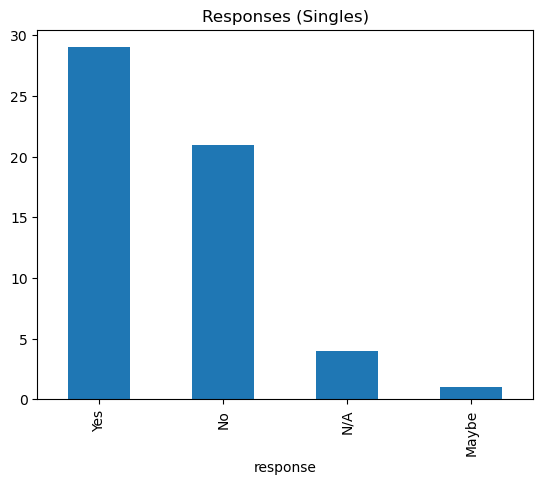

In [10]:
extract_and_analyze_results(usa_singles, "Singles")


################# Analyzing results for Families... #################


Extraction raw result message: {'content': '{"response":"No","justification":"I would have to say \'No\' to using it for my vacation next year. While I appreciate the idea of luxury and relaxation, my current situation as a stay-at-home parent means that I prioritize family-friendly options. I would prefer a vacation that accommodates my children and allows us to create memories together rather than a quiet luxury getaway meant for adults only. Additionally, I need to consider our budget and the importance of family time in my vacation plans."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response":"No","justification":"Chloe\'s ideal vacation is family-friendly, which does not align with the luxury and adult-focused service offered by WanderLux."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response":"No","justification":"Dante\'s ideal vacation is a family-friendly trip to a national park, which does n

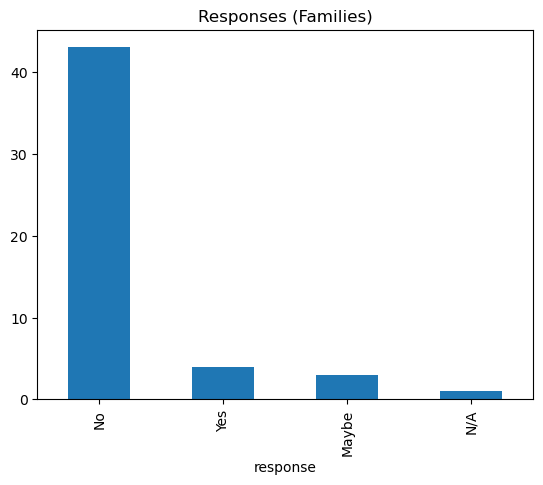

In [11]:
extract_and_analyze_results(usa_families, "Families")

################# Analyzing results for Couples... #################
Extraction raw result message: {'content': '{"response": "Yes", "justification": "I appreciate the focus on luxury and romantic vacations, especially in beachfront and spa destinations. Given my current lifestyle as a busy nurse, I often look for quiet and calm getaways to recharge. I value authentic experiences and would prefer to avoid the hassle of sifting through fake reviews. Your service seems like it would help me find the perfect place to relax and unwind, which is exactly what I need."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response": "Yes", "justification": "I appreciate the focus on luxury and romantic vacations, especially since I value quiet and calm getaways. Given my current situation, I often feel overwhelmed, and a peaceful vacation would be a great way to recharge. I also like the idea of avoiding fake reviews and bad experiences, as I want to ensure th

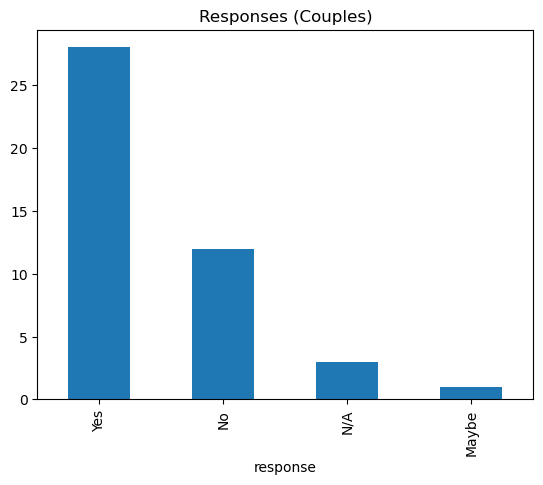

In [12]:
extract_and_analyze_results(usa_couples, "Couples")